In [1]:
#Mediante https://www.tensorflow.org/tutorials/structured_data/time_series
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow.keras import layers
from keras.layers import Dense,LSTM
from keras.models import Sequential, Model
from keras import backend
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Using TensorFlow backend.


In [2]:
#Recuperación del Dataset generado anteriormente
dataMeteoCellId = pd.read_csv('transformed_data/tres_semanas_mi_tweet_meteo.csv', index_col=0)
dataMeteoCellId.head(10)

Unnamed: 0.1  week  weekday  hour  CellID  countrycode      smsin  \
3462         15456    48        0     0    5459         4911  11.842113   
3463         15567    48        0     0    5570          479  43.365923   
3464         15641    48        0     0    5644          642   9.299986   
3465         16369    48        0     0    6372         3927  22.154832   
3466         16374    48        0     0    6377          838   3.565125   
3467         16558    48        0     0    6561          234   9.986448   
3468         25455    48        0     1    5459          769   5.014296   
3469         25566    48        0     1    5570          512   8.207069   
3470         25640    48        0     1    5644          315  11.210221   
3471         26368    48        0     1    6372         4023  12.621864   

          smsout     callin    callout     internet   idx  tweet  \
3462   29.421183   2.285438   8.484566  1103.538826  8064      0   
3463  142.091116   4.471873   9.889003  1766.063070  8064      0   
3464    7.490847   3.895763   1.608435  1018.186800  8064      0   
3465   10.382360  13.090341  13.140465  2469.557143  8064      0   
3466   10.641408   1.273871   0.842599   686.937374  8064      0   
3467    4.053529  11.845670   4.848457   953.299339  8064      0   
3468   27.154635   0.678288   4.189871   977.807838  8065      0   
3469   70.624166   0.054030   4.134431  1406.237281  8065      0   
3470    5.687706   2.055420   0.431698   793.957395  8065      0   
3471   10.405253   6.232933  11.353127  1780.962066  8065      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3462                79            0.0         11.0        0.8  
3463                81            0.0         10.7        1.0  
3464                88            0.0          9.3        0.0  
3465                90            0.0          9.2        0.0  
3466                 0            0.0          8.7        0.0  
3467                85            0.0         10.0        0.0  
3468                82            0.0         11.0        0.7  
3469                82            0.0         10.7        0.9  
3470                89            0.0          9.4        0.0  
3471                88            0.2          9.2        0.0

In [3]:
dataMeteoCellId5459 = dataMeteoCellId[dataMeteoCellId.CellID == 5459]
dataMeteoCellId5459

Unnamed: 0.1  week  weekday  hour  CellID  countrycode       smsin  \
3462         15456    48        0     0    5459         4911   11.842113   
3468         25455    48        0     1    5459          769    5.014296   
3474         35454    48        0     2    5459          414    6.803499   
3480         45453    48        0     3    5459          339    4.403943   
3486         55452    48        0     4    5459         1379    7.253079   
...            ...   ...      ...   ...     ...          ...         ...   
6456        205390    50        6    19    5459        92220  101.607942   
6462        215388    50        6    20    5459         2617   58.284271   
6468        225386    50        6    21    5459         4045   67.663730   
6474        235383    50        6    22    5459         2357   36.146595   
6480          5454    50        6    23    5459         2766   33.691616   

         smsout     callin     callout     internet   idx  tweet  \
3462  29.421183   2.285438    8.484566  1103.538826  8064      0   
3468  27.154635   0.678288    4.189871   977.807838  8065      0   
3474  27.839988   0.774503    1.407425   916.378389  8066      0   
3480  24.987678   2.906261    0.000000   862.677492  8067      0   
3486  27.133039   5.525864    2.734304   869.743962  8068      0   
...         ...        ...         ...          ...   ...    ...   
6456  80.609887  40.577405  100.164241  1072.977527  8563      0   
6462  64.474438  42.893547   65.572003  1170.677360  8564      0   
6468  66.014486  29.814183   45.732379  1015.223982  8565      0   
6474  54.545786  15.258826   25.585470   807.905005  8566      1   
6480  32.139405   6.288565   14.297348   702.026910  8567      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3462                79            0.0         11.0        0.8  
3468                82            0.0         11.0        0.7  
3474                81            0.0         11.0        0.8  
3480                79            0.0         11.0        1.0  
3486                77            0.0         11.0        0.4  
...                ...            ...          ...        ...  
6456                90            0.0          5.0        0.4  
6462                91            0.0          5.0        0.9  
6468                92            0.0          4.0        0.6  
6474                93            0.0          5.0        0.7  
6480                93            0.0          4.0        1.0  

[504 rows x 17 columns]

In [4]:
dataMeteoCellId5570 = dataMeteoCellId[dataMeteoCellId.CellID == 5570]
dataMeteoCellId5570

Unnamed: 0.1  week  weekday  hour  CellID  countrycode       smsin  \
3463         15567    48        0     0    5570          479   43.365923   
3469         25566    48        0     1    5570          512    8.207069   
3475         35565    48        0     2    5570          326    6.250101   
3481         45564    48        0     3    5570          372    7.806477   
3487         55563    48        0     4    5570          542    5.057968   
...            ...   ...      ...   ...     ...          ...         ...   
6457        205501    50        6    19    5570         7219  167.226928   
6463        215499    50        6    20    5570         3159  173.984593   
6469        225497    50        6    21    5570         1285  146.930241   
6475        235494    50        6    22    5570         1209  105.745732   
6481          5565    50        6    23    5570         1827   46.310759   

          smsout     callin     callout     internet   idx  tweet  \
3463  142.091116   4.471873    9.889003  1766.063070  8064      0   
3469   70.624166   0.054030    4.134431  1406.237281  8065      0   
3475   54.240451   0.166728    0.000000  1275.583671  8066      0   
3481   32.190043   0.112698    0.528183  1245.537964  8067      0   
3487   81.117676   4.503370    2.714639  1194.696211  8068      0   
...          ...        ...         ...          ...   ...    ...   
6457   99.622131  90.662826  104.658922  2507.050029  8563      0   
6463  131.015138  68.511376   76.009650  2776.044930  8564      0   
6469  111.227745  49.299875   49.799202  2519.582077  8565      0   
6475   81.191528  34.455740   24.754564  2271.731795  8566      0   
6481   39.330069   9.347557   10.114684  2125.875899  8567      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3463                81            0.0         10.7        1.0  
3469                82            0.0         10.7        0.9  
3475                85            0.0         10.6        0.8  
3481                83            0.0         10.6        1.0  
3487                82            0.0         10.7        0.7  
...                ...            ...          ...        ...  
6457                99            0.0          4.6        1.0  
6463                99            0.0          4.5        1.1  
6469               100            0.0          4.2        1.0  
6475                98            0.0          4.4        0.8  
6481               100            0.0          3.8        1.0  

[504 rows x 17 columns]

In [5]:
dataMeteoCellId5644 = dataMeteoCellId[dataMeteoCellId.CellID == 5644]
dataMeteoCellId5644

Unnamed: 0.1  week  weekday  hour  CellID  countrycode       smsin  \
3464         15641    48        0     0    5644          642    9.299986   
3470         25640    48        0     1    5644          315   11.210221   
3476         35639    48        0     2    5644         1476    4.921546   
3482         45638    48        0     3    5644          796    0.395659   
3488         55637    48        0     4    5644          914    4.043341   
...            ...   ...      ...   ...     ...          ...         ...   
6458        205575    50        6    19    5644         2745  110.052348   
6464        215573    50        6    20    5644         3589   78.914384   
6470        225571    50        6    21    5644         5075   85.215212   
6476        235568    50        6    22    5644          778   38.644272   
6482          5639    50        6    23    5644          473   15.762429   

         smsout     callin    callout     internet   idx  tweet  \
3464   7.490847   3.895763   1.608435  1018.186800  8064      0   
3470   5.687706   2.055420   0.431698   793.957395  8065      0   
3476   2.967476   0.110003   1.077026   785.323663  8066      0   
3482   0.173675   4.705085   1.032617   736.890825  8067      0   
3488   2.875516   3.204614   4.408731   747.291487  8068      0   
...         ...        ...        ...          ...   ...    ...   
6458  44.996696  78.182637  90.550636  1563.018105  8563      0   
6464  52.041764  65.673507  55.676858  1835.633996  8564      0   
6470  43.256385  40.793406  24.709491  1977.651108  8565      0   
6476  28.967234   8.760980  15.678336  1713.374630  8566      1   
6482   7.203892   5.289771  10.954075  1193.756255  8567      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3464                88            0.0          9.3   0.000000  
3470                89            0.0          9.4   0.000000  
3476                88            0.0          9.3   0.000000  
3482                88            0.0          9.2   0.000000  
3488                87            0.0          9.2   0.000000  
...                ...            ...          ...        ...  
6458                92            0.0          3.3   1.066667  
6464                93            0.0          3.3   1.033333  
6470                94            0.0          3.2   1.233333  
6476                94            0.0          3.1   0.966667  
6482                95            0.0          2.4   1.166667  

[504 rows x 17 columns]

In [6]:
dataMeteoCellId6372 = dataMeteoCellId[dataMeteoCellId.CellID == 6372]
dataMeteoCellId6372

Unnamed: 0.1  week  weekday  hour  CellID  countrycode       smsin  \
3465         16369    48        0     0    6372         3927   22.154832   
3471         26368    48        0     1    6372         4023   12.621864   
3477         36367    48        0     2    6372         2228   17.011537   
3483         46366    48        0     3    6372         2178    6.742139   
3489         56365    48        0     4    6372         2322   11.546587   
...            ...   ...      ...   ...     ...          ...         ...   
6459        206303    50        6    19    6372         8778  198.831902   
6465        216301    50        6    20    6372         5597  189.091095   
6471        226299    50        6    21    6372         3065  159.937968   
6477        236296    50        6    22    6372         4000  102.608865   
6483          6367    50        6    23    6372         2595   42.845611   

          smsout      callin     callout     internet   idx  tweet  \
3465   10.382360   13.090341   13.140465  2469.557143  8064      0   
3471   10.405253    6.232933   11.353127  1780.962066  8065      0   
3477    3.719531    4.029763    8.151748  1703.239814  8066      0   
3483    0.708713    3.823413    3.293859  1566.840107  8067      0   
3489    2.529607    4.113555    8.442936  1461.017338  8068      0   
...          ...         ...         ...          ...   ...    ...   
6459  183.753430  115.105671  170.738174  2771.255244  8563      0   
6465  290.500782   81.361204  116.861263  3328.565392  8564      0   
6471  117.125074   43.814872   88.294870  3234.044665  8565      0   
6477   76.720566   29.366928   53.418730  2713.216708  8566      0   
6483   25.775803   14.484613   27.796904  2166.180717  8567      2   

      relativeHumidity  precipitation  temperature  windSpeed  
3465                90            0.0          9.2        0.0  
3471                88            0.2          9.2        0.0  
3477                90            0.0          8.9        0.0  
3483                91            0.0          9.0        0.0  
3489                91            0.0          9.0        0.0  
...                ...            ...          ...        ...  
6459                90            0.0          3.4        0.8  
6465                91            0.0          3.1        0.8  
6471                92            0.0          2.7        0.9  
6477                92            0.0          2.6        0.7  
6483                93            0.0          2.8        1.4  

[504 rows x 17 columns]

In [7]:
dataMeteoCellId6377 = dataMeteoCellId[dataMeteoCellId.CellID == 6377]
dataMeteoCellId6377

Unnamed: 0.1  week  weekday  hour  CellID  countrycode      smsin  \
3466         16374    48        0     0    6377          838   3.565125   
3472         26373    48        0     1    6377          464   1.525694   
3478         36372    48        0     2    6377          436   0.505887   
3484         46371    48        0     3    6377          447   1.396848   
3490         56370    48        0     4    6377          681   3.561554   
...            ...   ...      ...   ...     ...          ...        ...   
6460        206308    50        6    19    6377         2407  53.770497   
6466        216306    50        6    20    6377         2847  65.436528   
6472        226304    50        6    21    6377         1272  53.398386   
6478        236301    50        6    22    6377         3403  30.126413   
6484          6372    50        6    23    6377          928  14.837377   

         smsout     callin    callout     internet   idx  tweet  \
3466  10.641408   1.273871   0.842599   686.937374  8064      0   
3472   8.754191   0.766851   0.502303   621.692479  8065      0   
3478   1.625251   0.761064   0.000000   523.289704  8066      0   
3484   2.823432   0.478361   0.348439   516.904148  8067      0   
3490   1.402496   0.581836   0.897839   512.982744  8068      0   
...         ...        ...        ...          ...   ...    ...   
6460  31.805433  32.677057  34.822683  1006.158436  8563      0   
6466  42.349524  20.817705  28.948175  1124.298709  8564      0   
6472  38.251317  13.037168  15.450609  1114.510366  8565      0   
6478  25.426642   8.527180   7.781623   999.341485  8566      0   
6484  11.174602   2.745245   3.991389   825.238721  8567      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3466                 0            0.0          8.7        0.0  
3472                 0            0.0          8.6        0.0  
3478                 0            0.0          8.7        0.0  
3484                 0            0.0          8.8        0.0  
3490                 0            0.0          8.8        0.0  
...                ...            ...          ...        ...  
6460                 0            0.0          3.5        0.0  
6466                 0            0.0          3.2        0.0  
6472                 0            0.0          2.8        0.0  
6478                 0            0.0          2.7        0.0  
6484                 0            0.0          2.8        0.0  

[504 rows x 17 columns]

In [8]:
dataMeteoCellId6561 = dataMeteoCellId[dataMeteoCellId.CellID == 6561]
dataMeteoCellId6561

Unnamed: 0.1  week  weekday  hour  CellID  countrycode       smsin  \
3467         16558    48        0     0    6561          234    9.986448   
3473         26557    48        0     1    6561          234    3.880146   
3479         36556    48        0     2    6561         1994    3.883582   
3485         46555    48        0     3    6561         1221    2.567616   
3491         56554    48        0     4    6561         1535    3.264841   
...            ...   ...      ...   ...     ...          ...         ...   
6461        206492    50        6    19    6561         1278  115.638907   
6467        216490    50        6    20    6561         3514  127.098873   
6473        226488    50        6    21    6561         1346   99.034378   
6479        236485    50        6    22    6561         1843   40.323072   
6485          6556    50        6    23    6561          489   36.402848   

         smsout     callin    callout     internet   idx  tweet  \
3467   4.053529  11.845670   4.848457   953.299339  8064      0   
3473   2.387772   0.000000   2.729179   809.512146  8065      0   
3479   0.000426   0.085840   1.418372   716.309083  8066      0   
3485   0.000000   0.086266   3.358231   654.932930  8067      0   
3491   0.788894   8.975155   1.578213   674.022194  8068      0   
...         ...        ...        ...          ...   ...    ...   
6461  60.961960  75.624837  76.197537  1332.454117  8563      0   
6467  79.311767  51.981028  62.878366  1463.963429  8564      0   
6473  59.421598  25.941444  41.638442  1430.918199  8565      0   
6479  35.517221  16.803420  22.304975  1432.508885  8566      0   
6485  23.314253   9.138007  20.630405  1097.646388  8567      0   

      relativeHumidity  precipitation  temperature  windSpeed  
3467                85            0.0         10.0   0.000000  
3473                90            0.0          9.9   0.000000  
3479                90            0.0          9.9   0.000000  
3485                88            0.0          9.9   0.000000  
3491                87            0.0          9.9   0.000000  
...                ...            ...          ...        ...  
6461                92            0.0          4.3   0.966667  
6467                93            0.0          3.7   0.866667  
6473                96            0.0          3.6   0.633333  
6479                98            0.0          3.6   0.700000  
6485                98            0.0          3.2   0.966667  

[504 rows x 17 columns]

In [9]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
    
    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [10]:
TRAIN_SPLIT = 352

In [11]:
tf.random.set_seed(13)

In [12]:
uni_data5459 = dataMeteoCellId5459['internet']
uni_data5459.index = dataMeteoCellId5459['hour'] + dataMeteoCellId5459['weekday'] * 24 + (dataMeteoCellId5459['week'] - 48) * 24 * 7
uni_data5459.head()

0    1103.538826
1     977.807838
2     916.378389
3     862.677492
4     869.743962
Name: internet, dtype: float64

In [13]:
uni_data5570 = dataMeteoCellId5570['internet']
uni_data5570.index = dataMeteoCellId5570['hour'] + dataMeteoCellId5570['weekday'] * 24 + (dataMeteoCellId5570['week'] - 48) * 24 * 7
uni_data5570.head()

0    1766.063070
1    1406.237281
2    1275.583671
3    1245.537964
4    1194.696211
Name: internet, dtype: float64

In [14]:
uni_data5644 = dataMeteoCellId5644['internet']
uni_data5644.index = dataMeteoCellId5644['hour'] + dataMeteoCellId5644['weekday'] * 24 + (dataMeteoCellId5644['week'] - 48) * 24 * 7
uni_data5644.head()

0    1018.186800
1     793.957395
2     785.323663
3     736.890825
4     747.291487
Name: internet, dtype: float64

In [15]:
uni_data6372 = dataMeteoCellId6372['internet']
uni_data6372.index = dataMeteoCellId6372['hour'] + dataMeteoCellId6372['weekday'] * 24 + (dataMeteoCellId6372['week'] - 48) * 24 * 7
uni_data6372.head()

0    2469.557143
1    1780.962066
2    1703.239814
3    1566.840107
4    1461.017338
Name: internet, dtype: float64

In [16]:
uni_data6377 = dataMeteoCellId6377['internet']
uni_data6377.index = dataMeteoCellId6377['hour'] + dataMeteoCellId6377['weekday'] * 24 + (dataMeteoCellId6377['week'] - 48) * 24 * 7
uni_data6377.head()

0    686.937374
1    621.692479
2    523.289704
3    516.904148
4    512.982744
Name: internet, dtype: float64

In [17]:
uni_data6561 = dataMeteoCellId6561['internet']
uni_data6561.index = dataMeteoCellId6561['hour'] + dataMeteoCellId6561['weekday'] * 24 + (dataMeteoCellId6561['week'] - 48) * 24 * 7
uni_data6561.head()

0    953.299339
1    809.512146
2    716.309083
3    654.932930
4    674.022194
Name: internet, dtype: float64

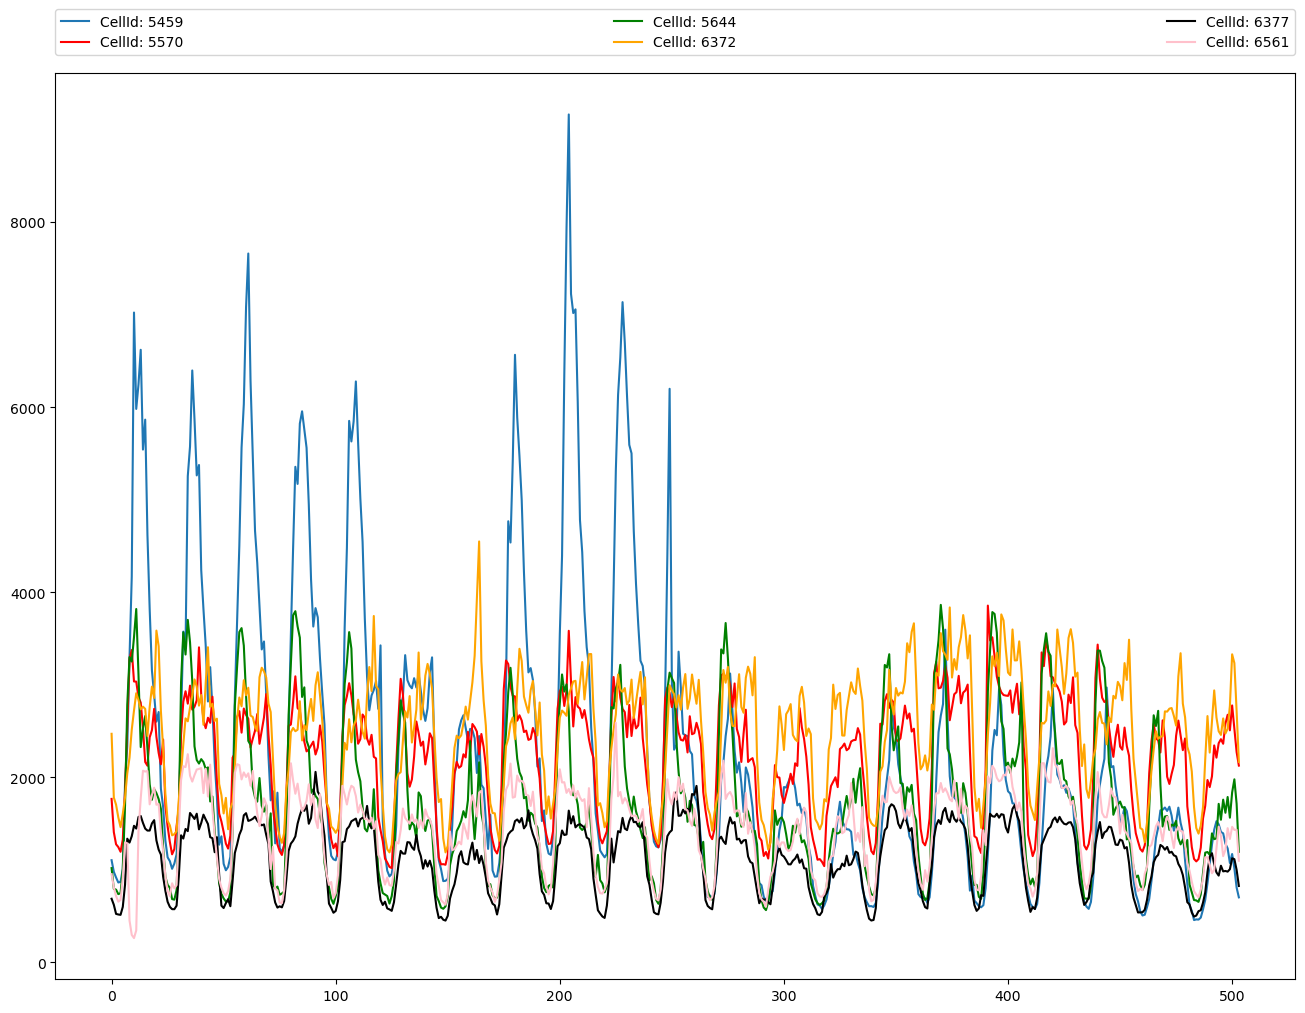

In [18]:
plt.figure(figsize=(16, 12), dpi=100) 

uni_data5459.plot(kind='line',x='index',y='internet', label = "CellId: 5459")
uni_data5570.plot(kind='line',x='index',y='internet', color='red', label = "CellId: 5570")
uni_data5644.plot(kind='line',x='index',y='internet', color='green', label = "CellId: 5644")
uni_data6372.plot(kind='line',x='index',y='internet', color='orange', label = "CellId: 6372")
uni_data6377.plot(kind='line',x='index',y='internet', color='black', label = "CellId: 6377")
uni_data6561.plot(kind='line',x='index',y='internet', color='pink', label = "CellId: 6561")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('Prueba.png',bbox_inches='tight')

plt.show()

In [19]:
uni_data = pd.concat([uni_data5459, uni_data5570, uni_data5644, uni_data6372, uni_data6377, uni_data6561 ], axis=1, keys=['5459', '5570', '5644', '6372', '6377', '6561'])

<AxesSubplot:>

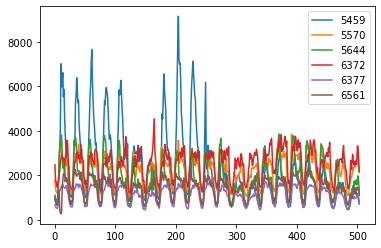

In [20]:
uni_data.plot()

<Figure size 1600x1200 with 0 Axes>

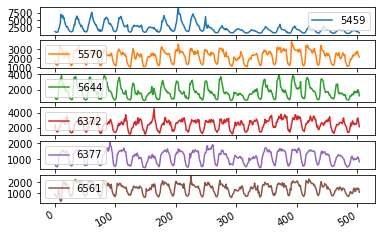

In [21]:
plt.figure(figsize=(16, 12), dpi=100) 
uni_data.plot(subplots=True)
plt.show()

In [22]:
uni_data

5459         5570         5644         6372         6377  \
0    1103.538826  1766.063070  1018.186800  2469.557143   686.937374   
1     977.807838  1406.237281   793.957395  1780.962066   621.692479   
2     916.378389  1275.583671   785.323663  1703.239814   523.289704   
3     862.677492  1245.537964   736.890825  1566.840107   516.904148   
4     869.743962  1194.696211   747.291487  1461.017338   512.982744   
..           ...          ...          ...          ...          ...   
499  1072.977527  2507.050029  1563.018105  2771.255244  1006.158436   
500  1170.677360  2776.044930  1835.633996  3328.565392  1124.298709   
501  1015.223982  2519.582077  1977.651108  3234.044665  1114.510366   
502   807.905005  2271.731795  1713.374630  2713.216708   999.341485   
503   702.026910  2125.875899  1193.756255  2166.180717   825.238721   

            6561  
0     953.299339  
1     809.512146  
2     716.309083  
3     654.932930  
4     674.022194  
..           ...  
499  1332.454117  
500  1463.963429  
501  1430.918199  
502  1432.508885  
503  1097.646388  

[504 rows x 6 columns]

In [23]:
uni_data = uni_data.values

In [24]:
uni_data

array([[1103.53882633, 1766.06306988, 1018.18679992, 2469.55714256,
         686.93737373,  953.2993386 ],
       [ 977.80783846, 1406.23728115,  793.95739466, 1780.96206604,
         621.69247942,  809.51214627],
       [ 916.37838936, 1275.5836712 ,  785.32366344, 1703.23981434,
         523.28970434,  716.30908289],
       ...,
       [1015.22398152, 2519.58207674, 1977.65110771, 3234.04466494,
        1114.5103661 , 1430.91819933],
       [ 807.90500495, 2271.73179453, 1713.37462951, 2713.21670844,
         999.34148491, 1432.50888484],
       [ 702.02691002, 2125.87589908, 1193.75625541, 2166.18071706,
         825.23872133, 1097.64638751]])

In [25]:
uni_data
len(uni_data)

504

In [26]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [27]:
uni_train_mean

1920.0274528095329

In [28]:
uni_train_std

1053.298183847488

In [29]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [30]:
uni_data

array([[-0.7751733 , -0.1461736 , -0.85620641,  0.52172281, -1.1706942 ,
        -0.91781048],
       [-0.89454214, -0.48779176, -1.06908953, -0.13202851, -1.23263763,
        -1.05432187],
       [-0.95286319, -0.61183413, -1.07728638, -0.20581792, -1.3260611 ,
        -1.14280874],
       ...,
       [-0.8590193 ,  0.56921642,  0.05470783,  1.24752632, -0.76475693,
        -0.46435972],
       [-1.05584768,  0.33390767, -0.19619594,  0.7530529 , -0.87409813,
        -0.46284953],
       [-1.15636822,  0.19543226, -0.68952098,  0.23369761, -1.03939107,
        -0.78076757]])

In [31]:
uni_data[:,0]

array([-7.75173298e-01, -8.94542143e-01, -9.52863186e-01, -1.00384675e+00,
       -9.97137854e-01, -8.64776771e-01,  1.49646457e-02,  3.94974811e-01,
        1.30395412e+00,  2.13383828e+00,  4.84390954e+00,  3.85499234e+00,
        4.10493010e+00,  4.46166678e+00,  3.43789873e+00,  3.74501928e+00,
        2.56193987e+00,  1.79763642e+00,  1.17084554e+00,  9.19056150e-01,
        6.46609968e-01,  7.45253501e-01, -4.13468752e-02, -2.29807228e-01,
       -5.74610424e-01, -7.45562336e-01, -7.84727967e-01, -8.63344028e-01,
       -8.10258656e-01, -7.14679969e-01, -2.91742939e-01,  6.75864295e-01,
        1.57009954e+00,  1.41444406e+00,  3.16551823e+00,  3.46971171e+00,
        4.24940894e+00,  3.74614513e+00,  3.17294598e+00,  3.27943873e+00,
        2.20052090e+00,  1.79850485e+00,  1.42618883e+00,  8.53292309e-01,
        1.20558601e+00,  7.84688346e-01,  2.28490495e-01, -1.27931511e-01,
       -6.15817350e-01, -5.29863551e-01, -8.12351142e-01, -8.78421670e-01,
       -8.44094074e-01, -

In [32]:
univariate_past_history = 48
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data[:,0], 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data[:,0], TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [33]:
len(x_train_uni)

304

In [34]:
len (x_val_uni)

104

In [35]:
x_train_uni_cellId = []
y_train_uni_cellId = []
x_val_uni_cellId = []
y_val_uni_cellId = []
for i in range(0, uni_data.shape[1]):
    x_train_uni_frame, y_train_uni_frame = univariate_data(uni_data[:,i], 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
    print (len(x_train_uni_frame))
    print (type (x_train_uni_frame))
    x_val_uni_frame, y_val_uni_frame = univariate_data(uni_data[:,i], TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
    x_train_uni_cellId.append(x_train_uni_frame)
    y_train_uni_cellId.append(y_train_uni_frame)
    x_val_uni_cellId.append(x_val_uni_frame)
    y_val_uni_cellId.append(y_val_uni_frame)
    if i == 0:
        x_train_uni = x_train_uni_frame
        y_train_uni = y_train_uni_frame
        x_val_uni = x_val_uni_frame
        y_val_uni = y_val_uni_frame
    else: 
        x_train_uni = np.concatenate((x_train_uni, x_train_uni_frame))
        y_train_uni = np.concatenate((y_train_uni, y_train_uni_frame))
        x_val_uni = np.concatenate((x_val_uni, x_val_uni_frame))
        y_val_uni = np.concatenate((y_val_uni, y_val_uni_frame))

304
<class 'numpy.ndarray'>
304
<class 'numpy.ndarray'>
304
<class 'numpy.ndarray'>
304
<class 'numpy.ndarray'>
304
<class 'numpy.ndarray'>
304
<class 'numpy.ndarray'>


In [36]:
len(y_train_uni)

1824

In [37]:
len(x_train_uni_cellId)

6

In [38]:
x_train_uni

array([[[-7.75173298e-01],
        [-8.94542143e-01],
        [-9.52863186e-01],
        ...,
        [ 7.84688346e-01],
        [ 2.28490495e-01],
        [-1.27931511e-01]],

       [[-8.94542143e-01],
        [-9.52863186e-01],
        [-1.00384675e+00],
        ...,
        [ 2.28490495e-01],
        [-1.27931511e-01],
        [-6.15817350e-01]],

       [[-9.52863186e-01],
        [-1.00384675e+00],
        [-9.97137854e-01],
        ...,
        [-1.27931511e-01],
        [-6.15817350e-01],
        [-5.29863551e-01]],

       ...,

       [[-6.56737389e-01],
        [-6.80563437e-01],
        [-6.70996407e-01],
        ...,
        [-1.76247450e-01],
        [ 7.92936798e-02],
        [-8.11310570e-04]],

       [[-6.80563437e-01],
        [-6.70996407e-01],
        [-5.84332225e-01],
        ...,
        [ 7.92936798e-02],
        [-8.11310570e-04],
        [-6.51818272e-02]],

       [[-6.70996407e-01],
        [-5.84332225e-01],
        [-4.21255359e-01],
        ...,
        

In [39]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Internet charge to predict')
print (y_train_uni[0])

Single window of past history
[[-0.7751733 ]
 [-0.89454214]
 [-0.95286319]
 [-1.00384675]
 [-0.99713785]
 [-0.86477677]
 [ 0.01496465]
 [ 0.39497481]
 [ 1.30395412]
 [ 2.13383828]
 [ 4.84390954]
 [ 3.85499234]
 [ 4.1049301 ]
 [ 4.46166678]
 [ 3.43789873]
 [ 3.74501928]
 [ 2.56193987]
 [ 1.79763642]
 [ 1.17084554]
 [ 0.91905615]
 [ 0.64660997]
 [ 0.7452535 ]
 [-0.04134688]
 [-0.22980723]
 [-0.57461042]
 [-0.74556234]
 [-0.78472797]
 [-0.86334403]
 [-0.81025866]
 [-0.71467997]
 [-0.29174294]
 [ 0.67586429]
 [ 1.57009954]
 [ 1.41444406]
 [ 3.16551823]
 [ 3.46971171]
 [ 4.24940894]
 [ 3.74614513]
 [ 3.17294598]
 [ 3.27943873]
 [ 2.2005209 ]
 [ 1.79850485]
 [ 1.42618883]
 [ 0.85329231]
 [ 1.20558601]
 [ 0.78468835]
 [ 0.2284905 ]
 [-0.12793151]]

 Target Internet charge to predict
-0.6158173495858638


In [40]:
def create_time_steps(length):
    return list(range(-length, 0))

In [41]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+3)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

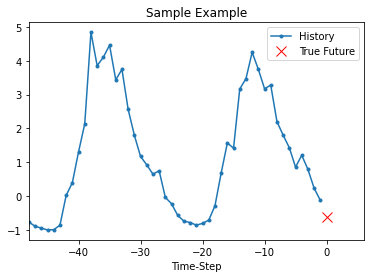

In [42]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

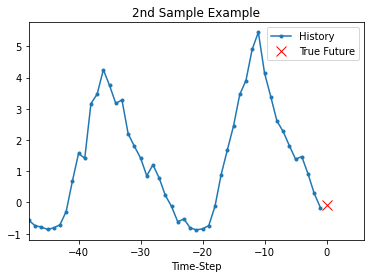

In [43]:
show_plot([x_train_uni[24], y_train_uni[24]], 0, '2nd Sample Example')

In [44]:
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Baseline

In [45]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

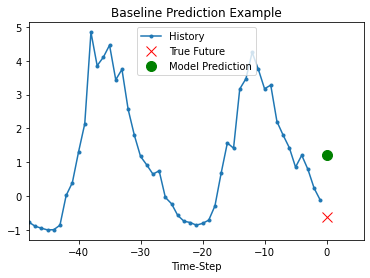

In [46]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

# Common constants

In [47]:
VAL_OPTIMIZER = 'adam'
VAL_LOSS = 'mse'
VAL_METRICS = ['accuracy', 'mae', 'mse',tf.keras.metrics.RootMeanSquaredError()]
EPOCHS = 100
VAL_BATCH_SIZE = 16

# Recurrent neural network con la CellId 5459

In [48]:
print (x_train_uni_cellId[0].shape[-2:])

(48, 1)


In [49]:
simple_lstm_model_5459 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459.summary()

simple_lstm_model_5459.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [50]:
history_5459 = simple_lstm_model_5459.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=VAL_BATCH_SIZE,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 62ms/step - loss: 2.2925 - accuracy: 0.0000e+00 - mae: 1.0335 - mse: 2.2925 - root_mean_squared_error: 1.5141 - val_loss: 0.3655 - val_accuracy: 0.0000e+00 - val_mae: 0.5101 - val_mse: 0.3655 - val_root_mean_squared_error: 0.6045
Epoch 2/100
19/19 [==============================] - 0s 22ms/step - loss: 2.1146 - accuracy: 0.0000e+00 - mae: 0.9932 - mse: 2.1146 - root_mean_squared_error: 1.4542 - val_loss: 0.3631 - val_accuracy: 0.0000e+00 - val_mae: 0.5143 - val_mse: 0.3631 - val_root_mean_squared_error: 0.6026
Epoch 3/100
19/19 [==============================] - 1s 34ms/step - loss: 1.9433 - accuracy: 0.0000e+00 - mae: 0.9547 - mse: 1.9433 - root_mean_squared_error: 1.3940 - val_loss: 0.3591 - val_accuracy: 0.0000e+00 - val_mae: 0.5173 - val_mse: 0.3591 - val_root_mean_squared_error: 0.5993
Epoch 4/100
19/19 [==============================] - 1s 27ms/step - loss: 1.7693 - accuracy: 0.0000e+00 - mae: 0.9128 - mse: 1.7693 - root_mea

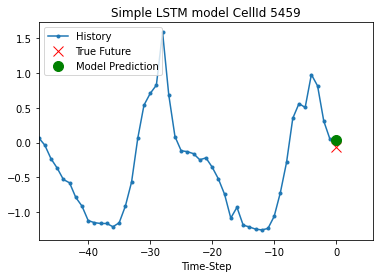

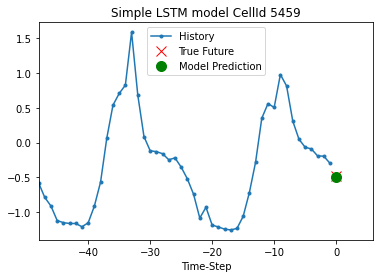

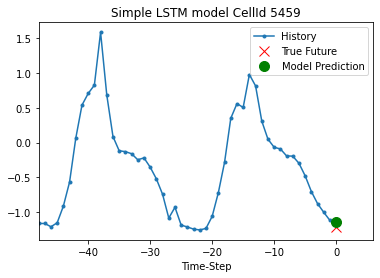

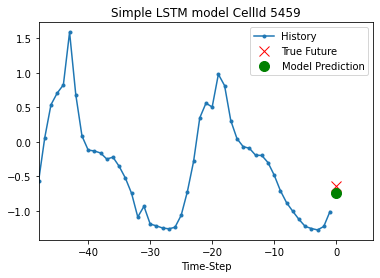

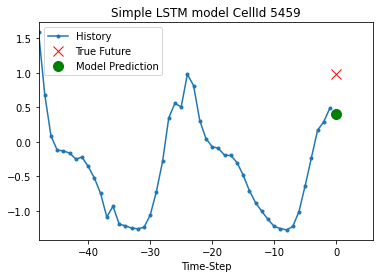

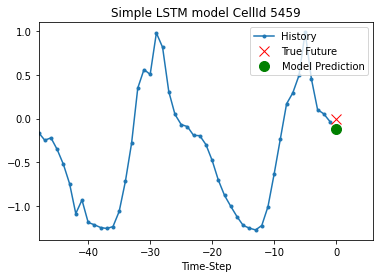

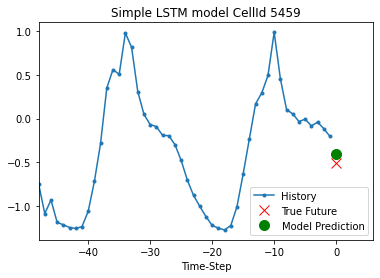

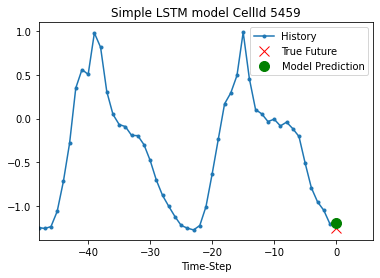

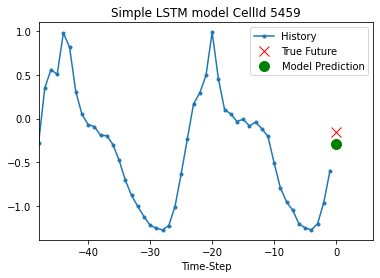

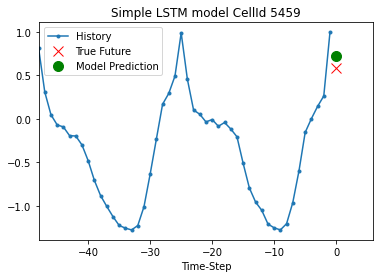

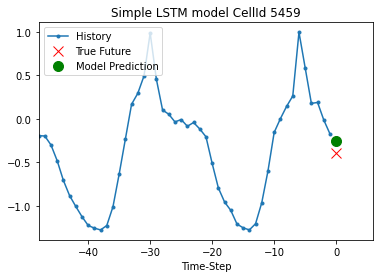

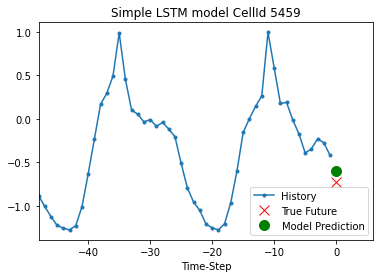

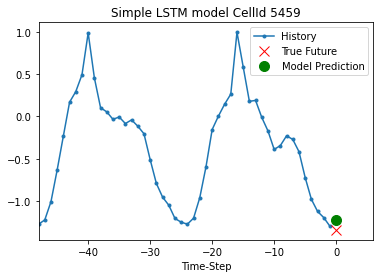

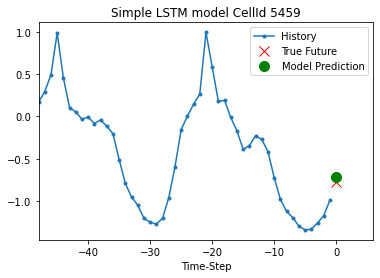

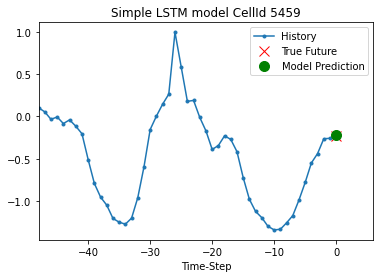

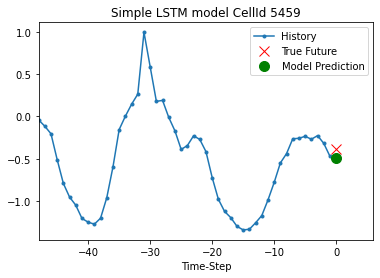

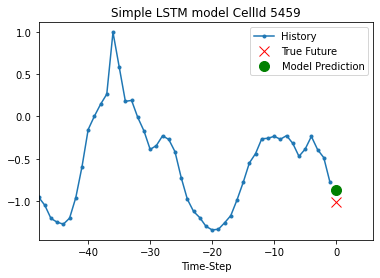

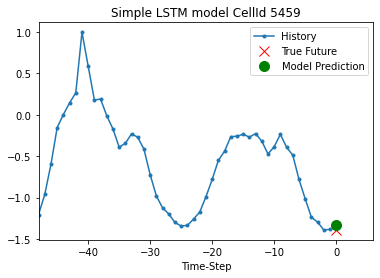

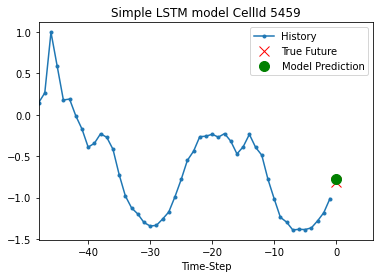

In [51]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[0][i*5], y_val_uni_cellId[0][i*5],
                    simple_lstm_model_5459.predict(x_val_uni_cellId[0])[i*5]], 0, 'Simple LSTM model CellId 5459')
    plot.show()

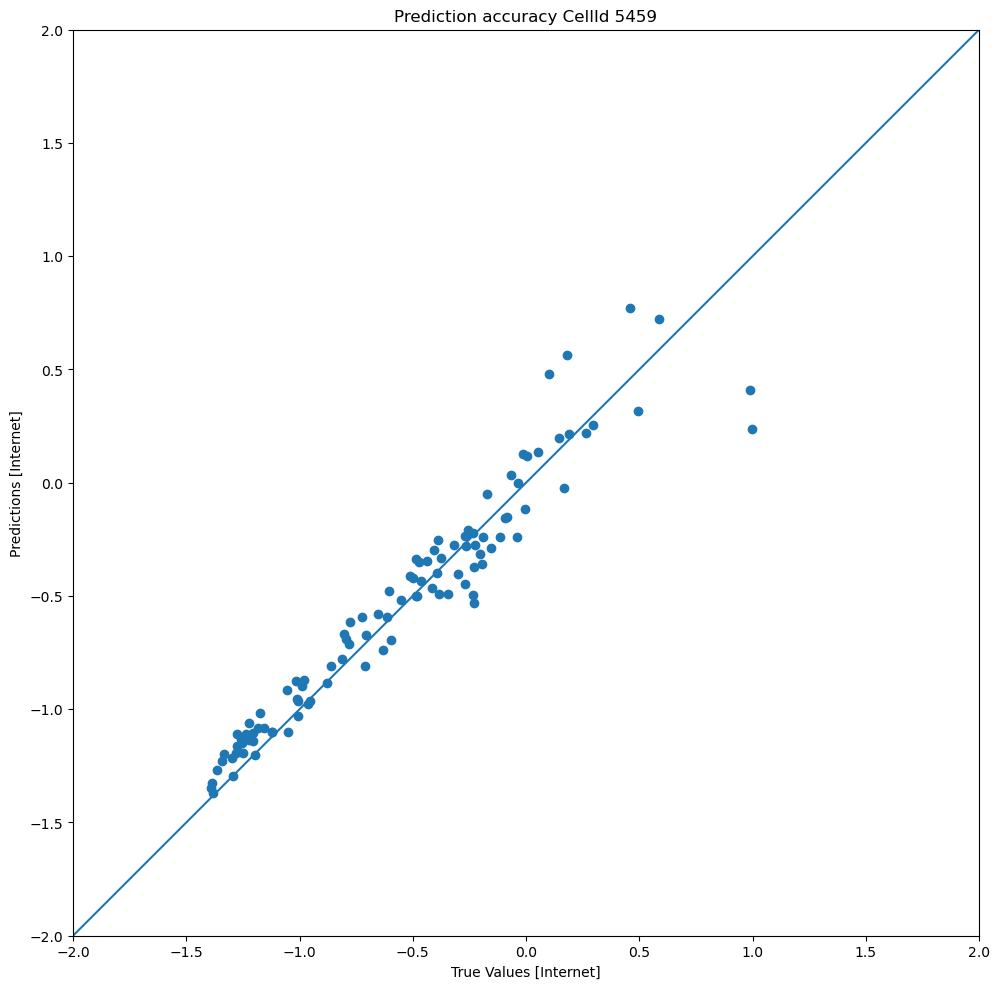

In [52]:
test_predictions_5459 = simple_lstm_model_5459.predict(x_val_uni_cellId[0]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[0], test_predictions_5459)
plt.title('Prediction accuracy CellId 5459')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

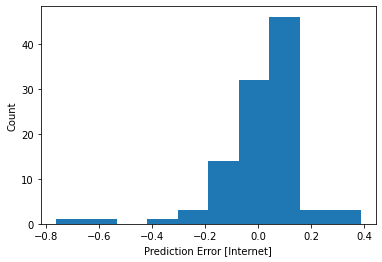

In [53]:
error = test_predictions_5459 - y_val_uni_cellId[0]
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [54]:
test_predictions_5459_batch_16 = simple_lstm_model_5459.predict(x_val_uni_cellId[0])

In [55]:
#MSE
mse_5459_batch_16 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_16(y_val_uni_cellId[0], test_predictions_5459_batch_16).numpy()

0.5650555

In [56]:
#RMSE
rmse_5459_batch_16 = tf.keras.metrics.RootMeanSquaredError()
rmse_5459_batch_16(y_val_uni_cellId[0], test_predictions_5459_batch_16).numpy()

0.15202422

In [57]:
#RMSE
rmse_5459_batch_16 = tf.keras.metrics.RootMeanSquaredError()
rmse_5459_batch_16.update_state(y_val_uni_cellId[0], test_predictions_5459_batch_16)
rmse_5459_batch_16.result().numpy()                                

0.15202422

## Cambio valores CellId 5459

#### Batch 8

In [58]:
VAL_BATCH_SIZE_8 = 8
simple_lstm_model_5459_batch_8 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_8.summary()

simple_lstm_model_5459_batch_8.compile(optimizer=VAL_OPTIMIZER , loss=VAL_LOSS ,metrics=VAL_METRICS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [59]:
history_5459_batch_8 = simple_lstm_model_5459_batch_8.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=VAL_BATCH_SIZE_8,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
38/38 [==============================] - 2s 49ms/step - loss: 3.3843 - accuracy: 0.0000e+00 - mae: 1.3185 - mse: 3.3843 - root_mean_squared_error: 1.5898 - val_loss: 0.7408 - val_accuracy: 0.0000e+00 - val_mae: 0.7256 - val_mse: 0.7408 - val_root_mean_squared_error: 0.8607
Epoch 2/100
38/38 [==============================] - 1s 26ms/step - loss: 2.9757 - accuracy: 0.0000e+00 - mae: 1.2364 - mse: 2.9757 - root_mean_squared_error: 1.7250 - val_loss: 0.6965 - val_accuracy: 0.0000e+00 - val_mae: 0.7125 - val_mse: 0.6965 - val_root_mean_squared_error: 0.8346
Epoch 3/100
38/38 [==============================] - 1s 26ms/step - loss: 2.4530 - accuracy: 0.0000e+00 - mae: 1.1294 - mse: 2.4530 - root_mean_squared_error: 1.5662 - val_loss: 0.6940 - val_accuracy: 0.0000e+00 - val_mae: 0.7311 - val_mse: 0.6940 - val_root_mean_squared_error: 0.8331
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 1.9659 - accuracy: 0.0000e+00 - mae: 1.0291 - mse: 1.9659 - root_mea

In [60]:
history_5459_batch_8.history

{'loss': [3.3843283653259277,
  2.975677013397217,
  2.4530136585235596,
  1.9658924341201782,
  1.6408783197402954,
  1.3862732648849487,
  1.1790239810943604,
  0.9936633706092834,
  0.8217628002166748,
  0.6770060062408447,
  0.5662409663200378,
  0.48910126090049744,
  0.43665674328804016,
  0.3986169099807739,
  0.3669651746749878,
  0.34133243560791016,
  0.3212599456310272,
  0.3030315637588501,
  0.2859624922275543,
  0.2736532688140869,
  0.26353225111961365,
  0.2594798505306244,
  0.2498670071363449,
  0.24557340145111084,
  0.23339495062828064,
  0.23052117228507996,
  0.2234954833984375,
  0.220793217420578,
  0.21463008224964142,
  0.21258758008480072,
  0.20897004008293152,
  0.20897066593170166,
  0.20257215201854706,
  0.19961488246917725,
  0.19644998013973236,
  0.19514648616313934,
  0.1904328316450119,
  0.1897207647562027,
  0.1870327889919281,
  0.18624958395957947,
  0.18393860757350922,
  0.180987149477005,
  0.18011906743049622,
  0.17827191948890686,
  0.1761

In [61]:
test_predictions_5459_batch_8 = simple_lstm_model_5459_batch_8.predict(x_val_uni_cellId[0])

mse_5459_batch_8 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_8(y_val_uni_cellId[0], test_predictions_5459_batch_8).numpy()

0.59824276

In [62]:
#RMSE
mse_5459_batch_8 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_8(y_val_uni_cellId[0], test_predictions_5459_batch_8).numpy()

0.15024287

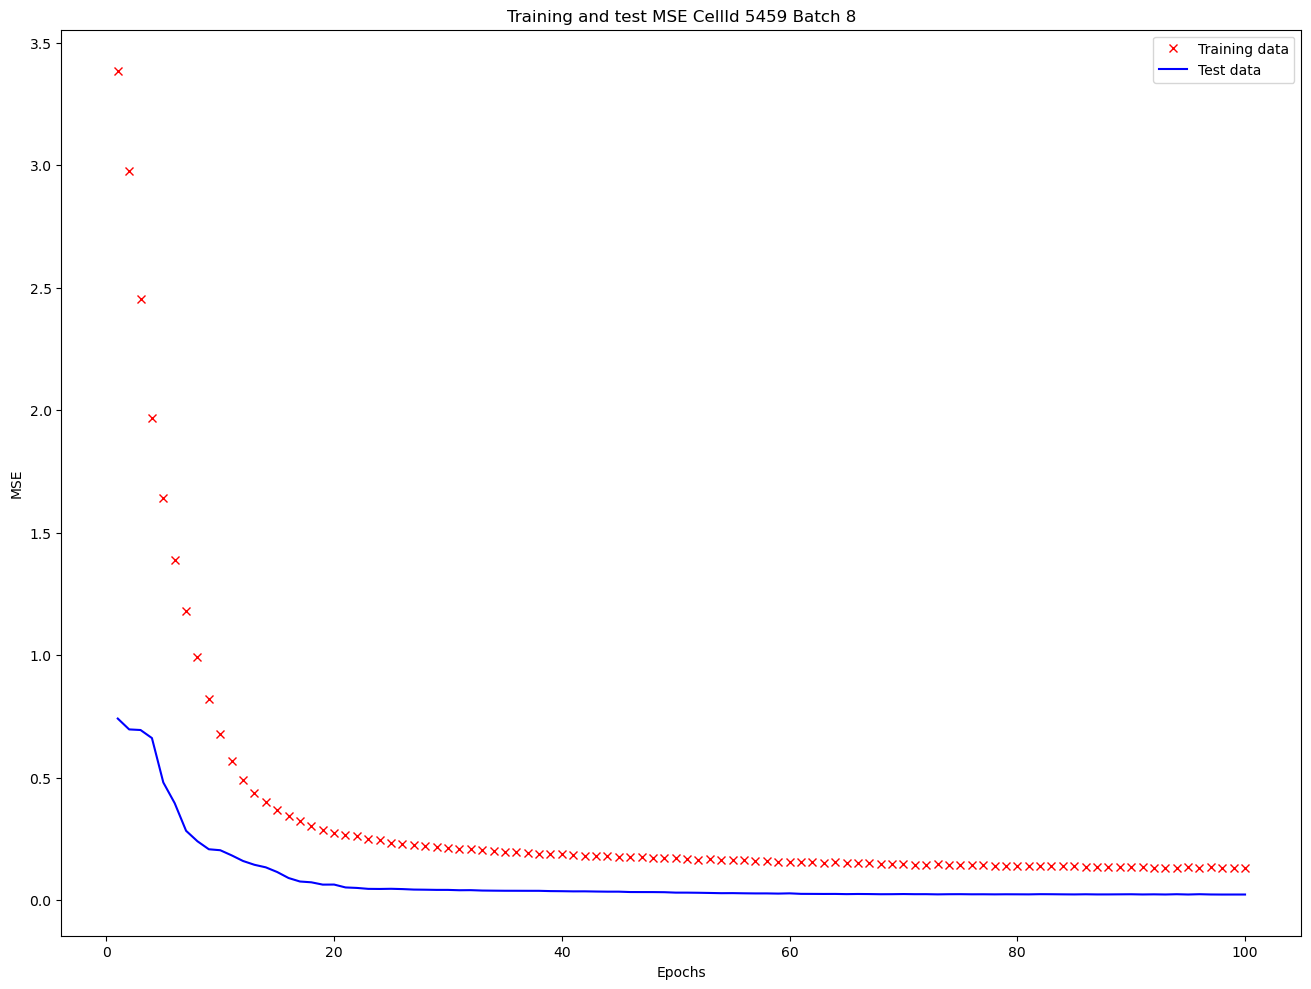

In [63]:
history_dict_5459_batch_8 = history_5459_batch_8.history
mse_values = history_dict_5459_batch_8['mse']
val_mse_values_5459_batch_8 = history_dict_5459_batch_8['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_8) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_8.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_8, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 8')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 32

In [64]:
simple_lstm_model_5459_batch_32 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_32.summary()

simple_lstm_model_5459_batch_32.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [65]:
history_5459_batch_32 = simple_lstm_model_5459_batch_32.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=32,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 144ms/step - loss: 4.2238 - accuracy: 0.0000e+00 - mae: 1.5302 - mse: 4.2238 - root_mean_squared_error: 1.7756 - val_loss: 1.5128 - val_accuracy: 0.0000e+00 - val_mae: 1.0375 - val_mse: 1.5128 - val_root_mean_squared_error: 1.2299
Epoch 2/100
10/10 [==============================] - 0s 49ms/step - loss: 3.9031 - accuracy: 0.0000e+00 - mae: 1.4752 - mse: 3.9031 - root_mean_squared_error: 1.9756 - val_loss: 1.4630 - val_accuracy: 0.0000e+00 - val_mae: 1.0206 - val_mse: 1.4630 - val_root_mean_squared_error: 1.2095
Epoch 3/100
10/10 [==============================] - 0s 38ms/step - loss: 3.6245 - accuracy: 0.0000e+00 - mae: 1.4251 - mse: 3.6245 - root_mean_squared_error: 1.9038 - val_loss: 1.4010 - val_accuracy: 0.0000e+00 - val_mae: 0.9998 - val_mse: 1.4010 - val_root_mean_squared_error: 1.1837
Epoch 4/100
10/10 [==============================] - 0s 38ms/step - loss: 3.3928 - accuracy: 0.0000e+00 - mae: 1.3831 - mse: 3.3928 - root_me

In [66]:
test_predictions_5459_batch_32 = simple_lstm_model_5459_batch_32.predict(x_val_uni_cellId[0])

mse_5459_batch_32 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_32(y_val_uni_cellId[0], test_predictions_5459_batch_32).numpy()

0.5189277

In [67]:
#RMSE
mse_5459_batch_32 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_32(y_val_uni_cellId[0], test_predictions_5459_batch_32).numpy()

0.24408479

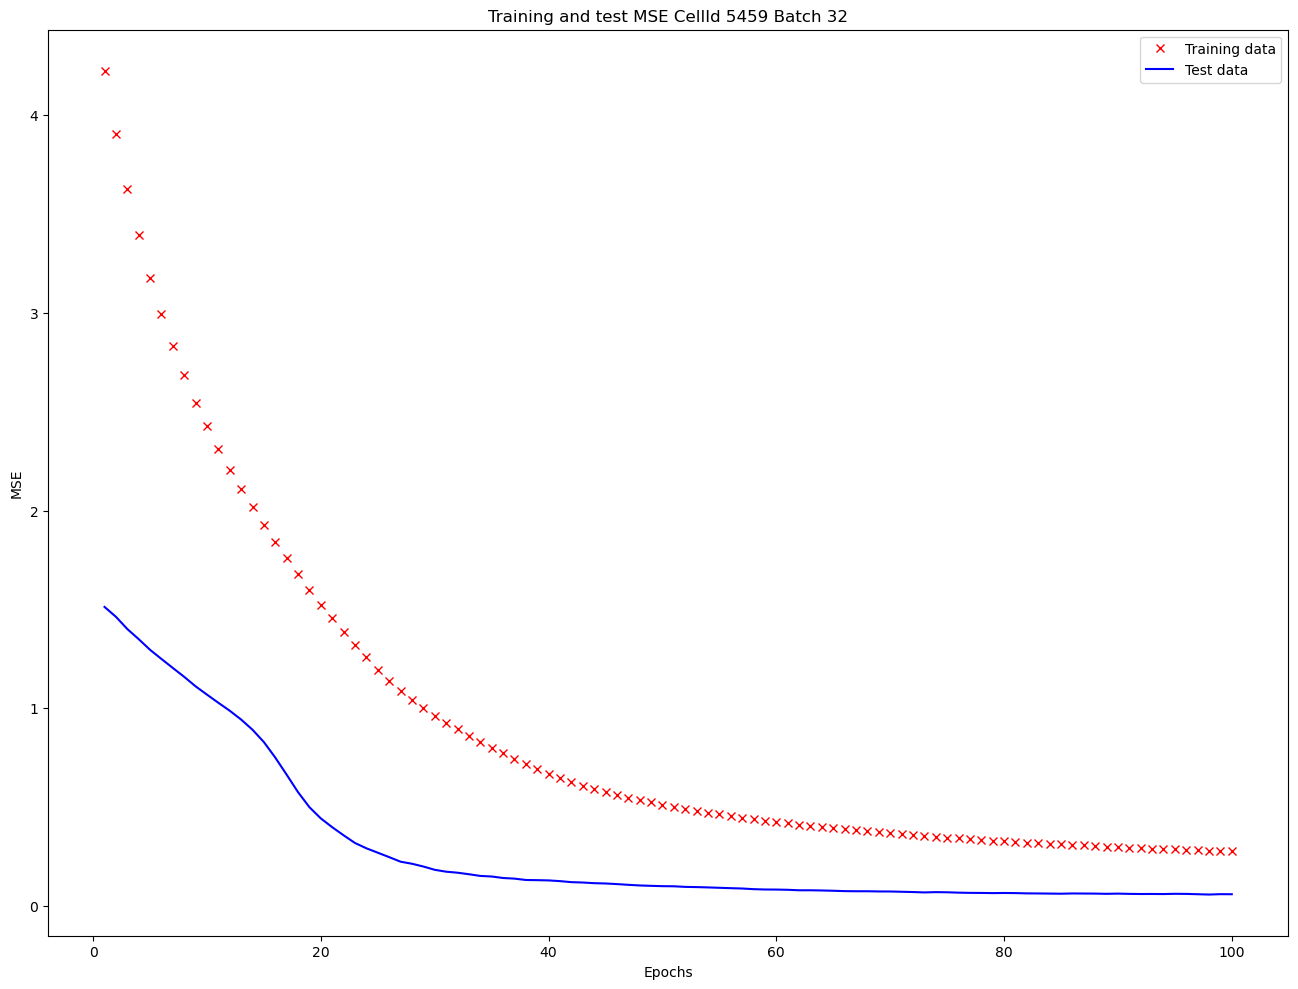

In [68]:
history_dict_5459_batch_32 = history_5459_batch_32.history
mse_values = history_dict_5459_batch_32['mse']
val_mse_values_5459_batch_32 = history_dict_5459_batch_32['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_32) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_32.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_32, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 32')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 64

In [69]:
simple_lstm_model_5459_batch_64 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_64.summary()

simple_lstm_model_5459_batch_64.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS ,metrics=VAL_METRICS )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [70]:
history_5459_batch_64 = simple_lstm_model_5459_batch_64.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=64,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 196ms/step - loss: 2.9856 - accuracy: 0.0000e+00 - mae: 1.2271 - mse: 2.9856 - root_mean_squared_error: 1.4966 - val_loss: 0.6142 - val_accuracy: 0.0000e+00 - val_mae: 0.6461 - val_mse: 0.6142 - val_root_mean_squared_error: 0.7837
Epoch 2/100
5/5 [==============================] - 0s 45ms/step - loss: 2.8692 - accuracy: 0.0000e+00 - mae: 1.2055 - mse: 2.8692 - root_mean_squared_error: 1.6939 - val_loss: 0.6089 - val_accuracy: 0.0000e+00 - val_mae: 0.6445 - val_mse: 0.6089 - val_root_mean_squared_error: 0.7803
Epoch 3/100
5/5 [==============================] - 0s 50ms/step - loss: 2.7559 - accuracy: 0.0000e+00 - mae: 1.1844 - mse: 2.7559 - root_mean_squared_error: 1.6601 - val_loss: 0.6044 - val_accuracy: 0.0000e+00 - val_mae: 0.6439 - val_mse: 0.6044 - val_root_mean_squared_error: 0.7774
Epoch 4/100
5/5 [==============================] - 0s 48ms/step - loss: 2.6516 - accuracy: 0.0000e+00 - mae: 1.1648 - mse: 2.6516 - root_mean_squar

In [71]:
test_predictions_5459_batch_64 = simple_lstm_model_5459_batch_64.predict(x_val_uni_cellId[0])

mse_5459_batch_64 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_64(y_val_uni_cellId[0], test_predictions_5459_batch_64).numpy()

0.5039028

In [72]:
#RMSE
mse_5459_batch_64 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_64(y_val_uni_cellId[0], test_predictions_5459_batch_64).numpy()

0.27544567

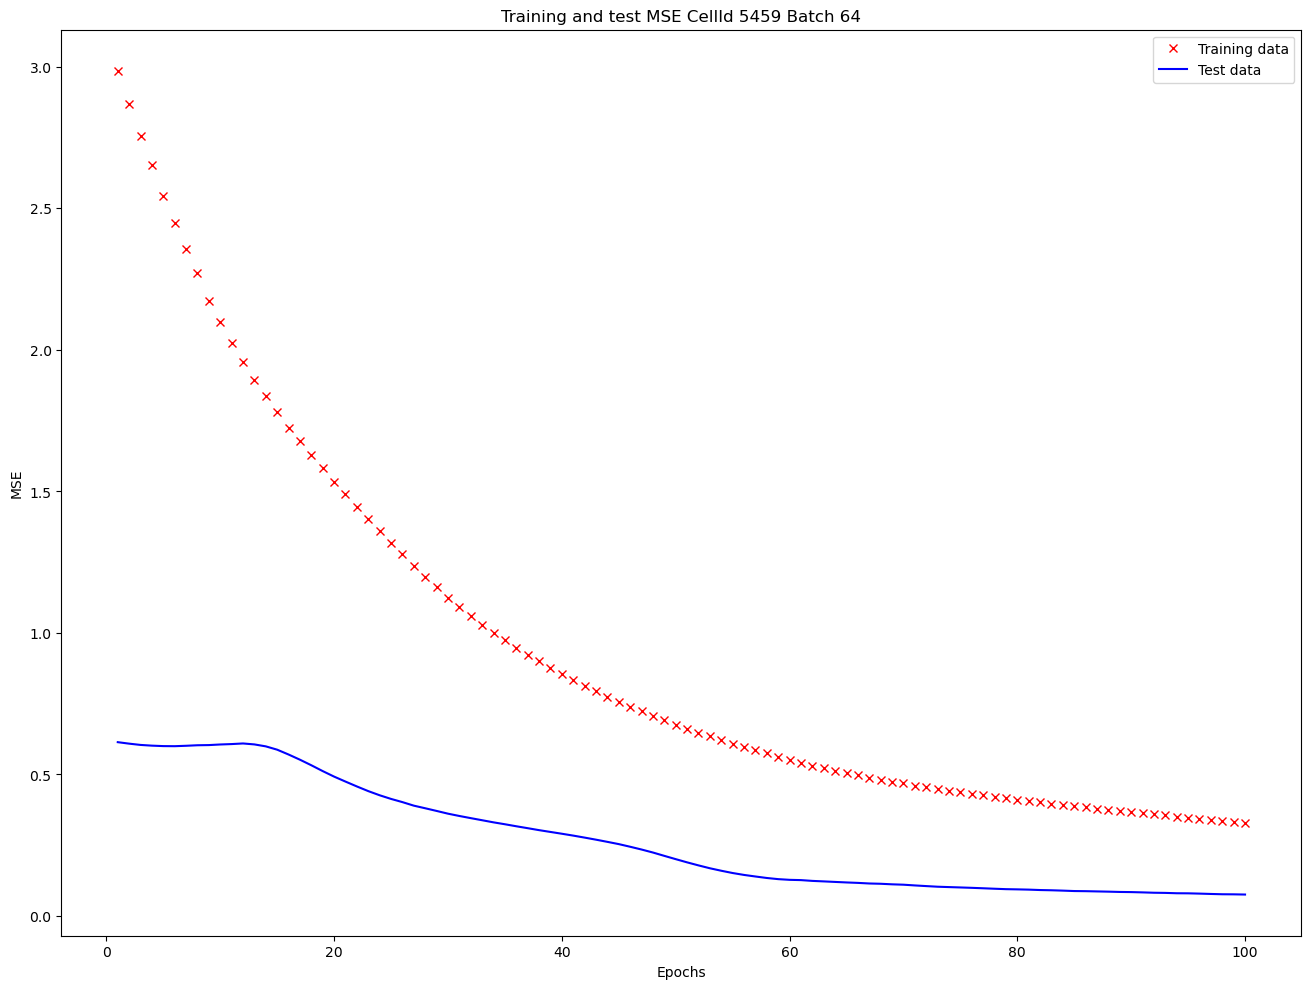

In [73]:
history_dict_5459_batch_64 = history_5459_batch_64.history
mse_values = history_dict_5459_batch_64['mse']
val_mse_values_5459_batch_64 = history_dict_5459_batch_64['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_64) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_64.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_64, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 64')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 128

In [74]:
simple_lstm_model_5459_batch_128 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_128.summary()

simple_lstm_model_5459_batch_128.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS ,metrics=VAL_METRICS )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [75]:
history_5459_batch_128 = simple_lstm_model_5459_batch_128.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=128,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 307ms/step - loss: 3.2977 - accuracy: 0.0000e+00 - mae: 1.3117 - mse: 3.2977 - root_mean_squared_error: 1.5737 - val_loss: 0.8926 - val_accuracy: 0.0000e+00 - val_mae: 0.7939 - val_mse: 0.8926 - val_root_mean_squared_error: 0.9448
Epoch 2/100
3/3 [==============================] - 0s 50ms/step - loss: 3.2496 - accuracy: 0.0000e+00 - mae: 1.3020 - mse: 3.2496 - root_mean_squared_error: 1.8027 - val_loss: 0.8809 - val_accuracy: 0.0000e+00 - val_mae: 0.7892 - val_mse: 0.8809 - val_root_mean_squared_error: 0.9385
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 3.2018 - accuracy: 0.0000e+00 - mae: 1.2924 - mse: 3.2018 - root_mean_squared_error: 1.7894 - val_loss: 0.8687 - val_accuracy: 0.0000e+00 - val_mae: 0.7843 - val_mse: 0.8687 - val_root_mean_squared_error: 0.9320
Epoch 4/100
3/3 [==============================] - 0s 51ms/step - loss: 3.1553 - accuracy: 0.0000e+00 - mae: 1.2832 - mse: 3.1553 - root_mean_squar

In [76]:
test_predictions_5459_batch_128 = simple_lstm_model_5459_batch_128.predict(x_val_uni_cellId[0])

mse_5459_batch_128 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_128(y_val_uni_cellId[0], test_predictions_5459_batch_128).numpy()

0.46728674

In [77]:
#RMSE
mse_5459_batch_128 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_128(y_val_uni_cellId[0], test_predictions_5459_batch_128).numpy()

0.47864783

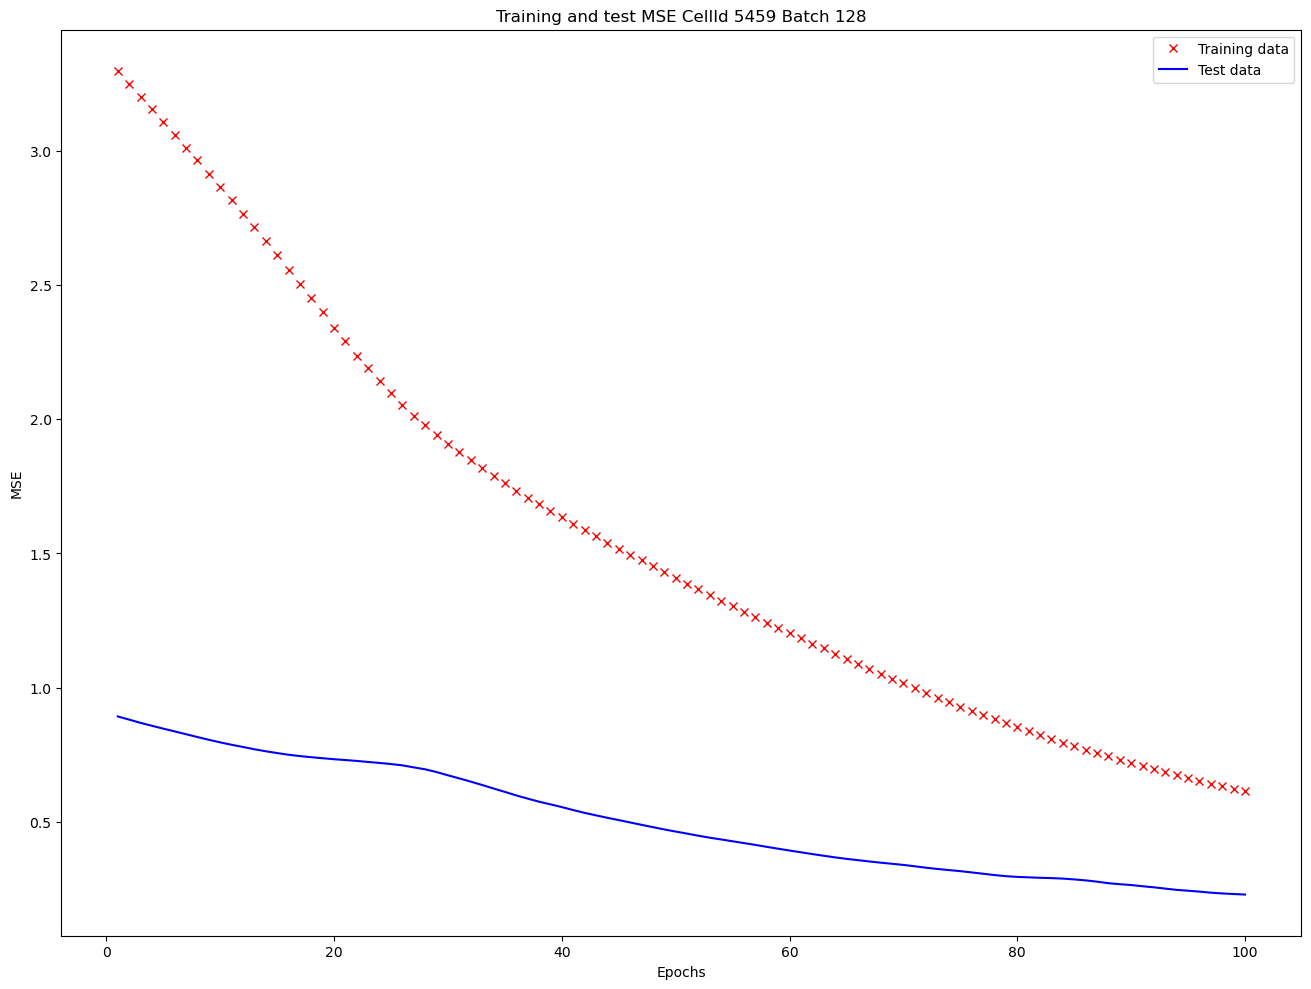

In [78]:
history_dict_5459_batch_128 = history_5459_batch_128.history
mse_values = history_dict_5459_batch_128['mse']
val_mse_values_5459_batch_128 = history_dict_5459_batch_128['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_128) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_128.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_128, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 128')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 256

In [79]:
simple_lstm_model_5459_batch_256 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_256.summary()

simple_lstm_model_5459_batch_256.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS ,metrics=VAL_METRICS )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [80]:
history_5459_batch_256 = simple_lstm_model_5459_batch_256.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=256,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 434ms/step - loss: 3.7825 - accuracy: 0.0000e+00 - mae: 1.3970 - mse: 3.7825 - root_mean_squared_error: 1.6961 - val_loss: 0.8922 - val_accuracy: 0.0000e+00 - val_mae: 0.7915 - val_mse: 0.8922 - val_root_mean_squared_error: 0.9446
Epoch 2/100
2/2 [==============================] - 0s 65ms/step - loss: 3.7340 - accuracy: 0.0000e+00 - mae: 1.3889 - mse: 3.7340 - root_mean_squared_error: 1.9324 - val_loss: 0.8901 - val_accuracy: 0.0000e+00 - val_mae: 0.7909 - val_mse: 0.8901 - val_root_mean_squared_error: 0.9435
Epoch 3/100
2/2 [==============================] - 0s 73ms/step - loss: 3.6865 - accuracy: 0.0000e+00 - mae: 1.3807 - mse: 3.6865 - root_mean_squared_error: 1.9200 - val_loss: 0.8882 - val_accuracy: 0.0000e+00 - val_mae: 0.7903 - val_mse: 0.8882 - val_root_mean_squared_error: 0.9425
Epoch 4/100
2/2 [==============================] - 0s 42ms/step - loss: 3.6401 - accuracy: 0.0000e+00 - mae: 1.3727 - mse: 3.6401 - root_mean_squar

In [81]:
test_predictions_5459_batch_256 = simple_lstm_model_5459_batch_256.predict(x_val_uni_cellId[0])

mse_5459_batch_256 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_256(y_val_uni_cellId[0], test_predictions_5459_batch_256).numpy()

0.41318613

In [82]:
#RMSE
mse_5459_batch_256 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_256(y_val_uni_cellId[0], test_predictions_5459_batch_256).numpy()

0.65473485

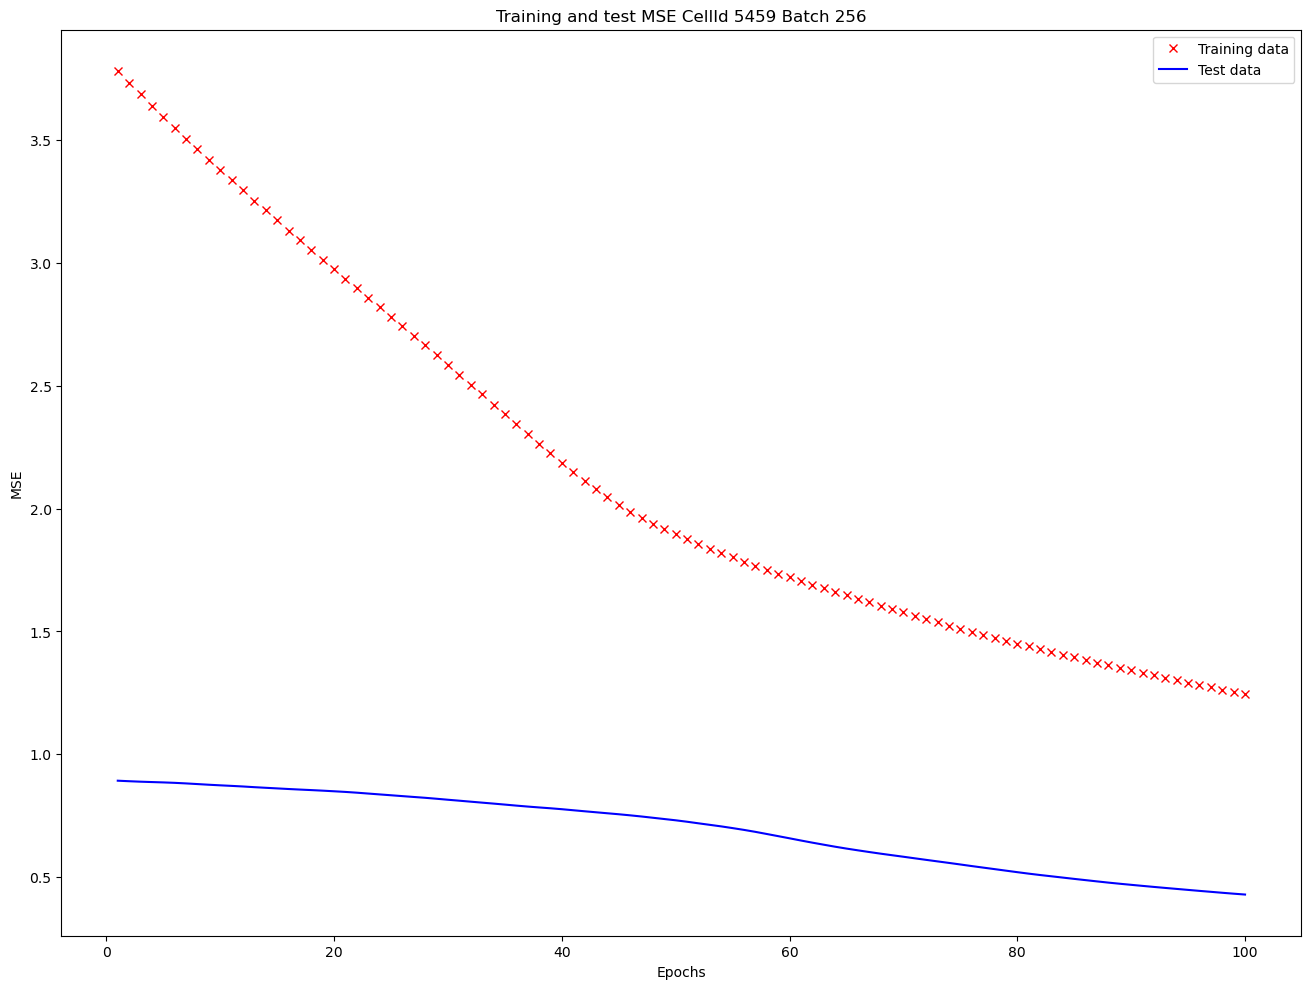

In [83]:
history_dict_5459_batch_256 = history_5459_batch_256.history
mse_values = history_dict_5459_batch_256['mse']
val_mse_values_5459_batch_256 = history_dict_5459_batch_256['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_256) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_256.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_256, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 256')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 512

In [84]:
simple_lstm_model_5459_batch_512 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_512.summary()

simple_lstm_model_5459_batch_512.compile(optimizer=VAL_OPTIMIZER , loss=VAL_LOSS ,metrics=VAL_METRICS )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [85]:
EPOCHS = 100

history_5459_batch_512 = simple_lstm_model_5459_batch_512.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=512,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 813ms/step - loss: 2.1383 - accuracy: 0.0000e+00 - mae: 1.0207 - mse: 2.1383 - root_mean_squared_error: 1.3048 - val_loss: 0.4815 - val_accuracy: 0.0000e+00 - val_mae: 0.5809 - val_mse: 0.4815 - val_root_mean_squared_error: 0.6939
Epoch 2/100
1/1 [==============================] - 0s 79ms/step - loss: 2.1220 - accuracy: 0.0000e+00 - mae: 1.0176 - mse: 2.1220 - root_mean_squared_error: 1.4567 - val_loss: 0.4803 - val_accuracy: 0.0000e+00 - val_mae: 0.5807 - val_mse: 0.4803 - val_root_mean_squared_error: 0.6931
Epoch 3/100
1/1 [==============================] - 0s 85ms/step - loss: 2.1059 - accuracy: 0.0000e+00 - mae: 1.0144 - mse: 2.1059 - root_mean_squared_error: 1.4512 - val_loss: 0.4786 - val_accuracy: 0.0000e+00 - val_mae: 0.5801 - val_mse: 0.4786 - val_root_mean_squared_error: 0.6918
Epoch 4/100
1/1 [==============================] - 0s 88ms/step - loss: 2.0901 - accuracy: 0.0000e+00 - mae: 1.0112 - mse: 2.0901 - root_mean_squar

In [86]:
test_predictions_5459_batch_512 = simple_lstm_model_5459_batch_512.predict(x_val_uni_cellId[0])

mse_5459_batch_512 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_512(y_val_uni_cellId[0], test_predictions_5459_batch_512).numpy()

0.5574821

In [87]:
#RMSE
mse_5459_batch_512 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_512(y_val_uni_cellId[0], test_predictions_5459_batch_512).numpy()

0.55784166

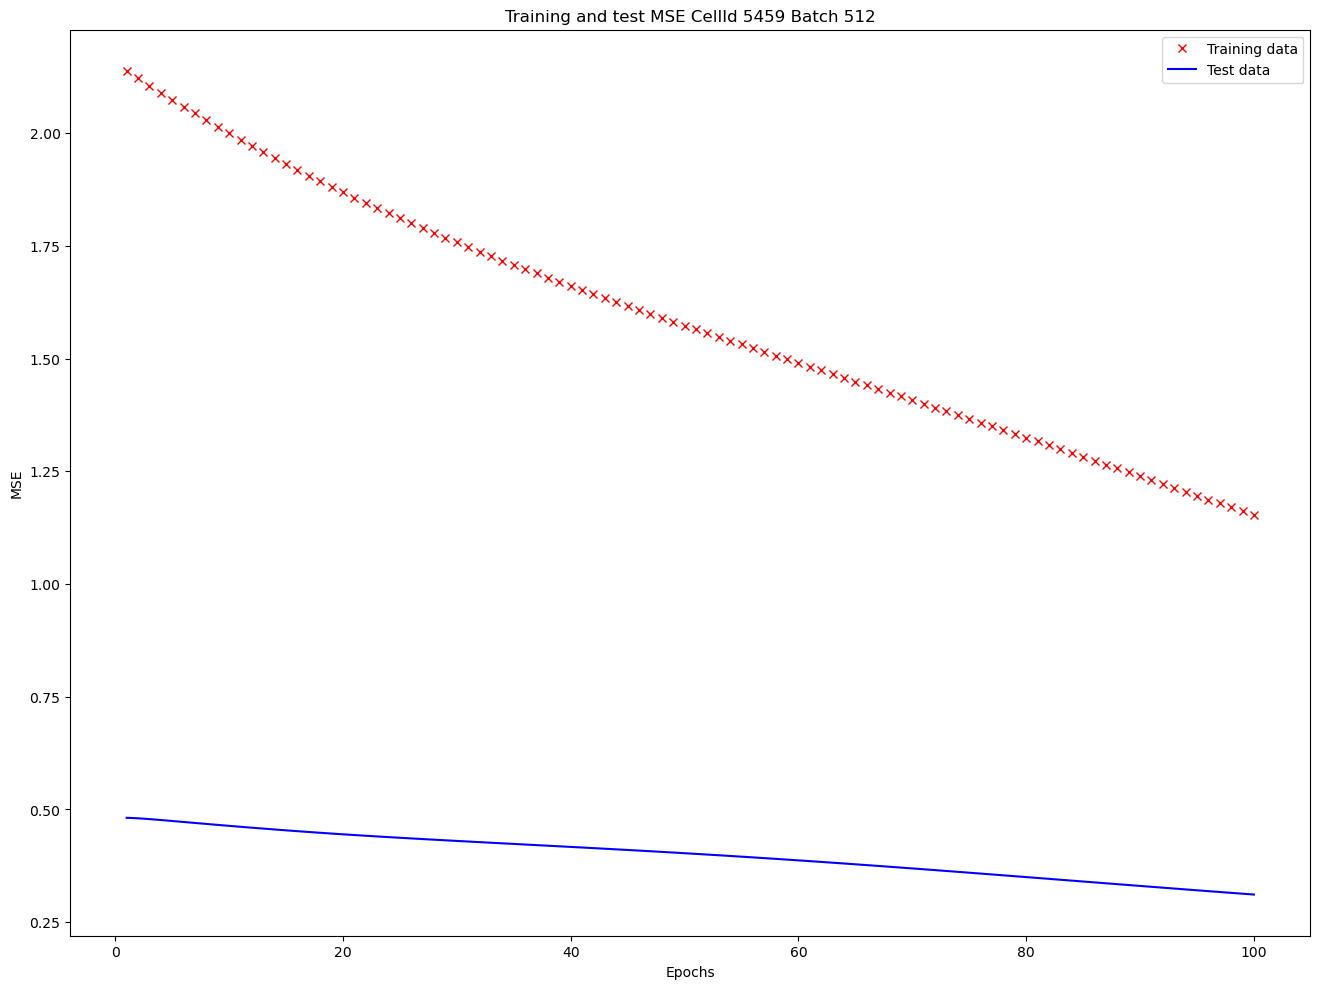

In [88]:
history_dict_5459_batch_512 = history_5459_batch_512.history
mse_values = history_dict_5459_batch_512['mse']
val_mse_values_5459_batch_512 = history_dict_5459_batch_512['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_512) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_512.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_512, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 512')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch 1024

In [89]:
simple_lstm_model_5459_batch_1024 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[0].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5459_batch_1024.summary()

simple_lstm_model_5459_batch_1024.compile(optimizer=VAL_OPTIMIZER , loss=VAL_LOSS ,metrics=VAL_METRICS )

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [90]:
EPOCHS = 100

history_5459_batch_1024 = simple_lstm_model_5459_batch_1024.fit(x_train_uni_cellId[0], y_train_uni_cellId[0], epochs=EPOCHS,
                      batch_size=1024,
                      validation_data=(x_val_uni_cellId[0], y_val_uni_cellId[0]), verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 816ms/step - loss: 3.2980 - accuracy: 0.0000e+00 - mae: 1.2856 - mse: 3.2980 - root_mean_squared_error: 1.5927 - val_loss: 0.6709 - val_accuracy: 0.0000e+00 - val_mae: 0.6763 - val_mse: 0.6709 - val_root_mean_squared_error: 0.8191
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 3.2810 - accuracy: 0.0000e+00 - mae: 1.2828 - mse: 3.2810 - root_mean_squared_error: 1.8114 - val_loss: 0.6694 - val_accuracy: 0.0000e+00 - val_mae: 0.6756 - val_mse: 0.6694 - val_root_mean_squared_error: 0.8182
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 3.2642 - accuracy: 0.0000e+00 - mae: 1.2800 - mse: 3.2642 - root_mean_squared_error: 1.8067 - val_loss: 0.6679 - val_accuracy: 0.0000e+00 - val_mae: 0.6749 - val_mse: 0.6679 - val_root_mean_squared_error: 0.8173
Epoch 4/100
1/1 [==============================] - 0s 82ms/step - loss: 3.2476 - accuracy: 0.0000e+00 - mae: 1.2772 - mse: 3.2476 - root_mean_squar

In [91]:
test_predictions_5459_batch_1024 = simple_lstm_model_5459_batch_1024.predict(x_val_uni_cellId[0])

mse_5459_batch_1024 = tf.keras.losses.MeanSquaredError()
mse_5459_batch_1024(y_val_uni_cellId[0], test_predictions_5459_batch_1024).numpy()

0.32165194

In [92]:
#RMSE
mse_5459_batch_1024 = tf.keras.metrics.RootMeanSquaredError()
mse_5459_batch_1024(y_val_uni_cellId[0], test_predictions_5459_batch_1024).numpy()

0.52997166

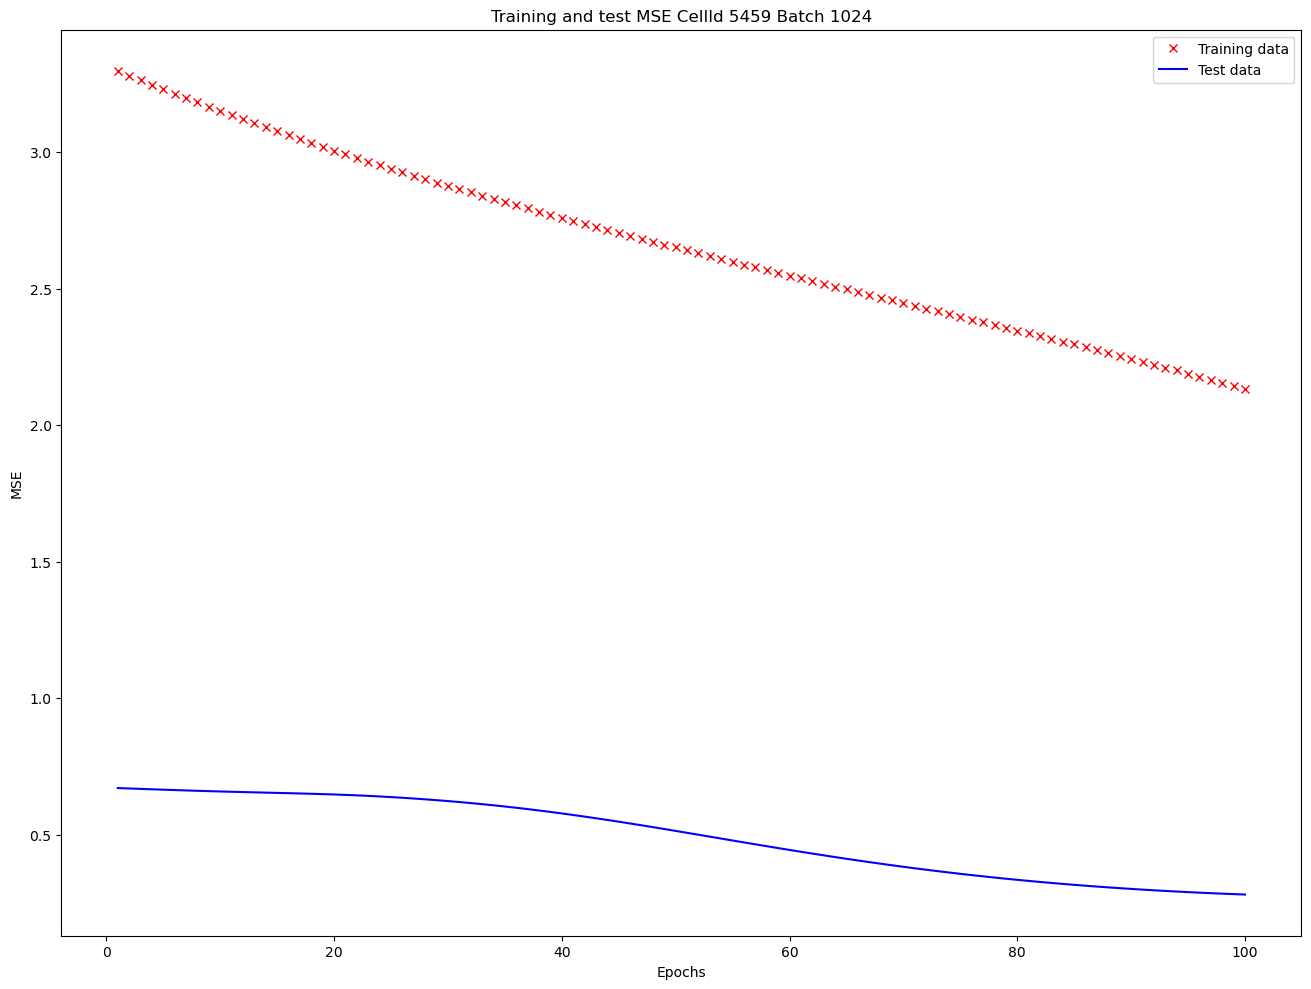

In [93]:
history_dict_5459_batch_1024 = history_5459_batch_1024.history
mse_values = history_dict_5459_batch_1024['mse']
val_mse_values_5459_batch_1024 = history_dict_5459_batch_1024['val_mse']
epochs = range(1, len(val_mse_values_5459_batch_1024) + 1)

%matplotlib inline 

plt.figure(figsize=(16, 12), dpi=100) 
plt.plot(epochs, history_5459_batch_1024.history['mse'], 'rx', label='Training data')
plt.plot(epochs, val_mse_values_5459_batch_1024, 'b', label='Test data')
plt.title('Training and test MSE CellId 5459 Batch 1024')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

#### Batch Comparation

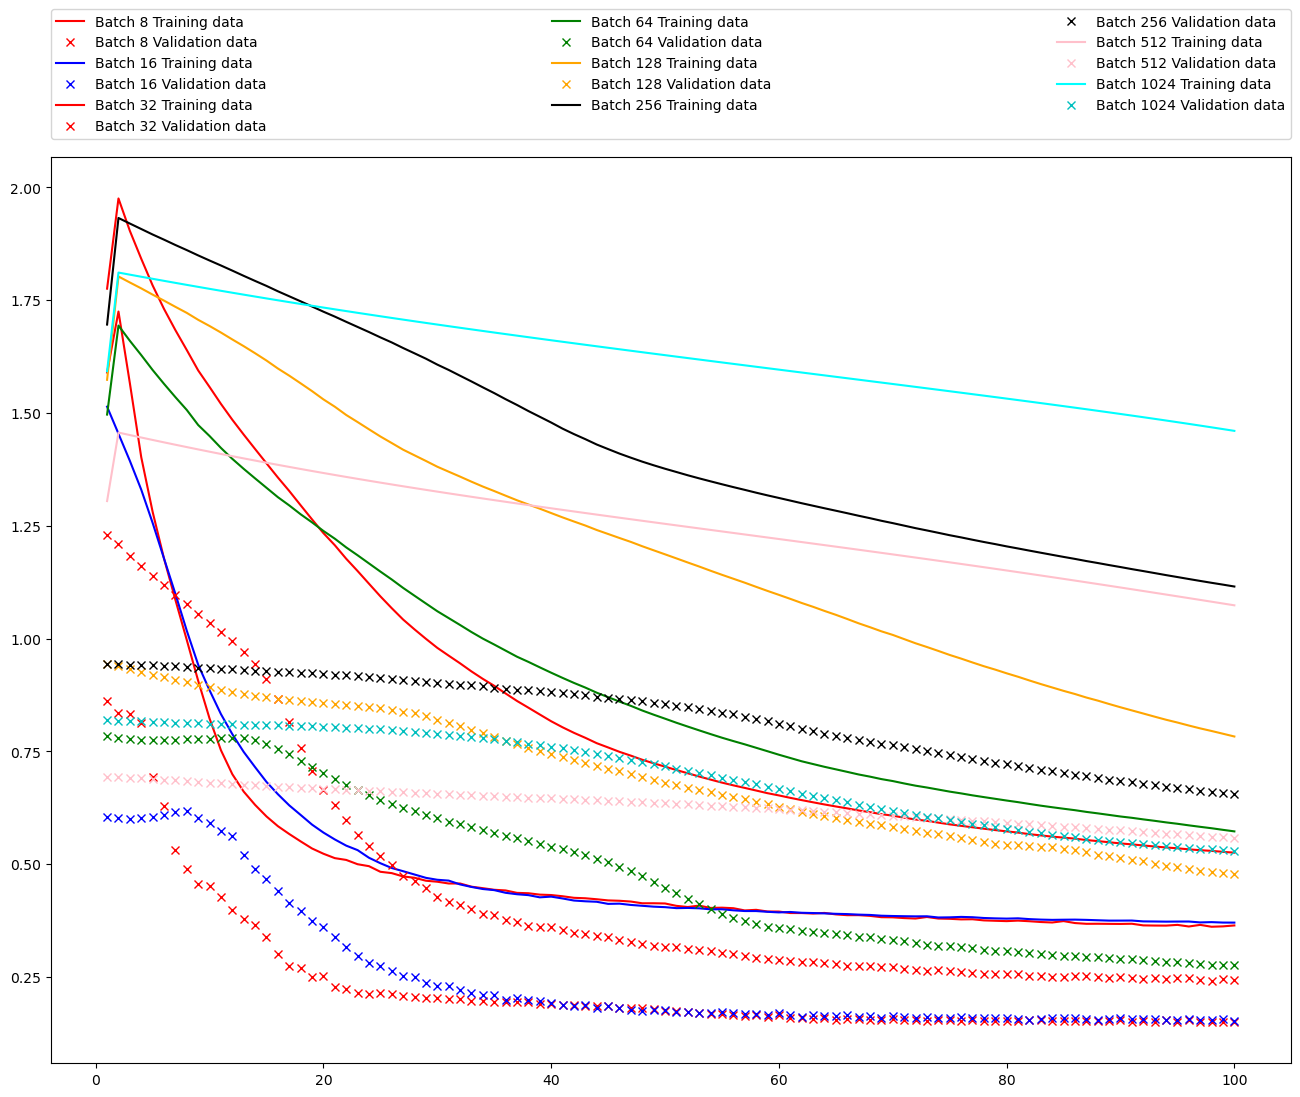

In [94]:
plt.figure(figsize=(16, 12), dpi=100) 

plt.plot(epochs, history_dict_5459_batch_8['root_mean_squared_error'], 'red', label='Batch 8 Training data')
plt.plot(epochs, history_dict_5459_batch_8['val_root_mean_squared_error'], 'rx', label='Batch 8 Validation data')
plt.plot(epochs, history_5459.history['root_mean_squared_error'], 'blue', label='Batch 16 Training data')
plt.plot(epochs, history_5459.history['val_root_mean_squared_error'], 'bx', label='Batch 16 Validation data')
plt.plot(epochs, history_dict_5459_batch_32['root_mean_squared_error'], 'red', label='Batch 32 Training data')
plt.plot(epochs, history_dict_5459_batch_32['val_root_mean_squared_error'], 'rx', label='Batch 32 Validation data')
plt.plot(epochs, history_dict_5459_batch_64['root_mean_squared_error'], 'green', label='Batch 64 Training data')
plt.plot(epochs, history_dict_5459_batch_64['val_root_mean_squared_error'], 'gx', label='Batch 64 Validation data')
plt.plot(epochs, history_dict_5459_batch_128['root_mean_squared_error'], 'orange', label='Batch 128 Training data')
plt.plot(epochs, history_dict_5459_batch_128['val_root_mean_squared_error'], 'x', color = 'orange', label='Batch 128 Validation data')
plt.plot(epochs, history_dict_5459_batch_256['root_mean_squared_error'], 'black', label='Batch 256 Training data')
plt.plot(epochs, history_dict_5459_batch_256['val_root_mean_squared_error'], 'kx', label='Batch 256 Validation data')
plt.plot(epochs, history_dict_5459_batch_512['root_mean_squared_error'], 'pink', label='Batch 512 Training data')
plt.plot(epochs, history_dict_5459_batch_512['val_root_mean_squared_error'], 'x', color='pink', label='Batch 512 Validation data')
plt.plot(epochs, history_dict_5459_batch_1024['root_mean_squared_error'], 'cyan', label='Batch 1024 Training data')
plt.plot(epochs, history_dict_5459_batch_1024['val_root_mean_squared_error'], 'cx', label='Batch 1024 Validation data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('RMSEComparation_5459.png',bbox_inches='tight')

plt.show()

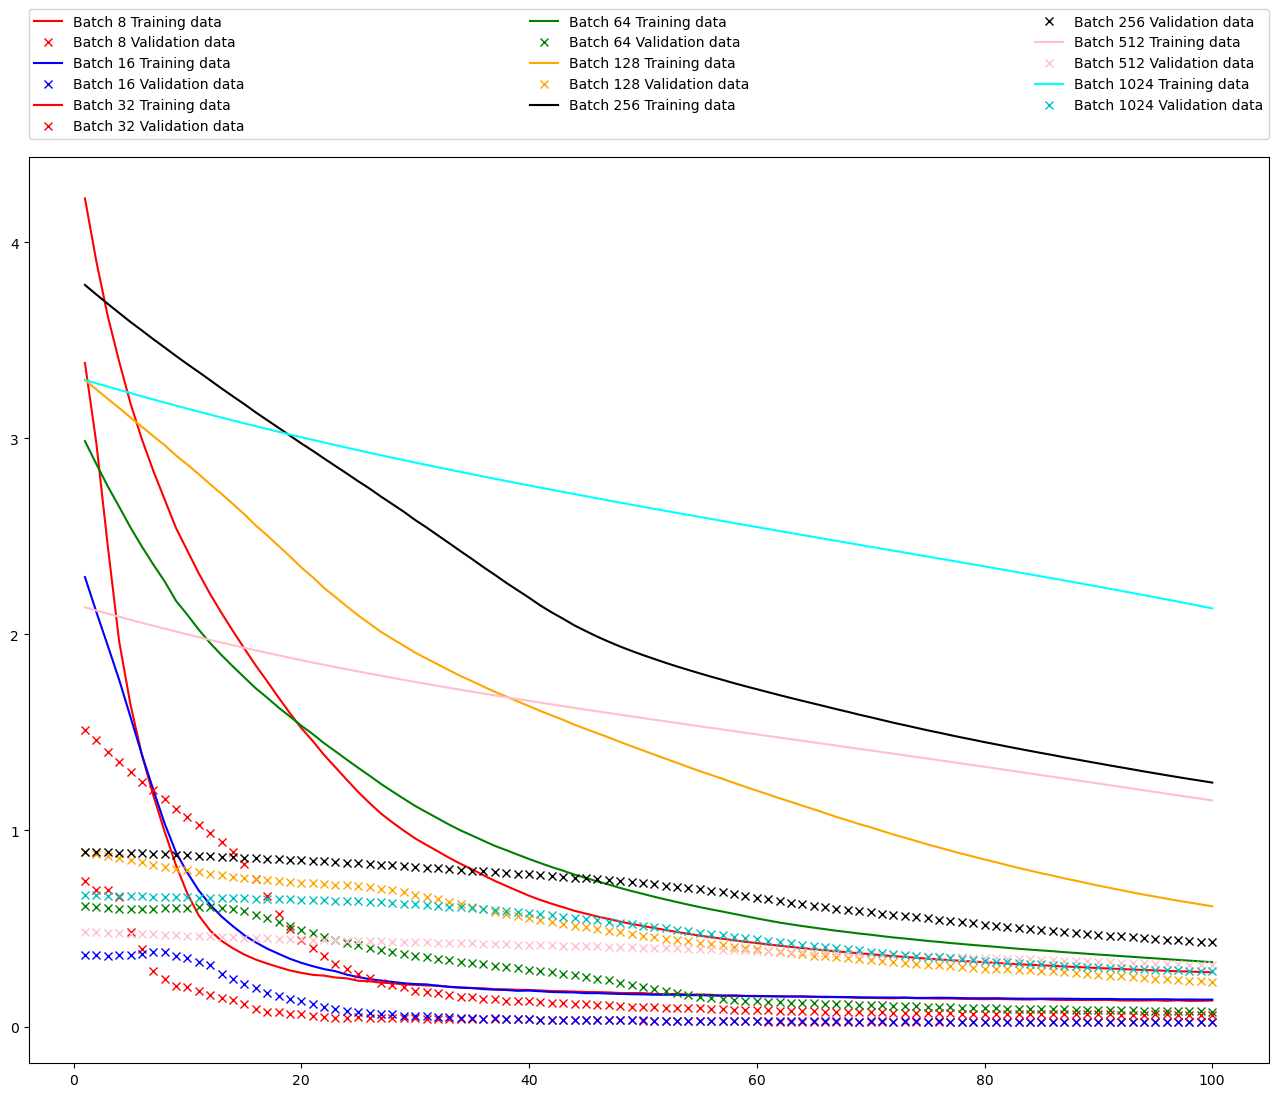

In [95]:
plt.figure(figsize=(16, 12), dpi=100) 

plt.plot(epochs, history_dict_5459_batch_8['mse'], 'red', label='Batch 8 Training data')
plt.plot(epochs, history_dict_5459_batch_8['val_mse'], 'rx', label='Batch 8 Validation data')
plt.plot(epochs, history_5459.history['mse'], 'blue', label='Batch 16 Training data')
plt.plot(epochs, history_5459.history['val_mse'], 'bx', label='Batch 16 Validation data')
plt.plot(epochs, history_dict_5459_batch_32['mse'], 'red', label='Batch 32 Training data')
plt.plot(epochs, history_dict_5459_batch_32['val_mse'], 'rx', label='Batch 32 Validation data')
plt.plot(epochs, history_dict_5459_batch_64['mse'], 'green', label='Batch 64 Training data')
plt.plot(epochs, history_dict_5459_batch_64['val_mse'], 'gx', label='Batch 64 Validation data')
plt.plot(epochs, history_dict_5459_batch_128['mse'], 'orange', label='Batch 128 Training data')
plt.plot(epochs, history_dict_5459_batch_128['val_mse'], 'x', color = 'orange', label='Batch 128 Validation data')
plt.plot(epochs, history_dict_5459_batch_256['mse'], 'black', label='Batch 256 Training data')
plt.plot(epochs, history_dict_5459_batch_256['val_mse'], 'kx', label='Batch 256 Validation data')
plt.plot(epochs, history_dict_5459_batch_512['mse'], 'pink', label='Batch 512 Training data')
plt.plot(epochs, history_dict_5459_batch_512['val_mse'], 'x', color='pink', label='Batch 512 Validation data')
plt.plot(epochs, history_dict_5459_batch_1024['mse'], 'cyan', label='Batch 1024 Training data')
plt.plot(epochs, history_dict_5459_batch_1024['val_mse'], 'cx', label='Batch 1024 Validation data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('MSEComparation_5459.png',bbox_inches='tight')

plt.show()

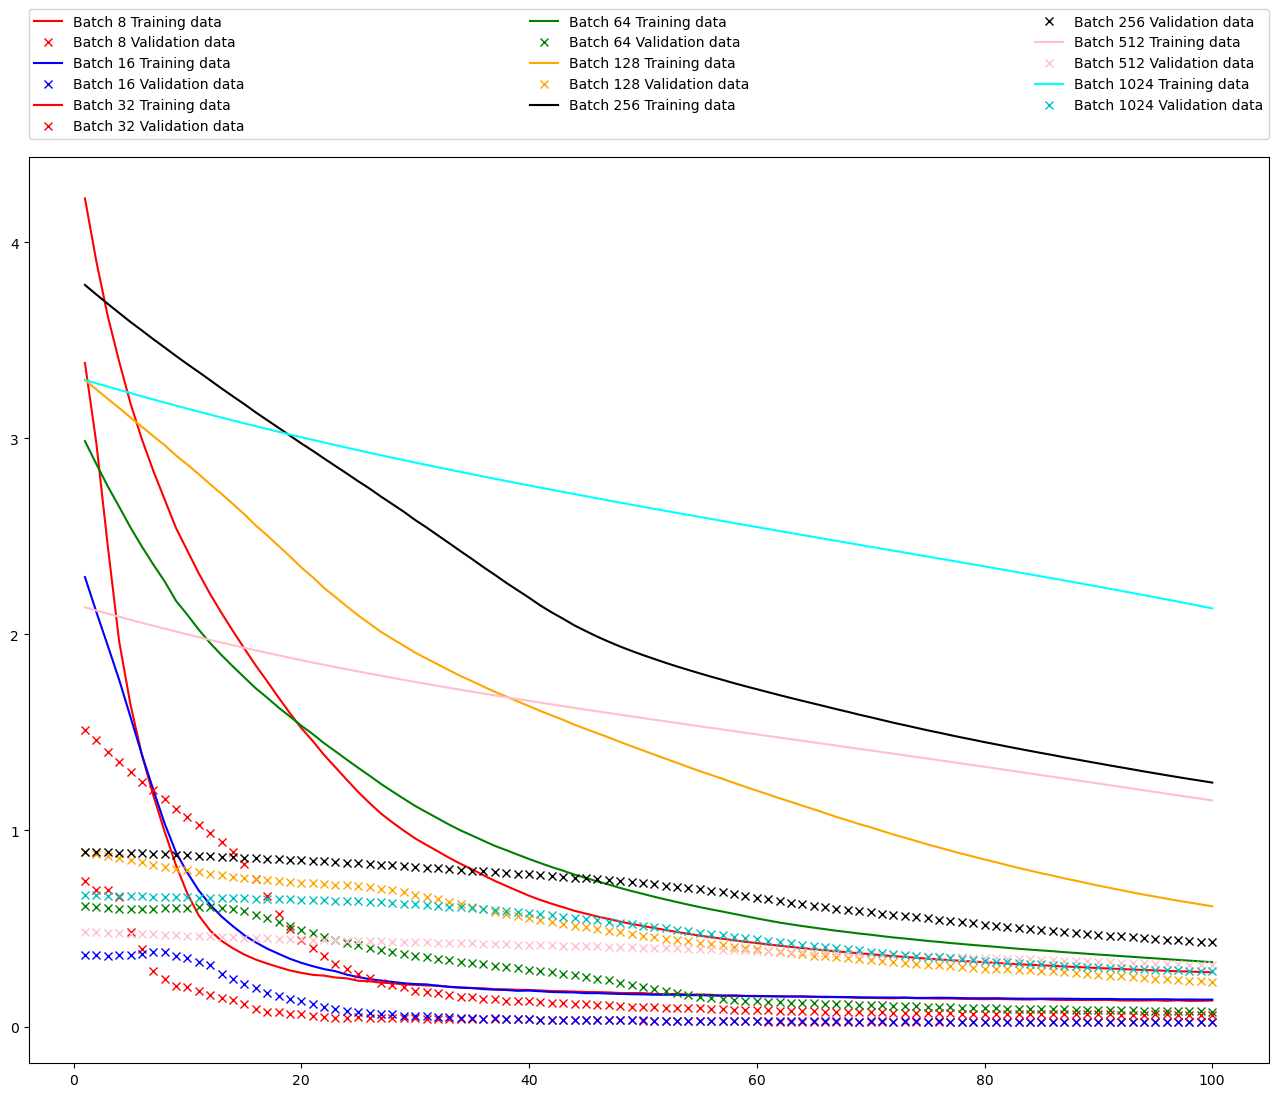

In [96]:
plt.figure(figsize=(16, 12), dpi=100) 

plt.plot(epochs, history_dict_5459_batch_8['loss'], 'red', label='Batch 8 Training data')
plt.plot(epochs, history_dict_5459_batch_8['val_loss'], 'rx', label='Batch 8 Validation data')
plt.plot(epochs, history_5459.history['loss'], 'blue', label='Batch 16 Training data')
plt.plot(epochs, history_5459.history['val_loss'], 'bx', label='Batch 16 Validation data')
plt.plot(epochs, history_dict_5459_batch_32['loss'], 'red', label='Batch 32 Training data')
plt.plot(epochs, history_dict_5459_batch_32['val_loss'], 'rx', label='Batch 32 Validation data')
plt.plot(epochs, history_dict_5459_batch_64['loss'], 'green', label='Batch 64 Training data')
plt.plot(epochs, history_dict_5459_batch_64['val_loss'], 'gx', label='Batch 64 Validation data')
plt.plot(epochs, history_dict_5459_batch_128['loss'], 'orange', label='Batch 128 Training data')
plt.plot(epochs, history_dict_5459_batch_128['val_loss'], 'x', color = 'orange', label='Batch 128 Validation data')
plt.plot(epochs, history_dict_5459_batch_256['loss'], 'black', label='Batch 256 Training data')
plt.plot(epochs, history_dict_5459_batch_256['val_loss'], 'kx', label='Batch 256 Validation data')
plt.plot(epochs, history_dict_5459_batch_512['loss'], 'pink', label='Batch 512 Training data')
plt.plot(epochs, history_dict_5459_batch_512['val_loss'], 'x', color='pink', label='Batch 512 Validation data')
plt.plot(epochs, history_dict_5459_batch_1024['loss'], 'cyan', label='Batch 1024 Training data')
plt.plot(epochs, history_dict_5459_batch_1024['val_loss'], 'cx', label='Batch 1024 Validation data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('LossComparation_5459.png',bbox_inches='tight')

plt.show()

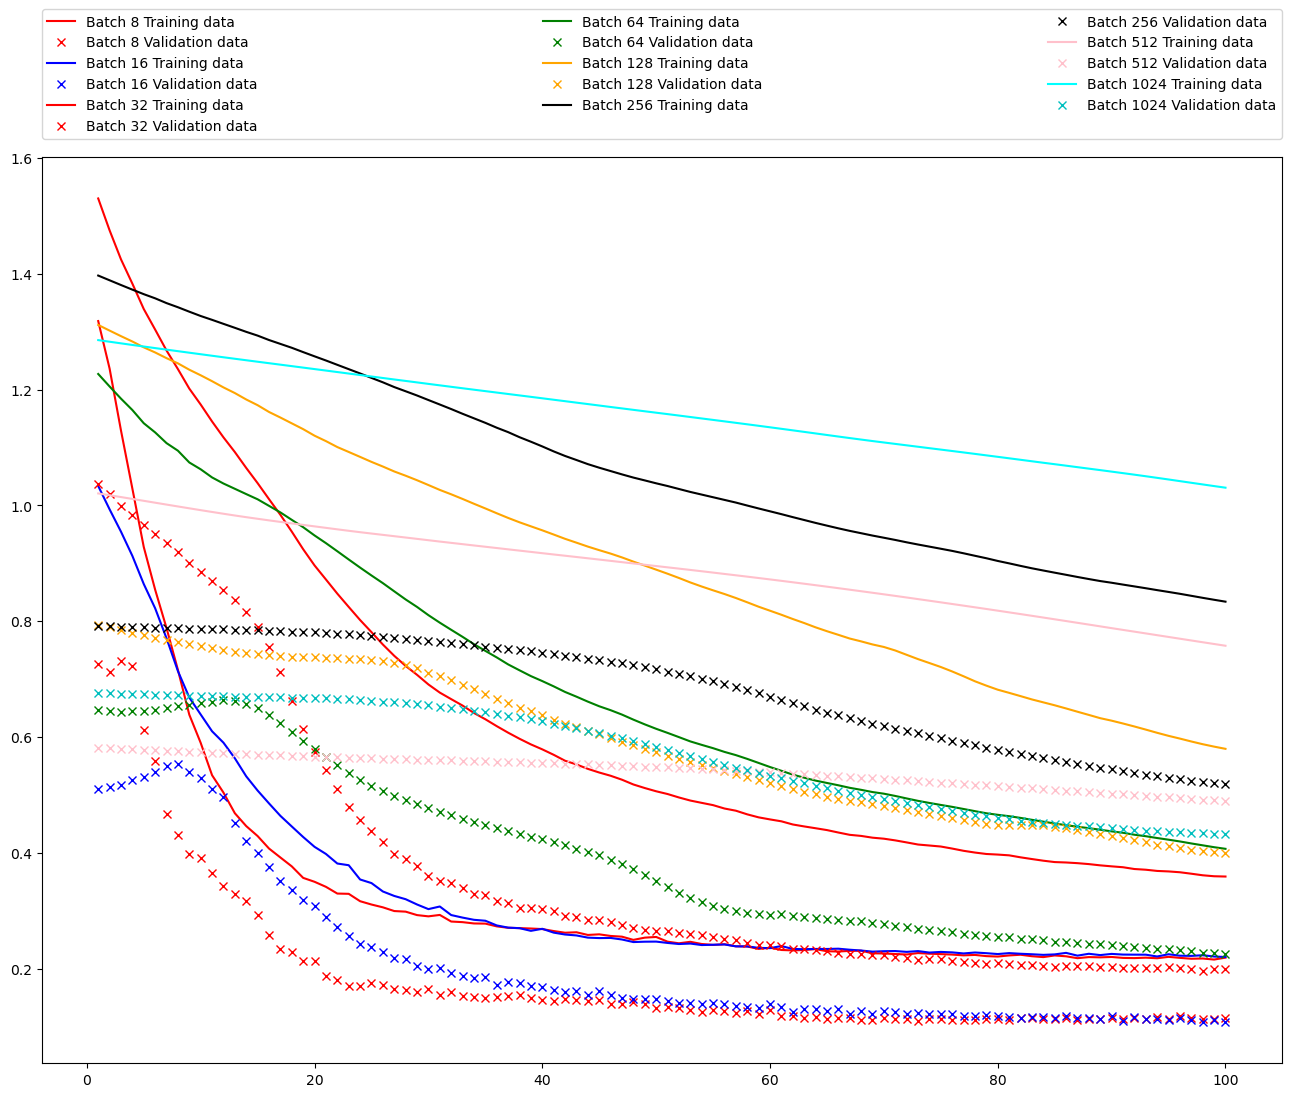

In [97]:
plt.figure(figsize=(16, 12), dpi=100) 

plt.plot(epochs, history_dict_5459_batch_8['mae'], 'red', label='Batch 8 Training data')
plt.plot(epochs, history_dict_5459_batch_8['val_mae'], 'rx', label='Batch 8 Validation data')
plt.plot(epochs, history_5459.history['mae'], 'blue', label='Batch 16 Training data')
plt.plot(epochs, history_5459.history['val_mae'], 'bx', label='Batch 16 Validation data')
plt.plot(epochs, history_dict_5459_batch_32['mae'], 'red', label='Batch 32 Training data')
plt.plot(epochs, history_dict_5459_batch_32['val_mae'], 'rx', label='Batch 32 Validation data')
plt.plot(epochs, history_dict_5459_batch_64['mae'], 'green', label='Batch 64 Training data')
plt.plot(epochs, history_dict_5459_batch_64['val_mae'], 'gx', label='Batch 64 Validation data')
plt.plot(epochs, history_dict_5459_batch_128['mae'], 'orange', label='Batch 128 Training data')
plt.plot(epochs, history_dict_5459_batch_128['val_mae'], 'x', color = 'orange', label='Batch 128 Validation data')
plt.plot(epochs, history_dict_5459_batch_256['mae'], 'black', label='Batch 256 Training data')
plt.plot(epochs, history_dict_5459_batch_256['val_mae'], 'kx', label='Batch 256 Validation data')
plt.plot(epochs, history_dict_5459_batch_512['mae'], 'pink', label='Batch 512 Training data')
plt.plot(epochs, history_dict_5459_batch_512['val_mae'], 'x', color='pink', label='Batch 512 Validation data')
plt.plot(epochs, history_dict_5459_batch_1024['mae'], 'cyan', label='Batch 1024 Training data')
plt.plot(epochs, history_dict_5459_batch_1024['val_mae'], 'cx', label='Batch 1024 Validation data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.savefig('MaeComparation_5459.png',bbox_inches='tight')

plt.show()

# Recurrent neural network con la CellId 5570

In [98]:
simple_lstm_model_5570 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[1].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5570.summary()

simple_lstm_model_5570.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS, metrics=VAL_METRICS )

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [99]:
history_5570 = simple_lstm_model_5570.fit(x_train_uni_cellId[1], y_train_uni_cellId[1], epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni_cellId[1], y_val_uni_cellId[1]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 69ms/step - loss: 0.5175 - accuracy: 0.0000e+00 - mae: 0.6398 - mse: 0.5175 - root_mean_squared_error: 0.6761 - val_loss: 0.5690 - val_accuracy: 0.0000e+00 - val_mae: 0.6651 - val_mse: 0.5690 - val_root_mean_squared_error: 0.7543
Epoch 2/100
19/19 [==============================] - 0s 23ms/step - loss: 0.4464 - accuracy: 0.0000e+00 - mae: 0.5892 - mse: 0.4464 - root_mean_squared_error: 0.6681 - val_loss: 0.4870 - val_accuracy: 0.0000e+00 - val_mae: 0.6062 - val_mse: 0.4870 - val_root_mean_squared_error: 0.6978
Epoch 3/100
19/19 [==============================] - 1s 29ms/step - loss: 0.3987 - accuracy: 0.0000e+00 - mae: 0.5462 - mse: 0.3987 - root_mean_squared_error: 0.6314 - val_loss: 0.4294 - val_accuracy: 0.0000e+00 - val_mae: 0.5604 - val_mse: 0.4294 - val_root_mean_squared_error: 0.6553
Epoch 4/100
19/19 [==============================] - 1s 28ms/step - loss: 0.3650 - accuracy: 0.0000e+00 - mae: 0.5111 - mse: 0.3650 - root_mea

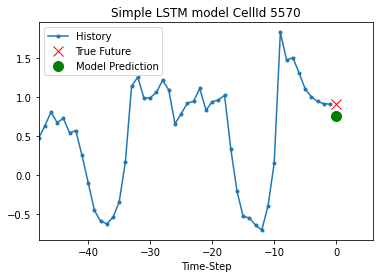

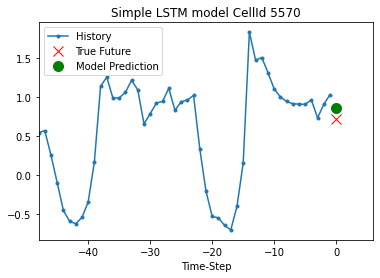

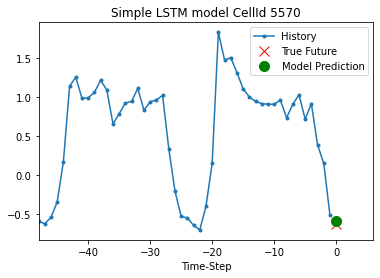

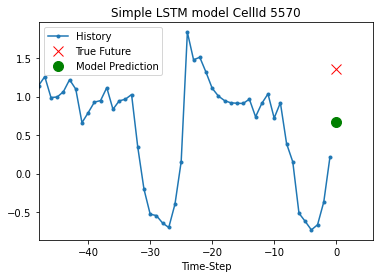

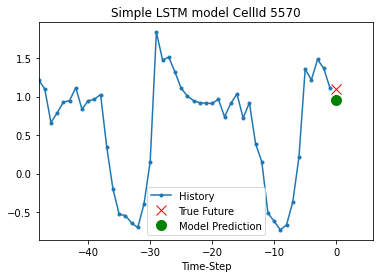

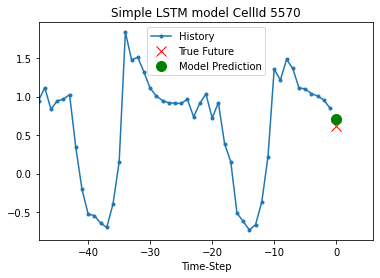

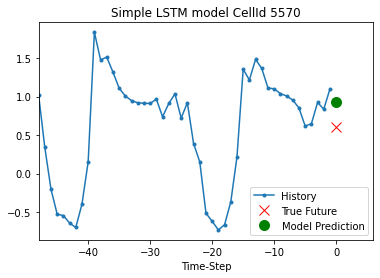

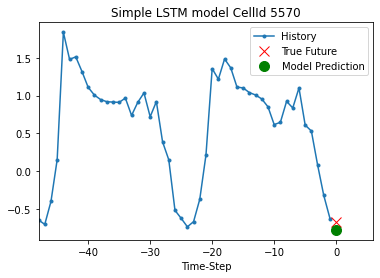

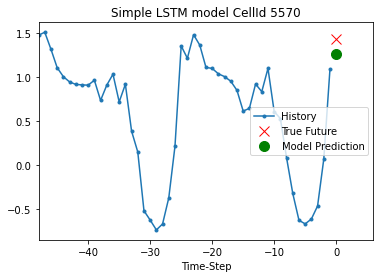

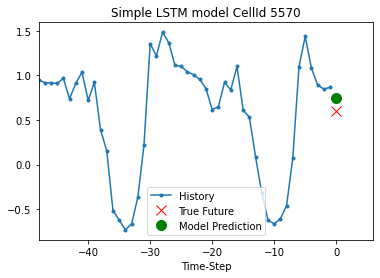

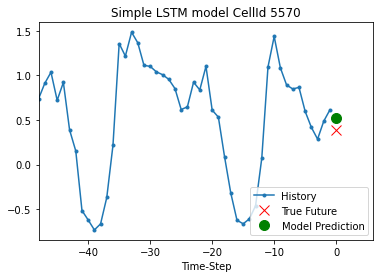

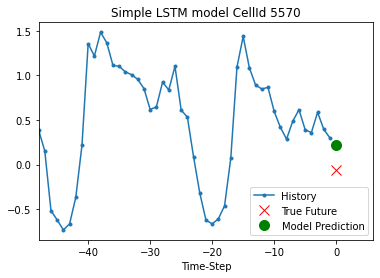

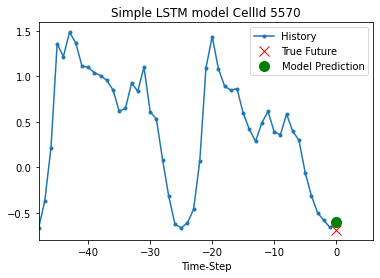

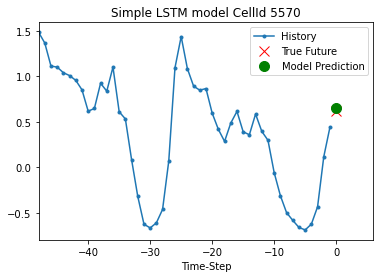

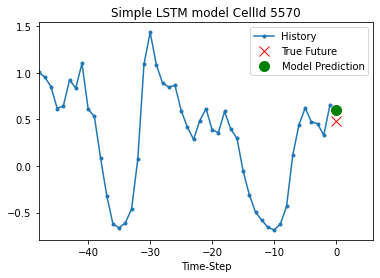

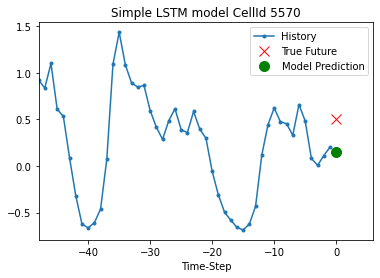

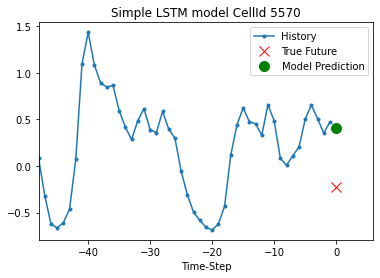

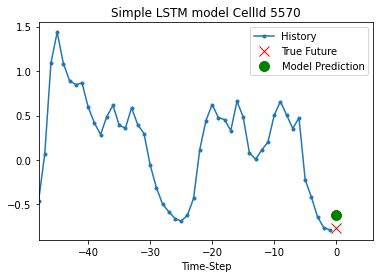

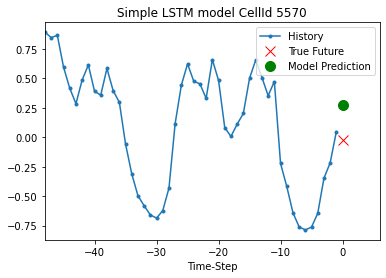

In [100]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[1][i*5], y_val_uni_cellId[1][i*5],
                    simple_lstm_model_5570.predict(x_val_uni_cellId[1])[i*5]], 0, 'Simple LSTM model CellId 5570')
    plot.show()

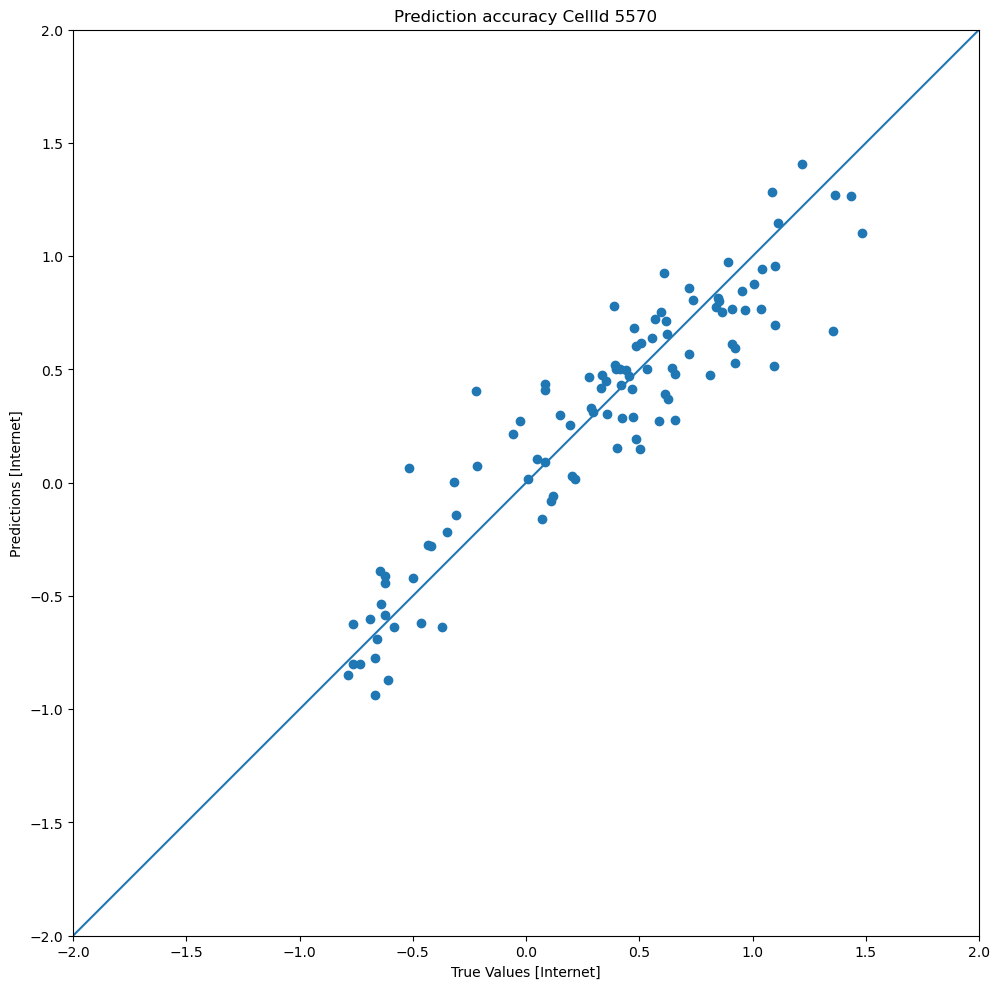

In [101]:
test_predictions_5570 = simple_lstm_model_5570.predict(x_val_uni_cellId[1]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[1], test_predictions_5570)
plt.title('Prediction accuracy CellId 5570')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

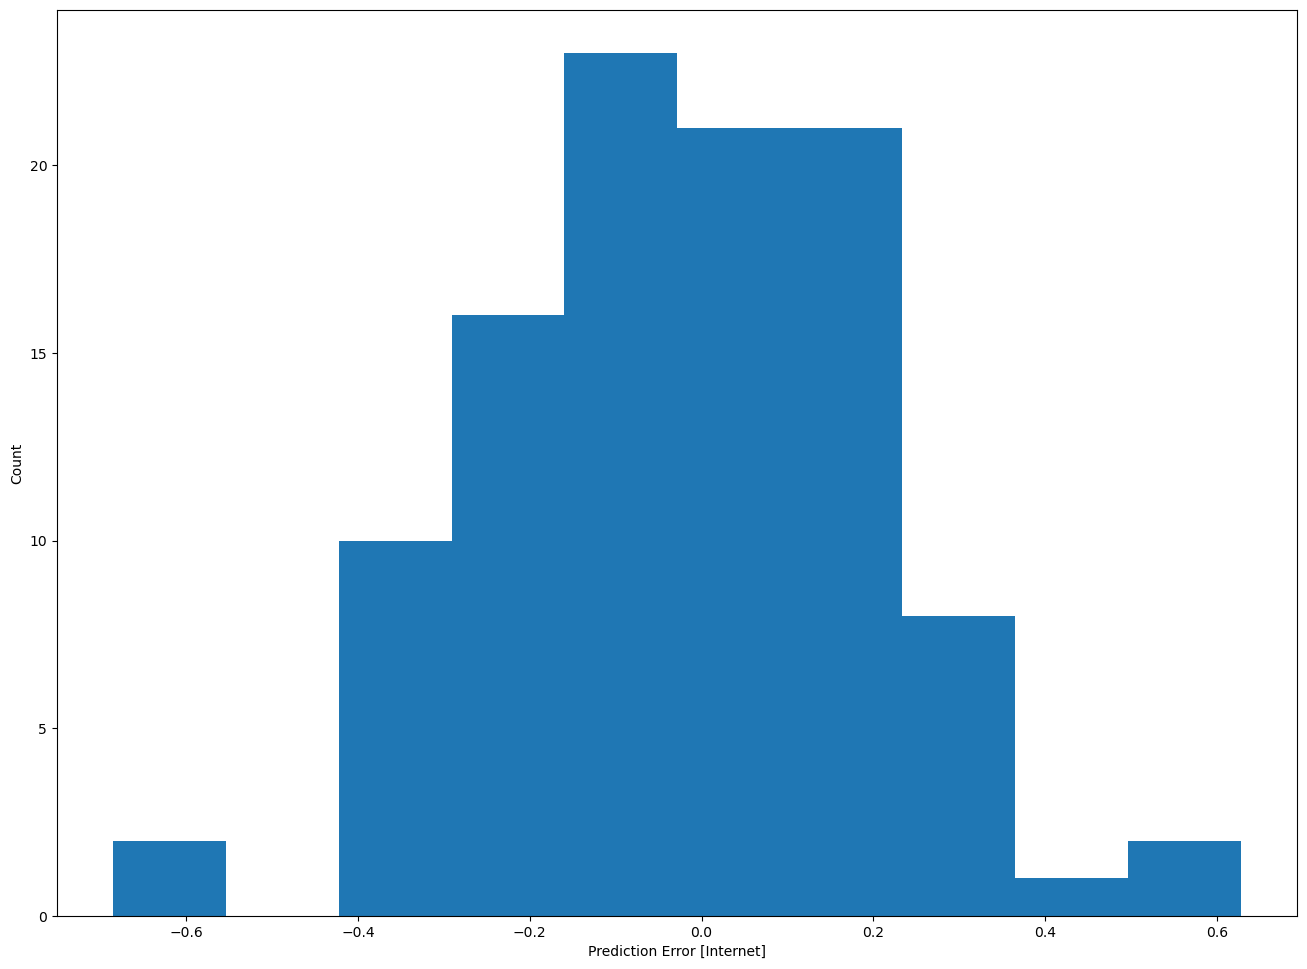

In [102]:
error = test_predictions_5570 - y_val_uni_cellId[1]
plt.figure(figsize=(16, 12), dpi=100) 
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [103]:
test_predictions_5570 = simple_lstm_model_5570.predict(x_val_uni_cellId[1])

mse_5570 = tf.keras.losses.MeanSquaredError()
mse_5570(y_val_uni_cellId[1], test_predictions_5570).numpy()

0.65555435

In [104]:
#RMSE
rmse_5570 = tf.keras.metrics.RootMeanSquaredError()
rmse_5570(y_val_uni_cellId[1], test_predictions_5570).numpy()

0.22532268

# Recurrent neural network con la CellId 5644

In [105]:
simple_lstm_model_5644 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[2].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_5644.summary()

simple_lstm_model_5644.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS, metrics=VAL_METRICS )

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [106]:
history_5644 = simple_lstm_model_5644.fit(x_train_uni_cellId[2], y_train_uni_cellId[2], epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni_cellId[2], y_val_uni_cellId[2]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 76ms/step - loss: 0.6470 - accuracy: 0.0000e+00 - mae: 0.6887 - mse: 0.6470 - root_mean_squared_error: 0.7036 - val_loss: 0.5148 - val_accuracy: 0.0000e+00 - val_mae: 0.5923 - val_mse: 0.5148 - val_root_mean_squared_error: 0.7175
Epoch 2/100
19/19 [==============================] - 1s 34ms/step - loss: 0.5653 - accuracy: 0.0000e+00 - mae: 0.6313 - mse: 0.5653 - root_mean_squared_error: 0.7519 - val_loss: 0.4582 - val_accuracy: 0.0000e+00 - val_mae: 0.5432 - val_mse: 0.4582 - val_root_mean_squared_error: 0.6769
Epoch 3/100
19/19 [==============================] - 1s 34ms/step - loss: 0.5080 - accuracy: 0.0000e+00 - mae: 0.5832 - mse: 0.5080 - root_mean_squared_error: 0.7127 - val_loss: 0.4150 - val_accuracy: 0.0000e+00 - val_mae: 0.5064 - val_mse: 0.4150 - val_root_mean_squared_error: 0.6442
Epoch 4/100
19/19 [==============================] - 1s 33ms/step - loss: 0.4587 - accuracy: 0.0000e+00 - mae: 0.5435 - mse: 0.4587 - root_mea

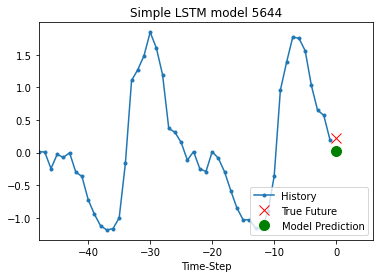

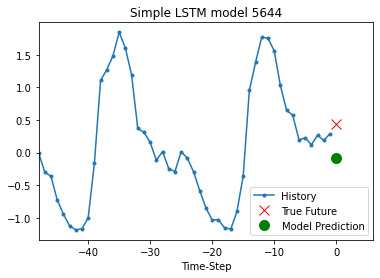

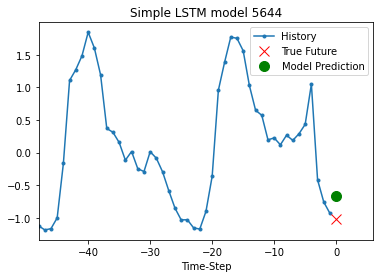

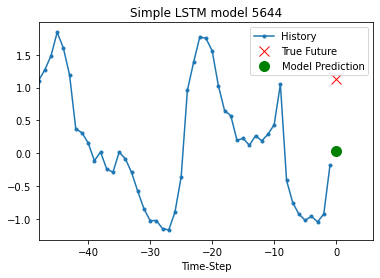

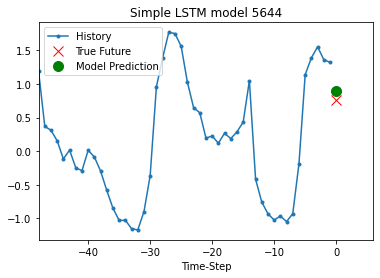

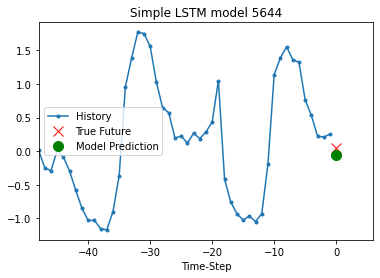

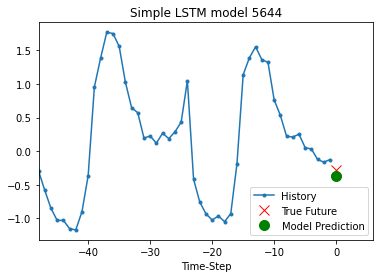

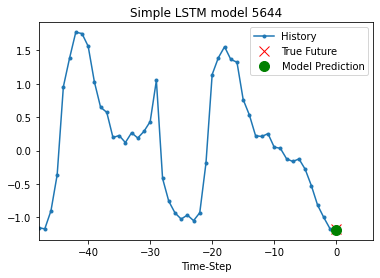

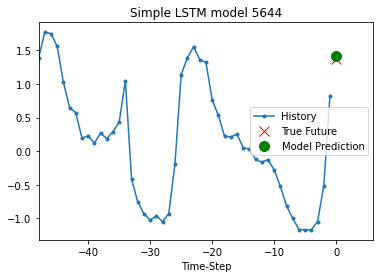

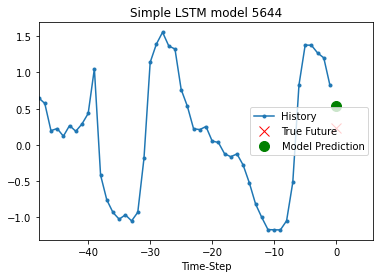

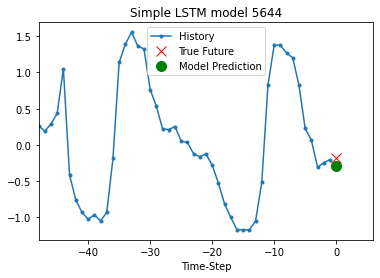

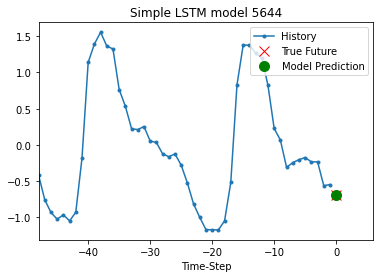

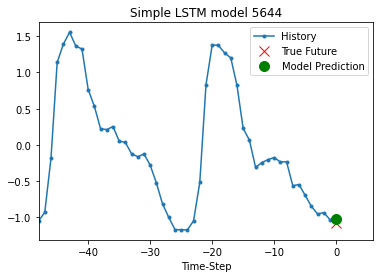

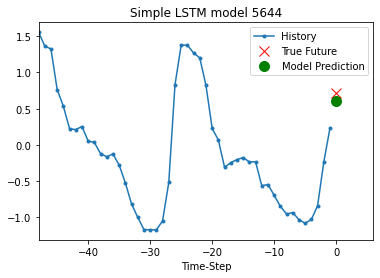

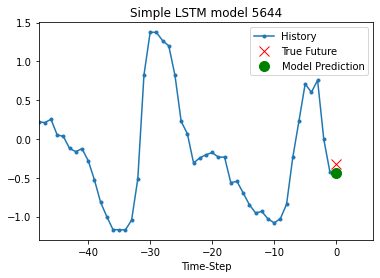

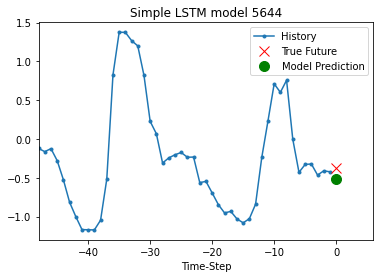

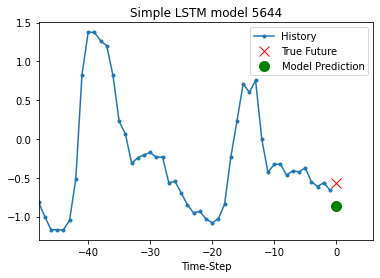

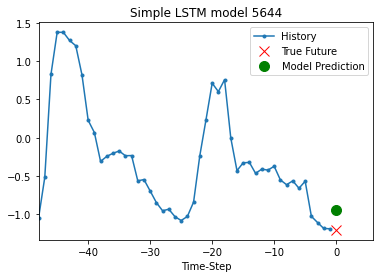

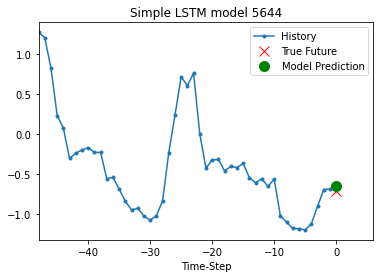

In [107]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[2][i*5], y_val_uni_cellId[2][i*5],
                    simple_lstm_model_5644.predict(x_val_uni_cellId[2])[i*5]], 0, 'Simple LSTM model 5644')
    plot.show()

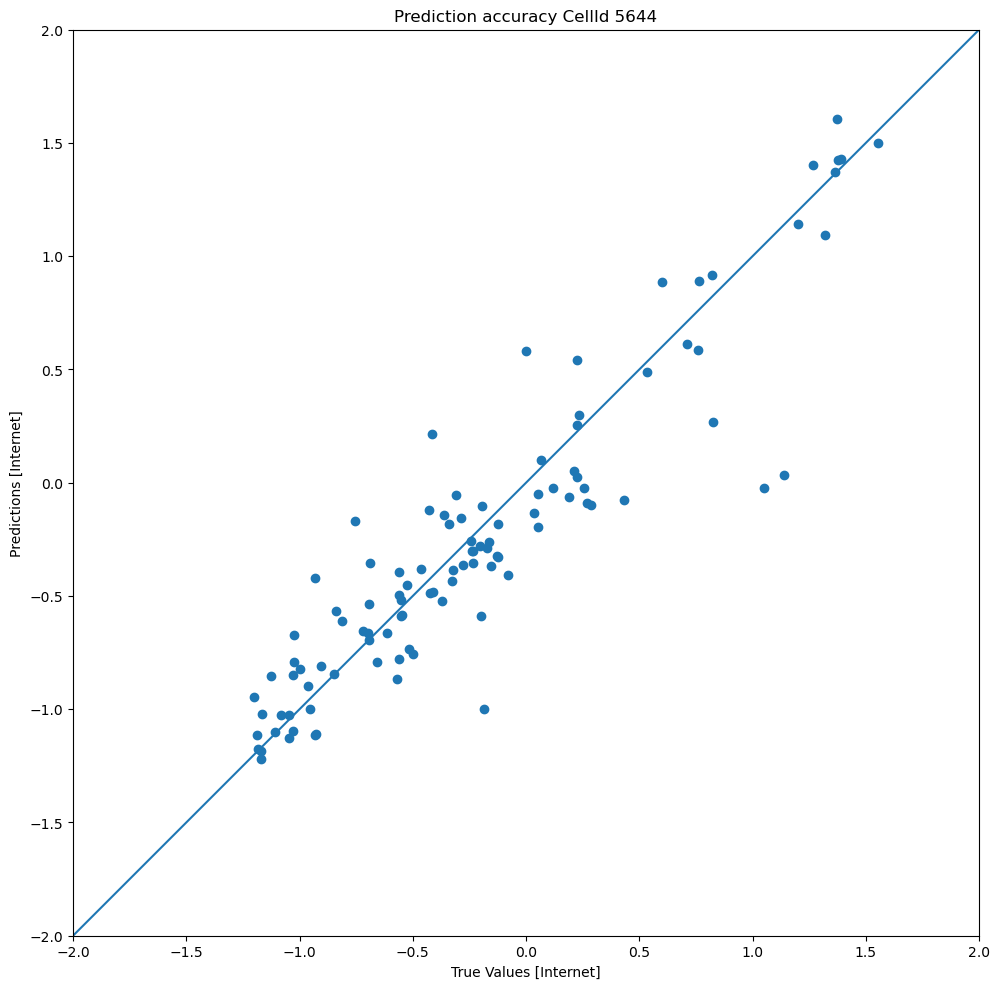

In [108]:
test_predictions_5644 = simple_lstm_model_5644.predict(x_val_uni_cellId[2]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[2], test_predictions_5644)
plt.title('Prediction accuracy CellId 5644')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

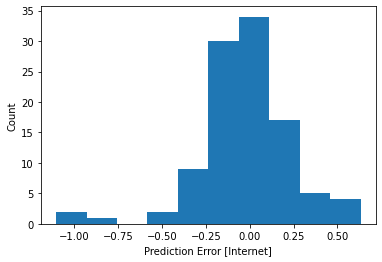

In [109]:
error = test_predictions_5644 - y_val_uni_cellId[2]
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [110]:
test_predictions_5644 = simple_lstm_model_5644.predict(x_val_uni_cellId[2])

mse_5644 = tf.keras.losses.MeanSquaredError()
mse_5644(y_val_uni_cellId[2], test_predictions_5644).numpy()

0.9532222

In [111]:
#RMSE
rmse_5644 = tf.keras.metrics.RootMeanSquaredError()
rmse_5644(y_val_uni_cellId[2], test_predictions_5644).numpy()

0.27349564

# Recurrent neural network con la CellId 6372

In [112]:
simple_lstm_model_6372 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[3].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_6372.summary()

simple_lstm_model_6372.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [113]:
history_6372 = simple_lstm_model_6372.fit(x_train_uni_cellId[3], y_train_uni_cellId[3], epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni_cellId[3], y_val_uni_cellId[3]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 72ms/step - loss: 0.3037 - accuracy: 0.0000e+00 - mae: 0.4888 - mse: 0.3037 - root_mean_squared_error: 0.4953 - val_loss: 0.2468 - val_accuracy: 0.0000e+00 - val_mae: 0.4382 - val_mse: 0.2468 - val_root_mean_squared_error: 0.4968
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.2478 - accuracy: 0.0000e+00 - mae: 0.4333 - mse: 0.2478 - root_mean_squared_error: 0.4978 - val_loss: 0.2047 - val_accuracy: 0.0000e+00 - val_mae: 0.3898 - val_mse: 0.2047 - val_root_mean_squared_error: 0.4524
Epoch 3/100
19/19 [==============================] - 1s 33ms/step - loss: 0.2254 - accuracy: 0.0000e+00 - mae: 0.4024 - mse: 0.2254 - root_mean_squared_error: 0.4748 - val_loss: 0.1857 - val_accuracy: 0.0000e+00 - val_mae: 0.3660 - val_mse: 0.1857 - val_root_mean_squared_error: 0.4309
Epoch 4/100
19/19 [==============================] - 1s 36ms/step - loss: 0.2067 - accuracy: 0.0000e+00 - mae: 0.3816 - mse: 0.2067 - root_mea

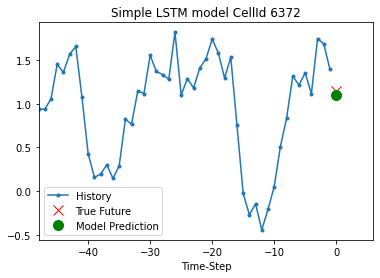

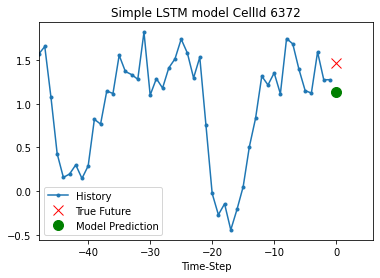

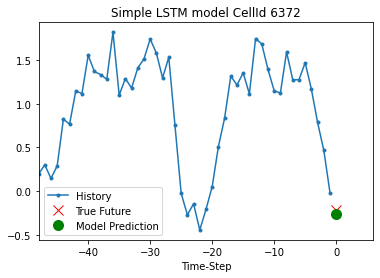

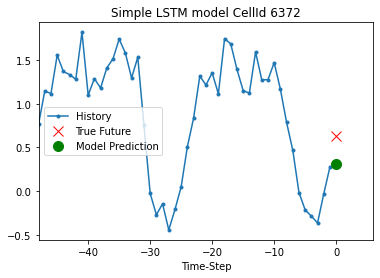

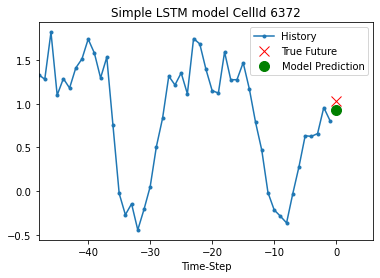

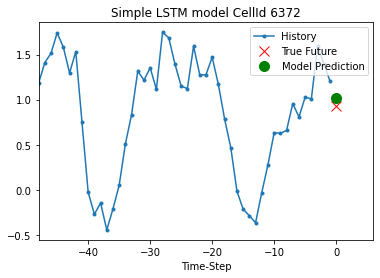

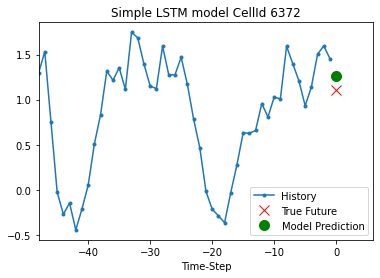

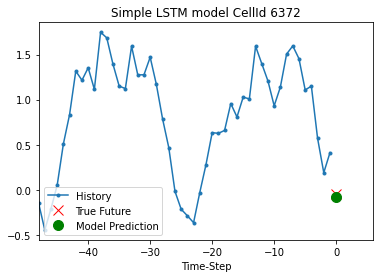

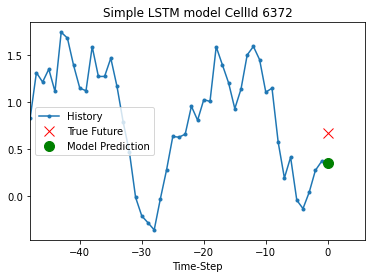

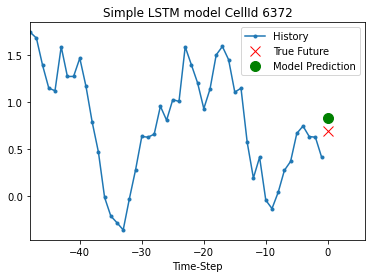

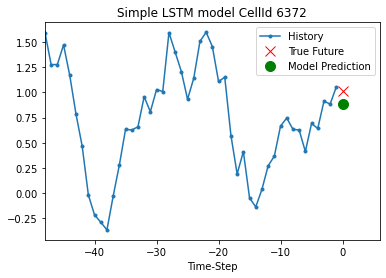

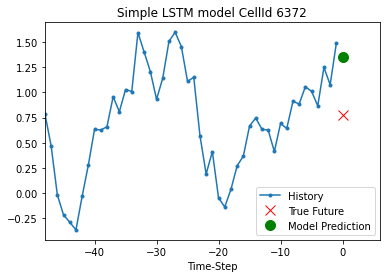

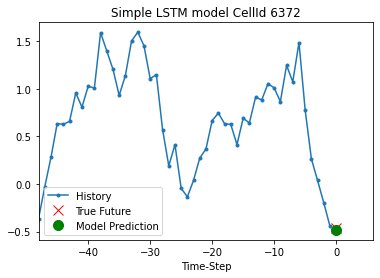

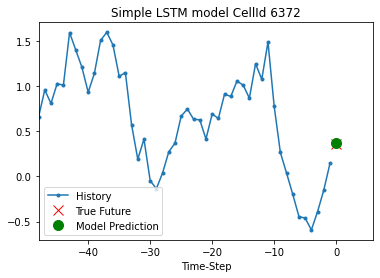

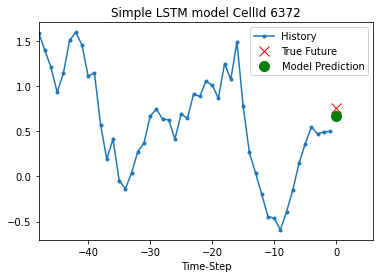

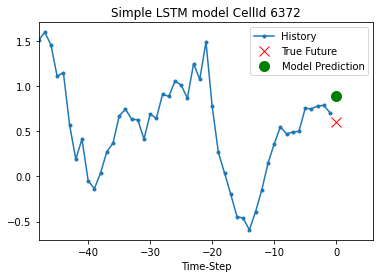

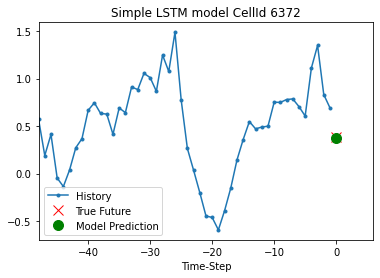

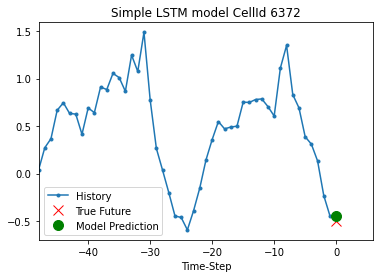

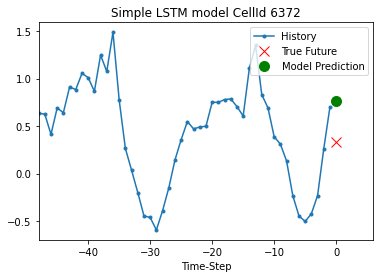

In [114]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[3][i*5], y_val_uni_cellId[3][i*5],
                    simple_lstm_model_6372.predict(x_val_uni_cellId[3])[i*5]], 0, 'Simple LSTM model CellId 6372')
    plot.show()

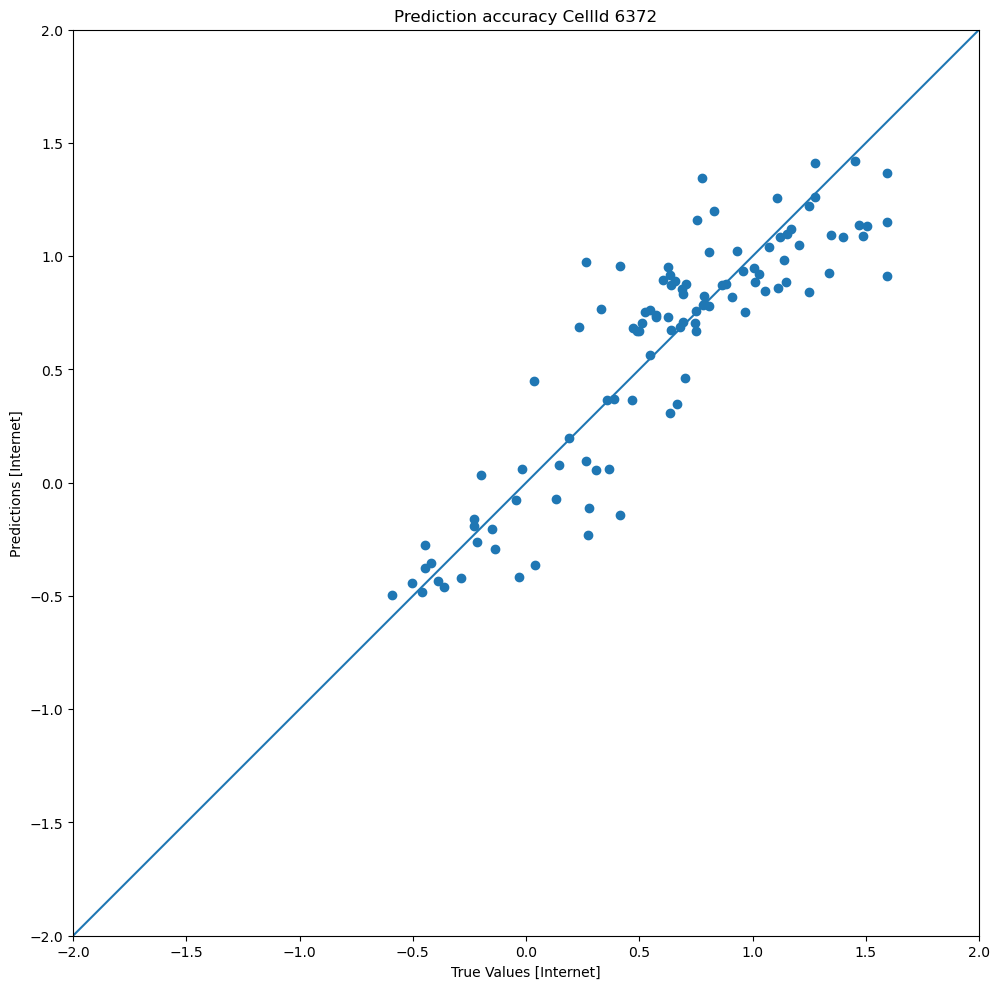

In [115]:
test_predictions_6372 = simple_lstm_model_6372.predict(x_val_uni_cellId[3]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[3], test_predictions_6372)
plt.title('Prediction accuracy CellId 6372')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

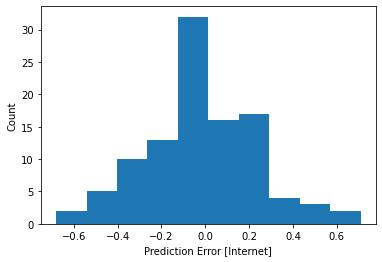

In [116]:
error = test_predictions_6372 - y_val_uni_cellId[3]
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [117]:
test_predictions_6372 = simple_lstm_model_6372.predict(x_val_uni_cellId[3])

mse_6372 = tf.keras.losses.MeanSquaredError()
mse_6372(y_val_uni_cellId[3], test_predictions_6372).numpy()

0.5816716

# Recurrent neural network con la CellId 6377

In [118]:
simple_lstm_model_6377 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[4].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_6377.summary()

simple_lstm_model_6377.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [119]:
history_6377 = simple_lstm_model_6377.fit(x_train_uni_cellId[4], y_train_uni_cellId[4], epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni_cellId[4], y_val_uni_cellId[4]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 65ms/step - loss: 1.3075 - accuracy: 0.0000e+00 - mae: 1.0612 - mse: 1.3075 - root_mean_squared_error: 0.9951 - val_loss: 1.1318 - val_accuracy: 0.0000e+00 - val_mae: 0.9978 - val_mse: 1.1318 - val_root_mean_squared_error: 1.0638
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.8960 - accuracy: 0.0000e+00 - mae: 0.8549 - mse: 0.8960 - root_mean_squared_error: 0.9466 - val_loss: 0.7498 - val_accuracy: 0.0000e+00 - val_mae: 0.7916 - val_mse: 0.7498 - val_root_mean_squared_error: 0.8659
Epoch 3/100
19/19 [==============================] - 1s 31ms/step - loss: 0.5484 - accuracy: 0.0000e+00 - mae: 0.6284 - mse: 0.5484 - root_mean_squared_error: 0.7406 - val_loss: 0.3581 - val_accuracy: 0.0000e+00 - val_mae: 0.4995 - val_mse: 0.3581 - val_root_mean_squared_error: 0.5984
Epoch 4/100
19/19 [==============================] - 1s 31ms/step - loss: 0.2240 - accuracy: 0.0000e+00 - mae: 0.3774 - mse: 0.2240 - root_mea

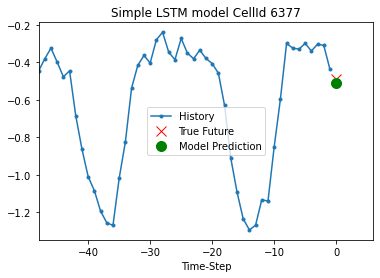

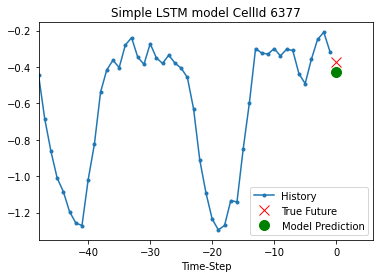

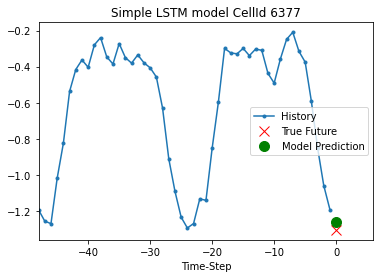

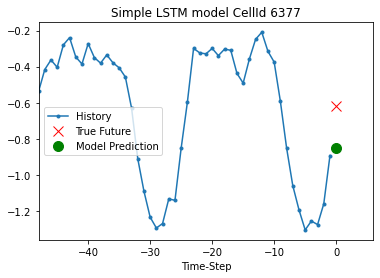

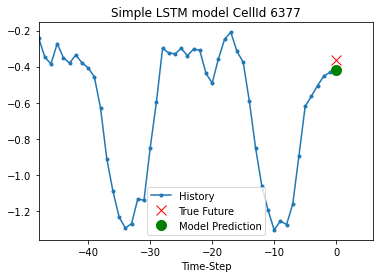

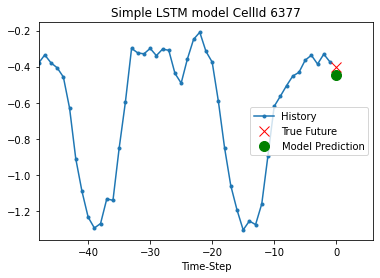

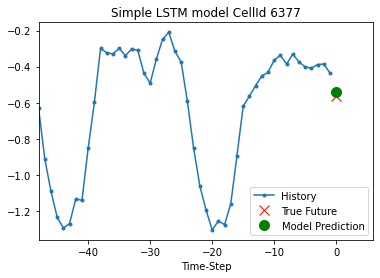

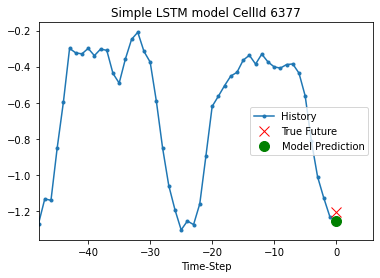

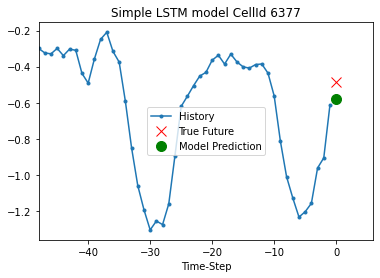

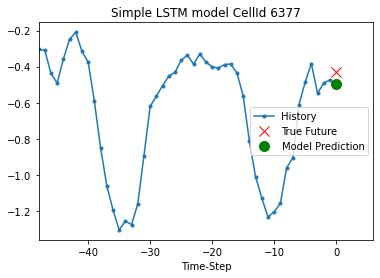

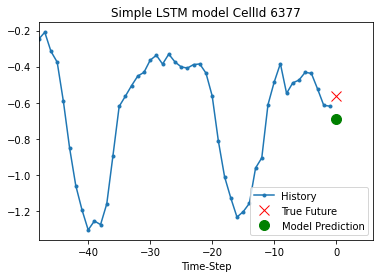

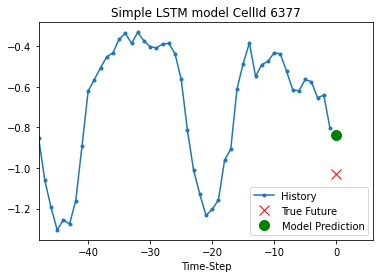

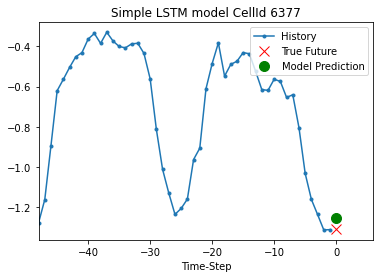

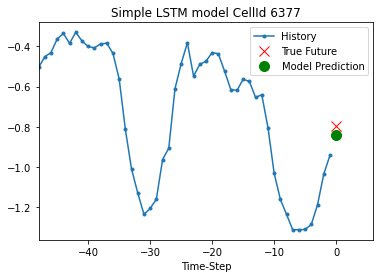

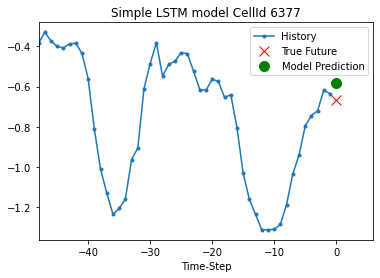

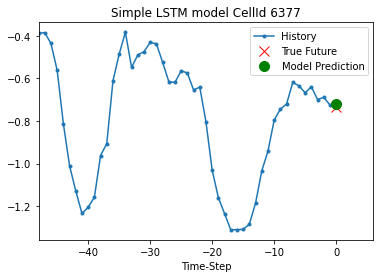

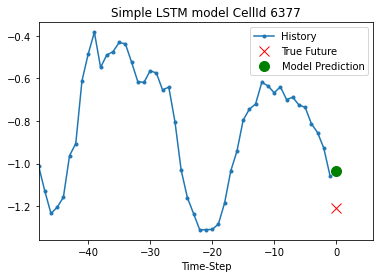

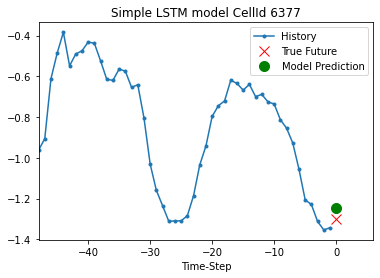

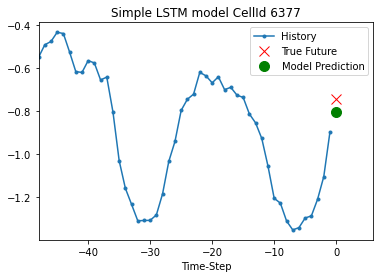

In [120]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[4][i*5], y_val_uni_cellId[4][i*5],
                    simple_lstm_model_6377.predict(x_val_uni_cellId[4])[i*5]], 0, 'Simple LSTM model CellId 6377')
    plot.show()

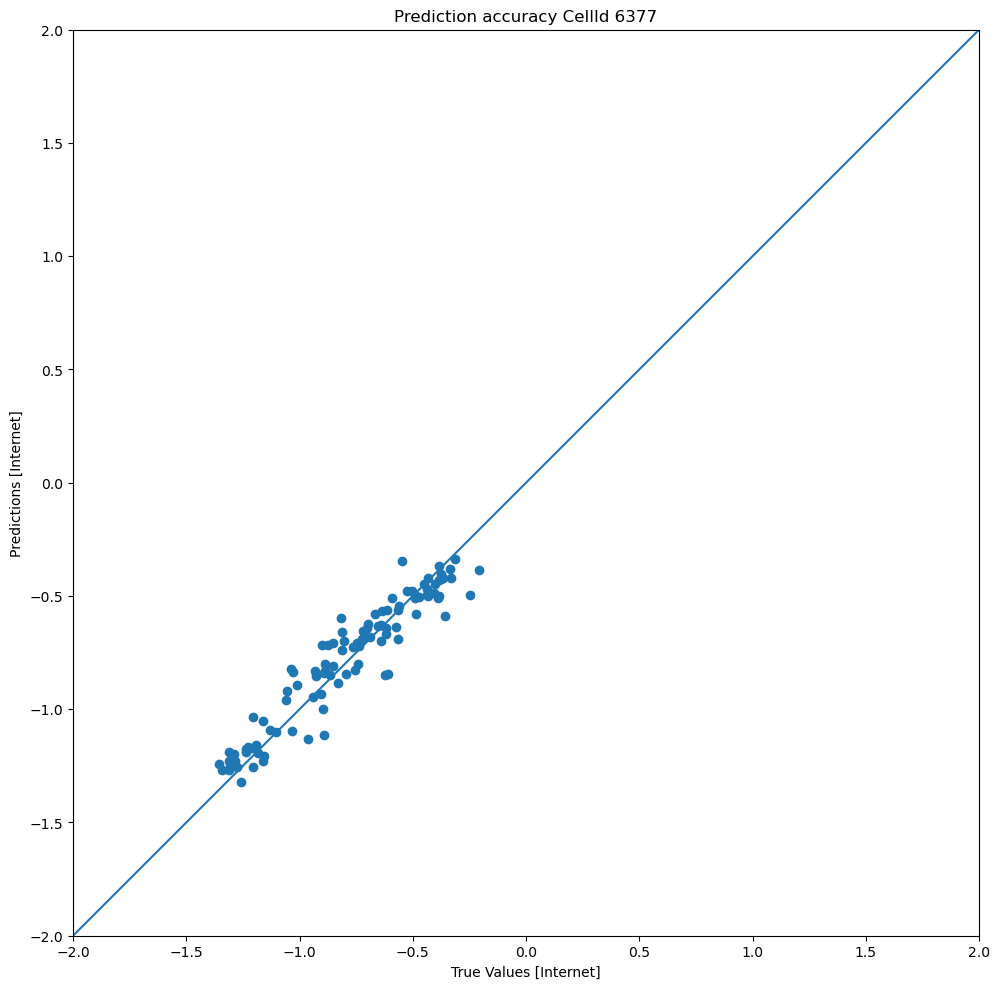

In [121]:
test_predictions_6377 = simple_lstm_model_6377.predict(x_val_uni_cellId[4]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[4], test_predictions_6377)
plt.title('Prediction accuracy CellId 6377')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

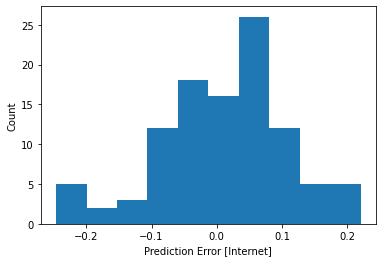

In [122]:
error = test_predictions_6377 - y_val_uni_cellId[4]
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [123]:
test_predictions_6377 = simple_lstm_model_6377.predict(x_val_uni_cellId[4])

mse_6377 = tf.keras.losses.MeanSquaredError()
mse_6377(y_val_uni_cellId[4], test_predictions_6377).numpy()

0.18312119

In [124]:
#RMSE
rmse_6377 = tf.keras.metrics.RootMeanSquaredError()
rmse_6377(y_val_uni_cellId[4], test_predictions_6377).numpy()

0.09805892

# Recurrent neural network con la CellId 6561

In [125]:
simple_lstm_model_6561 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni_cellId[5].shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_6561.summary()

simple_lstm_model_6561.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [126]:
history_6561 = simple_lstm_model_6561.fit(x_train_uni_cellId[5], y_train_uni_cellId[5], epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni_cellId[5], y_val_uni_cellId[5]), verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 77ms/step - loss: 0.3271 - accuracy: 0.0000e+00 - mae: 0.4428 - mse: 0.3271 - root_mean_squared_error: 0.4962 - val_loss: 0.2344 - val_accuracy: 0.0000e+00 - val_mae: 0.3968 - val_mse: 0.2344 - val_root_mean_squared_error: 0.4841
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.2147 - accuracy: 0.0000e+00 - mae: 0.3615 - mse: 0.2147 - root_mean_squared_error: 0.4634 - val_loss: 0.1524 - val_accuracy: 0.0000e+00 - val_mae: 0.3048 - val_mse: 0.1524 - val_root_mean_squared_error: 0.3904
Epoch 3/100
19/19 [==============================] - 1s 32ms/step - loss: 0.1696 - accuracy: 0.0000e+00 - mae: 0.3330 - mse: 0.1696 - root_mean_squared_error: 0.4119 - val_loss: 0.1230 - val_accuracy: 0.0000e+00 - val_mae: 0.2776 - val_mse: 0.1230 - val_root_mean_squared_error: 0.3507
Epoch 4/100
19/19 [==============================] - 1s 31ms/step - loss: 0.1544 - accuracy: 0.0000e+00 - mae: 0.3258 - mse: 0.1544 - root_mea

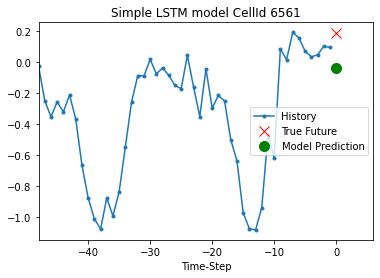

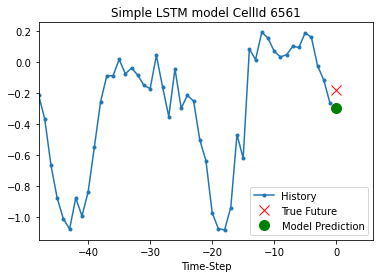

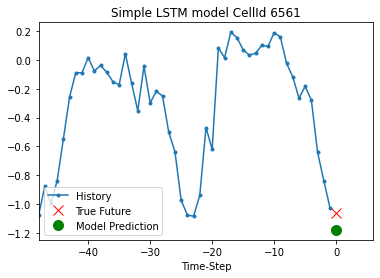

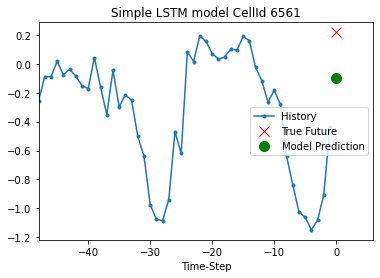

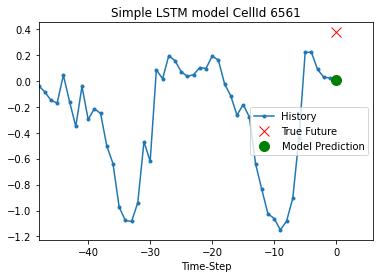

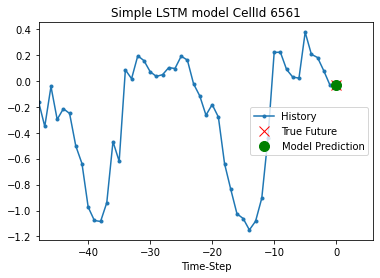

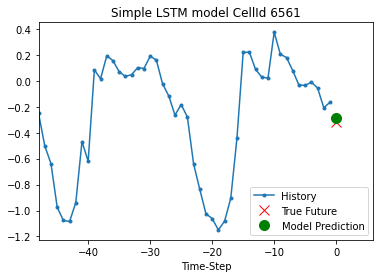

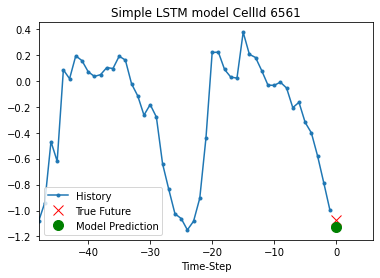

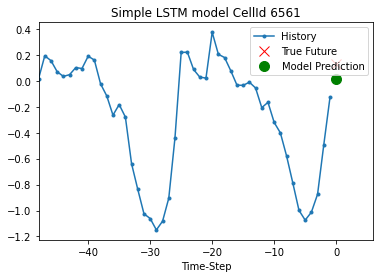

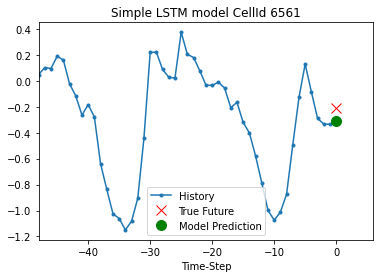

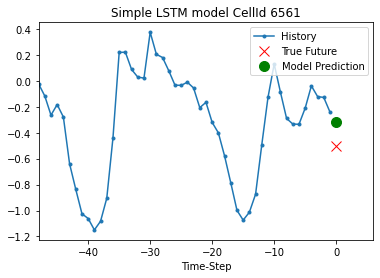

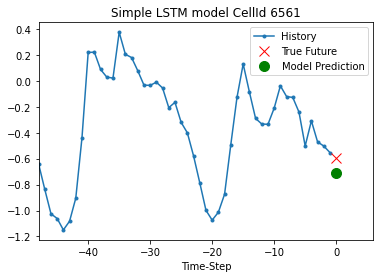

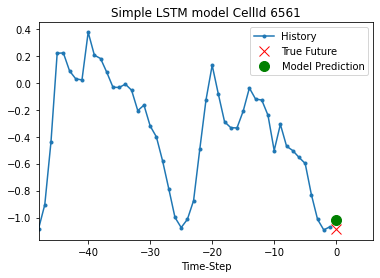

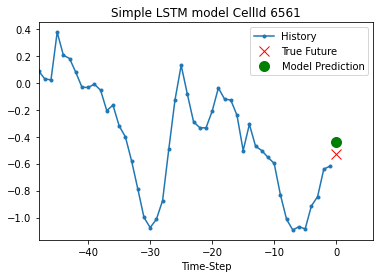

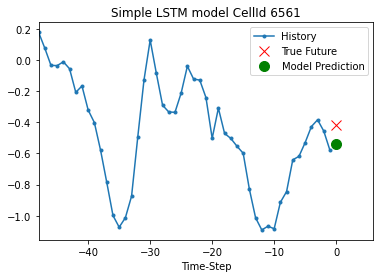

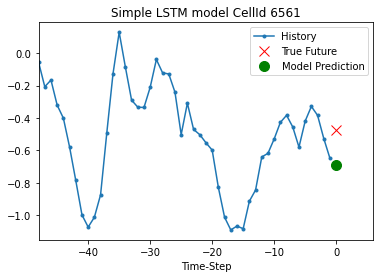

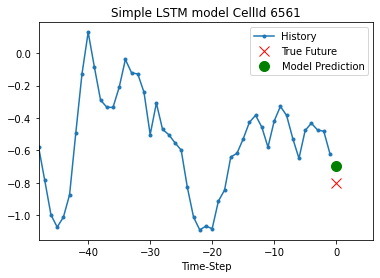

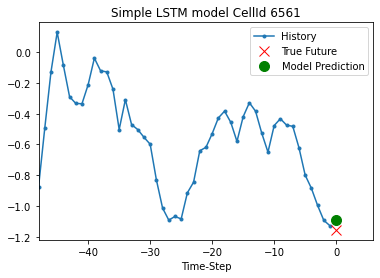

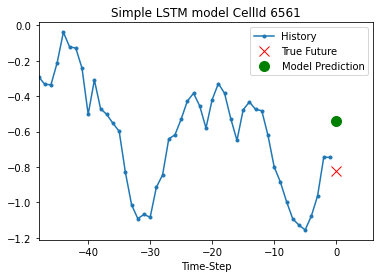

In [127]:
for i in range (0,19):
    plot = show_plot([x_val_uni_cellId[5][i*5], y_val_uni_cellId[5][i*5],
                    simple_lstm_model_6561.predict(x_val_uni_cellId[5])[i*5]], 0, 'Simple LSTM model CellId 6561')
    plot.show()

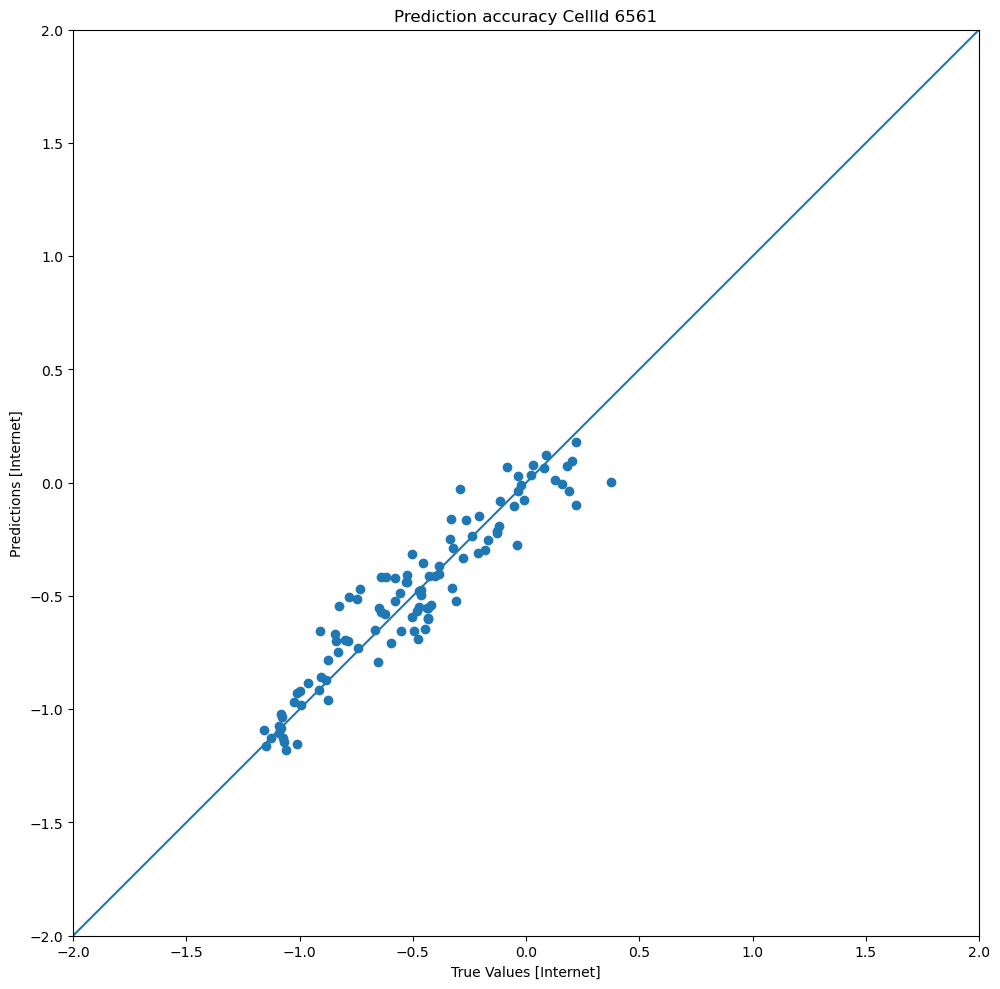

In [128]:
test_predictions_6561 = simple_lstm_model_6561.predict(x_val_uni_cellId[5]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[5], test_predictions_6561)
plt.title('Prediction accuracy CellId 6561')
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

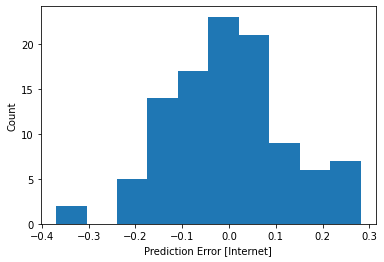

In [129]:
error = test_predictions_6561 - y_val_uni_cellId[5]
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

In [130]:
#Calculo de RMSE
#rmse = tf.keras.metrics.RootMeanSquareError()
#rmse.update_state

In [131]:
test_predictions_6561 = simple_lstm_model_6561.predict(x_val_uni_cellId[5])

mse_6561 = tf.keras.losses.MeanSquaredError()
mse_6561(y_val_uni_cellId[5], test_predictions_6561).numpy()

0.27776763

In [132]:
#RMSE
rmse_6561 = tf.keras.metrics.RootMeanSquaredError()
rmse_6561(y_val_uni_cellId[5], test_predictions_6561).numpy()

0.1274758

# Recurrent neural network con todas las CellId

In [133]:
BATCH_SIZE = 16
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

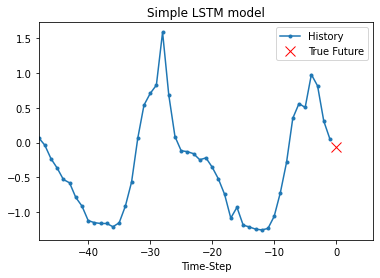

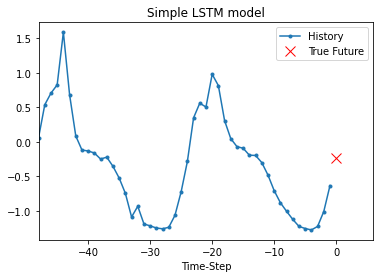

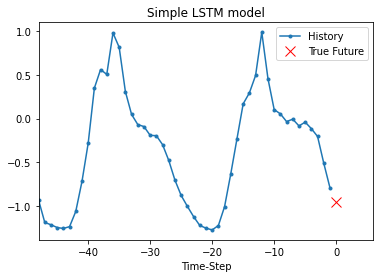

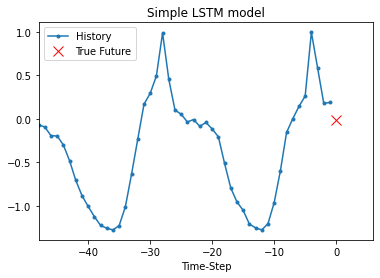

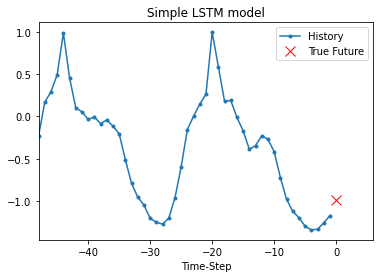

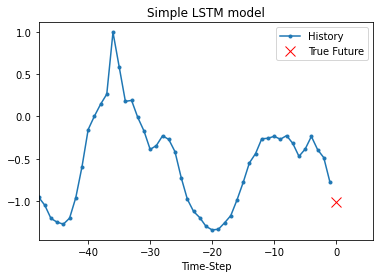

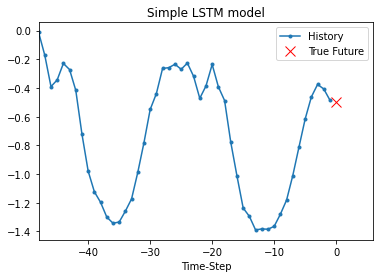

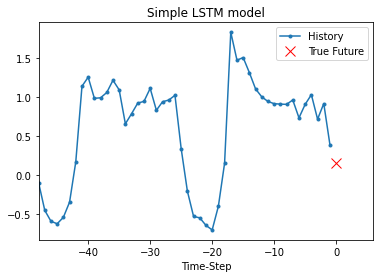

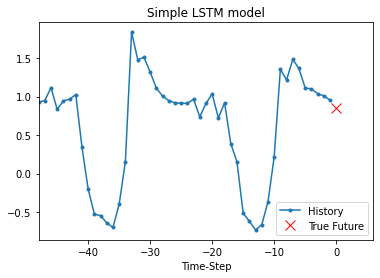

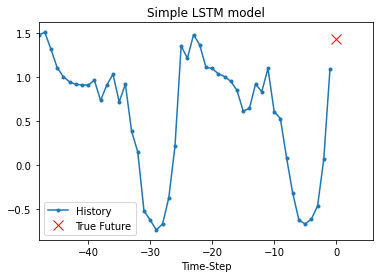

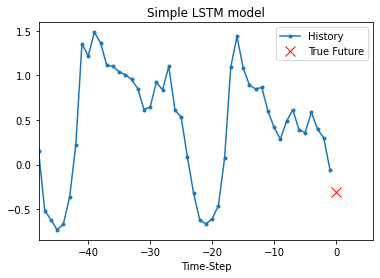

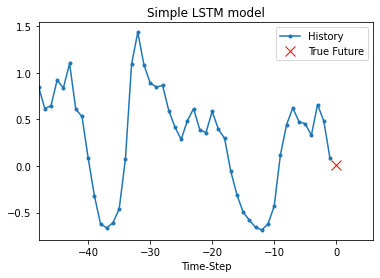

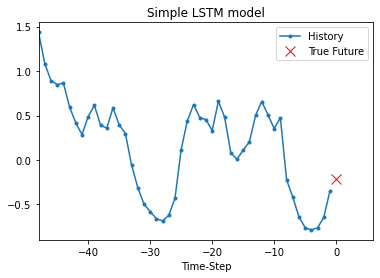

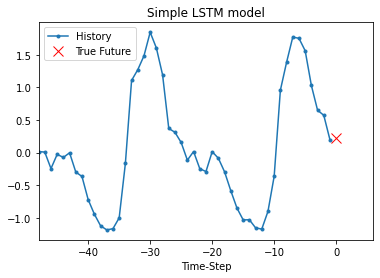

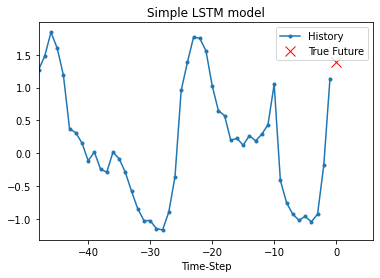

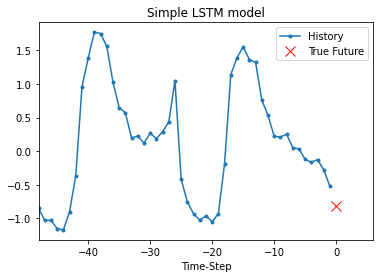

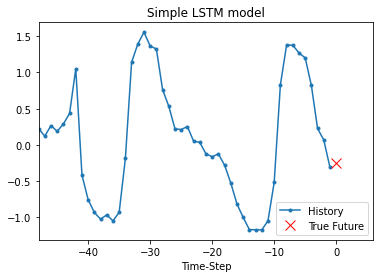

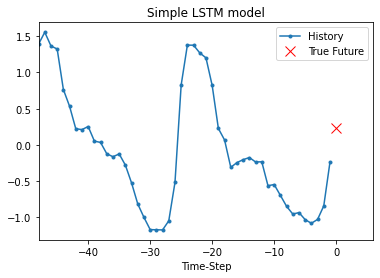

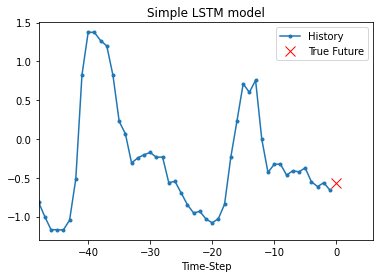

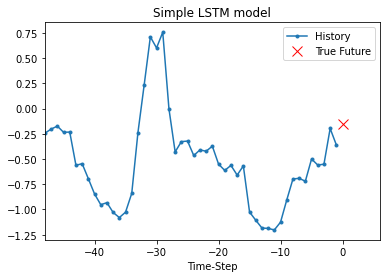

In [134]:
for x, y in val_univariate.take(20):
    plot = show_plot([x[0].numpy(), y[0].numpy()], 0, 'Simple LSTM model')
    plot.show()

In [135]:
#from keras.preprocessing.sequence import TimeseriesGenerator
#n_input = 72
#train_univariate = tf.keras.preprocessing.sequence.TimeseriesGenerator(uni_data, uni_data,start_index = 0, end_index = TRAIN_SPLIT,
#                               length = n_input, sampling_rate=1,
#                               batch_size=1)

#val_univariate = tf.keras.preprocessing.sequence.TimeseriesGenerator(uni_data, uni_data,start_index = TRAIN_SPLIT,
#                               length = n_input, sampling_rate=1,
#                               batch_size=1)

In [136]:
val_univariate

<RepeatDataset shapes: ((None, 48, 1), (None,)), types: (tf.float64, tf.float64)>

In [137]:
train_univariate

<RepeatDataset shapes: ((None, 48, 1), (None,)), types: (tf.float64, tf.float64)>

In [138]:
#model_lstm = Sequential()
#model_lstm.add(LSTM(8, input_shape=x_train_uni.shape[-2:]))
#model_lstm.add(Dense(1))
#model_lstm.summary()

#model_lstm.compile(optimizyoer='adam', loss='mae')

simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.summary()

simple_lstm_model.compile(optimizer=VAL_OPTIMIZER, loss=VAL_LOSS,metrics=VAL_METRICS)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [139]:
val_univariate

<RepeatDataset shapes: ((None, 48, 1), (None,)), types: (tf.float64, tf.float64)>

In [140]:
for x, y in val_univariate.take(20):
    print(simple_lstm_model.predict(x).shape)

(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)


In [141]:
EVALUATION_INTERVAL = 1
EPOCHS = 100

history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.5826 - accuracy: 0.0000e+00 - mae: 0.6751 - mse: 0.5826 - root_mean_squared_error: 0.3029 - val_loss: 0.6389 - val_accuracy: 0.0000e+00 - val_mae: 0.6860 - val_mse: 0.6389 - val_root_mean_squared_error: 0.7993
Epoch 2/100
1/1 [==============================] - 0s 372ms/step - loss: 1.0967 - accuracy: 0.0000e+00 - mae: 0.8941 - mse: 1.0967 - root_mean_squared_error: 1.0472 - val_loss: 0.6299 - val_accuracy: 0.0000e+00 - val_mae: 0.6807 - val_mse: 0.6299 - val_root_mean_squared_error: 0.7937
Epoch 3/100
1/1 [==============================] - 0s 370ms/step - loss: 0.4637 - accuracy: 0.0000e+00 - mae: 0.5828 - mse: 0.4637 - root_mean_squared_error: 0.6809 - val_loss: 0.6220 - val_accuracy: 0.0000e+00 - val_mae: 0.6760 - val_mse: 0.6220 - val_root_mean_squared_error: 0.7886
Epoch 4/100
1/1 [==============================] - 0s 371ms/step - loss: 0.6036 - accuracy: 0.0000e+00 - mae: 0.6313 - mse: 0.6036 - root_mean_squar

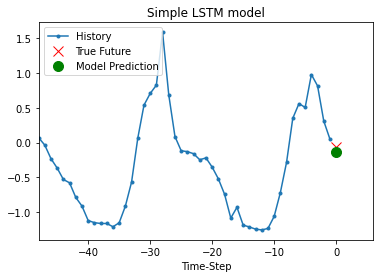

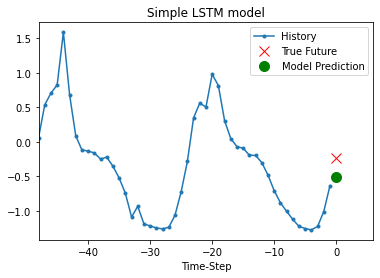

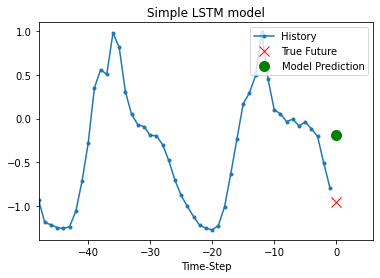

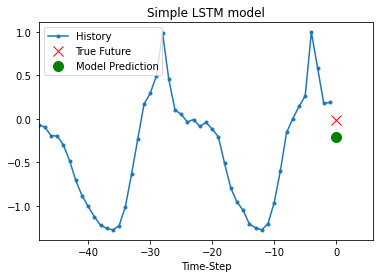

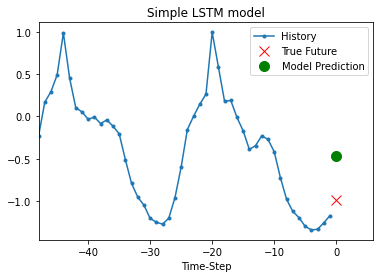

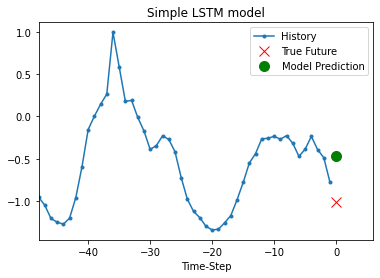

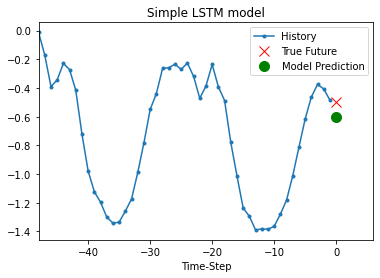

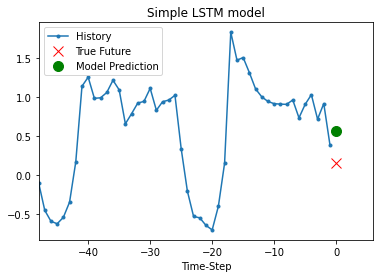

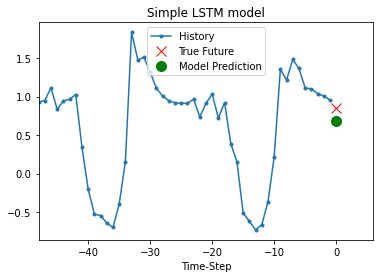

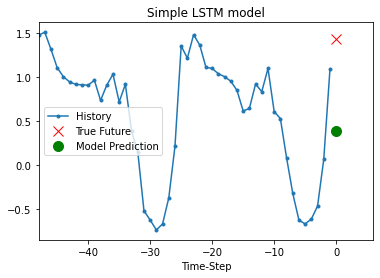

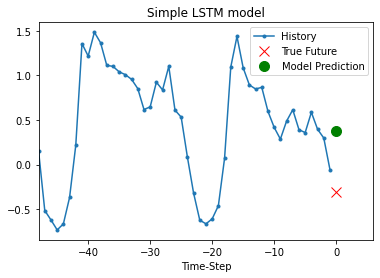

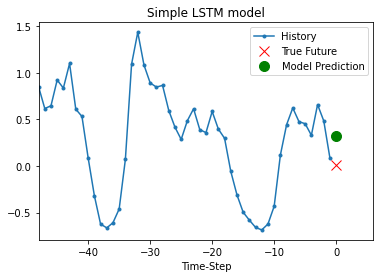

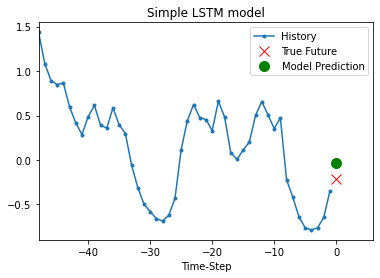

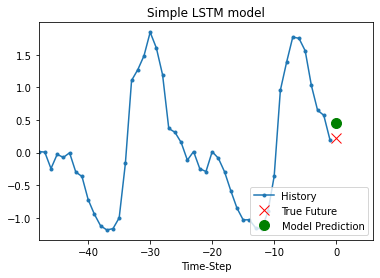

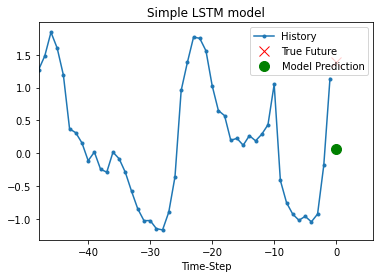

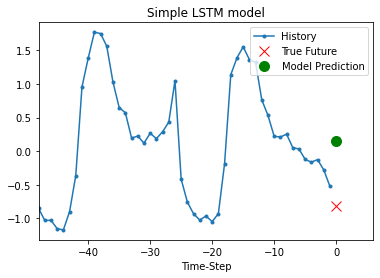

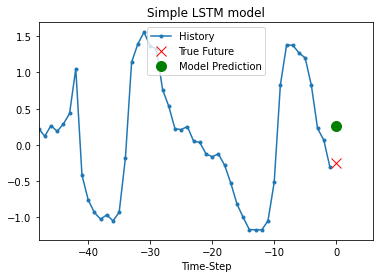

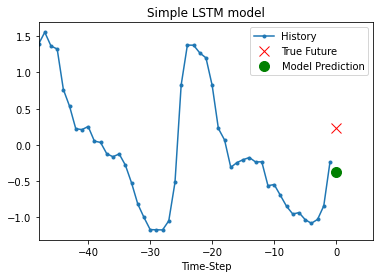

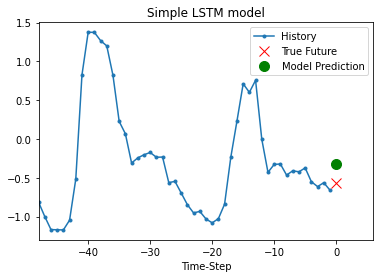

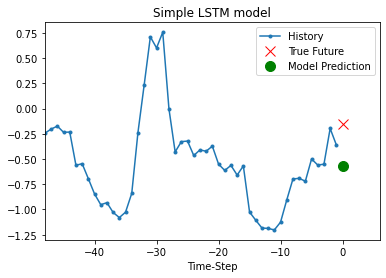

In [142]:
for x, y in val_univariate.take(20):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

In [143]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'mae', 'mse', 'root_mean_squared_error', 'val_loss', 'val_accuracy', 'val_mae', 'val_mse', 'val_root_mean_squared_error'])


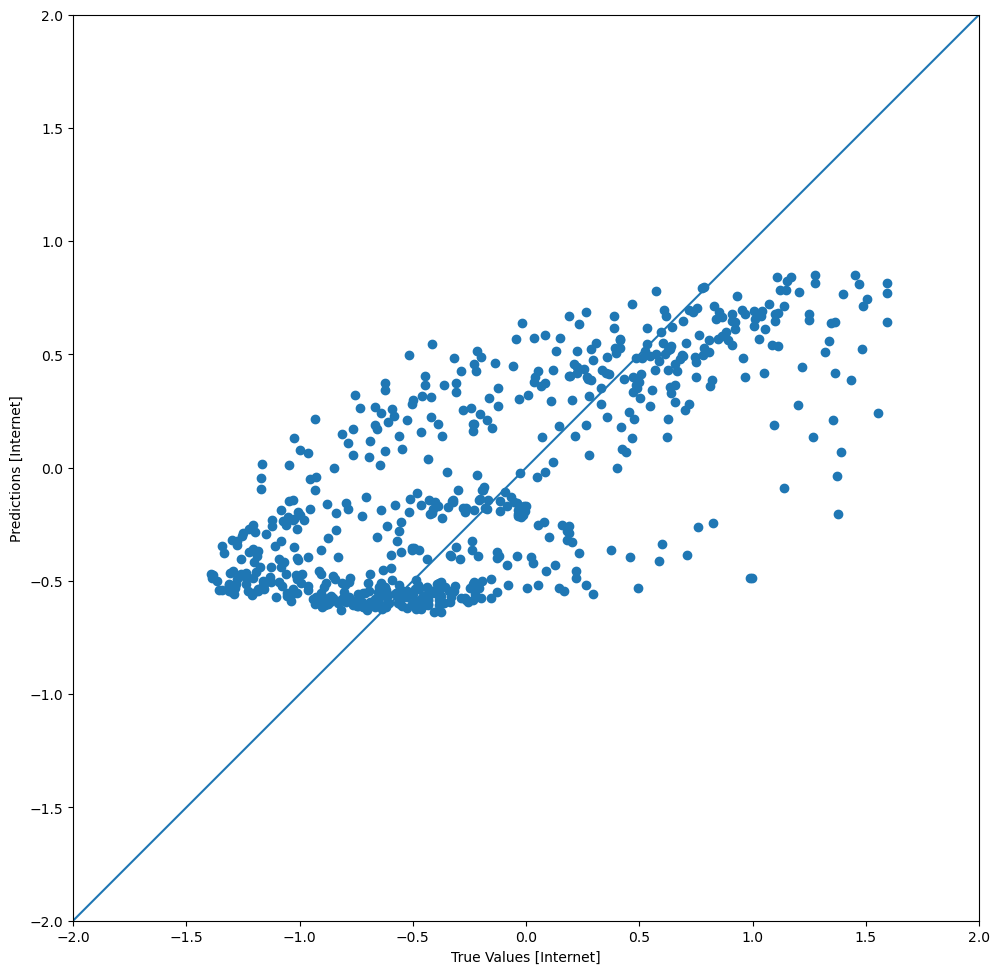

In [144]:
test_predictions = simple_lstm_model.predict(x_val_uni).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni, test_predictions)
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

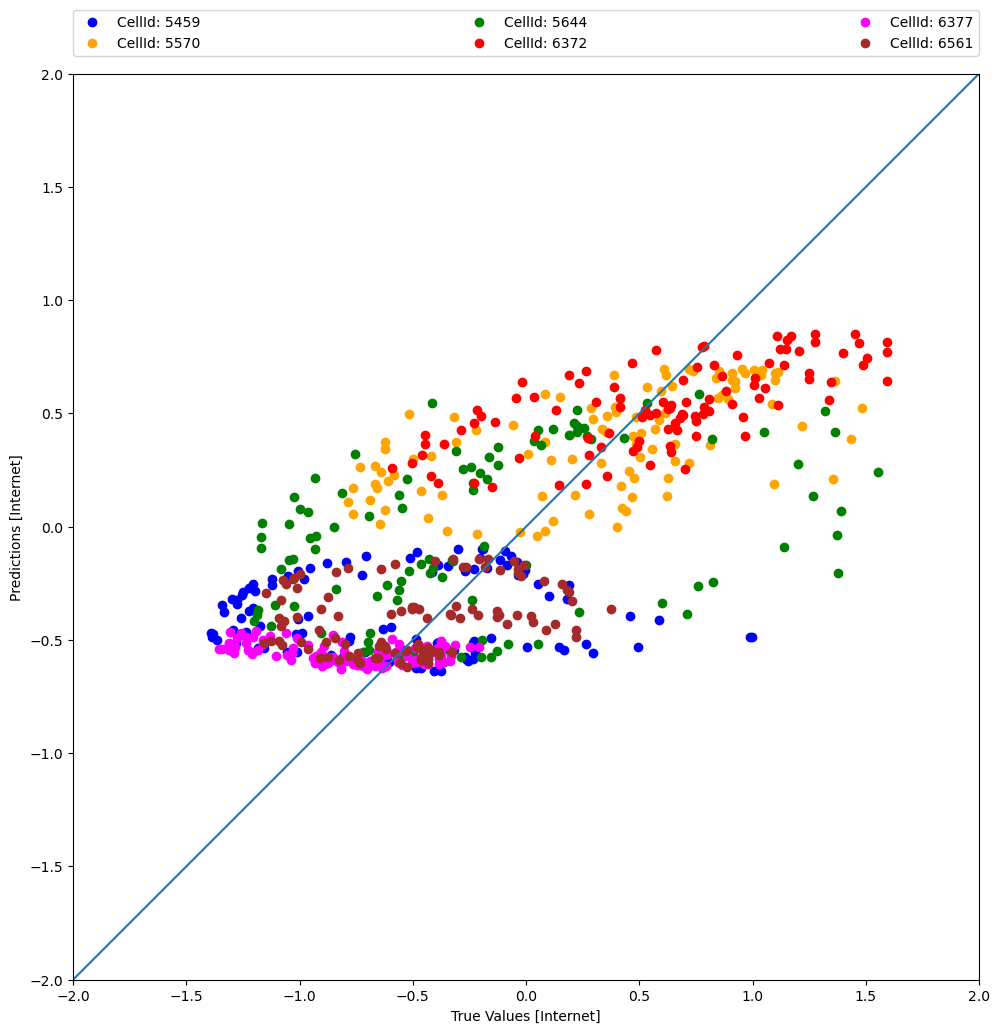

In [145]:
#x_train_uni_cellId.append(x_train_uni_frame)
#y_train_uni_cellId.append(y_train_uni_frame)
#x_val_uni_cellId.append(x_val_uni_frame)
#y_val_uni_cellId.append(y_val_uni_frame)

test_predictions_5459 = simple_lstm_model.predict(x_val_uni_cellId[0]).flatten()
test_predictions_5570 = simple_lstm_model.predict(x_val_uni_cellId[1]).flatten()
test_predictions_5644 = simple_lstm_model.predict(x_val_uni_cellId[2]).flatten()
test_predictions_6372 = simple_lstm_model.predict(x_val_uni_cellId[3]).flatten()
test_predictions_6377 = simple_lstm_model.predict(x_val_uni_cellId[4]).flatten()
test_predictions_6561 = simple_lstm_model.predict(x_val_uni_cellId[5]).flatten()
#5459	5570	5644	6372	6377	6561

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[0], test_predictions_5459, color = 'blue', label = "CellId: 5459")
plt.scatter(y_val_uni_cellId[1], test_predictions_5570, color = 'orange', label = "CellId: 5570")
plt.scatter(y_val_uni_cellId[2], test_predictions_5644, color = 'green', label = "CellId: 5644")
plt.scatter(y_val_uni_cellId[3], test_predictions_6372, color = 'red', label = "CellId: 6372")
plt.scatter(y_val_uni_cellId[4], test_predictions_6377, color = 'magenta', label = "CellId: 6377")
plt.scatter(y_val_uni_cellId[5], test_predictions_6561, color = 'brown', label = "CellId: 6561")
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

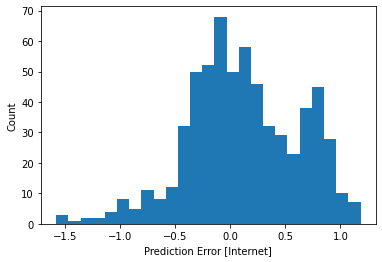

In [146]:
error = test_predictions - y_val_uni
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

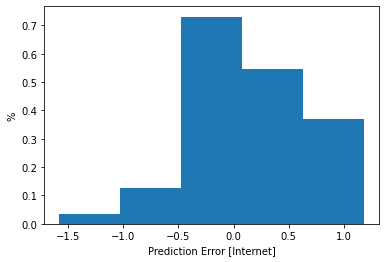

In [147]:
error = test_predictions - y_val_uni
# example data
mu = 0  # mean of distribution
sigma = 0.5  # standard deviation of distribution
bins = 5
plt.hist(error, bins = bins, density=True)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("%")

In [148]:
simple_lstm_model_acc = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model_acc.summary()

simple_lstm_model_acc.compile(optimizer='adam', loss='mae',metrics=['accuracy', 'mae', 'mse'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 8)                 320       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [149]:
history_acc = simple_lstm_model_acc.fit(x_train_uni, y_train_uni, epochs=EPOCHS,
                      batch_size=16,
                      validation_data=(x_val_uni, y_val_uni), verbose=1)

Epoch 1/100
114/114 [==============================] - 4s 34ms/step - loss: 0.6813 - accuracy: 0.0000e+00 - mae: 0.6813 - mse: 0.9258 - val_loss: 0.4337 - val_accuracy: 0.0000e+00 - val_mae: 0.4337 - val_mse: 0.2973
Epoch 2/100
114/114 [==============================] - 3s 28ms/step - loss: 0.5162 - accuracy: 0.0000e+00 - mae: 0.5162 - mse: 0.5655 - val_loss: 0.3584 - val_accuracy: 0.0000e+00 - val_mae: 0.3584 - val_mse: 0.2085
Epoch 3/100
114/114 [==============================] - 3s 29ms/step - loss: 0.4271 - accuracy: 0.0000e+00 - mae: 0.4271 - mse: 0.4020 - val_loss: 0.2838 - val_accuracy: 0.0000e+00 - val_mae: 0.2838 - val_mse: 0.1330
Epoch 4/100
114/114 [==============================] - 3s 29ms/step - loss: 0.3328 - accuracy: 0.0000e+00 - mae: 0.3328 - mse: 0.2770 - val_loss: 0.2200 - val_accuracy: 0.0000e+00 - val_mae: 0.2200 - val_mse: 0.0947
Epoch 5/100
114/114 [==============================] - 3s 28ms/step - loss: 0.2675 - accuracy: 0.0000e+00 - mae: 0.2675 - mse: 0.1997 - 

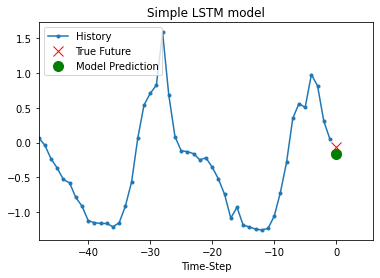

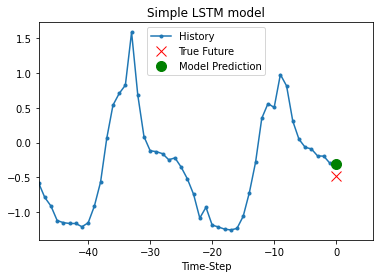

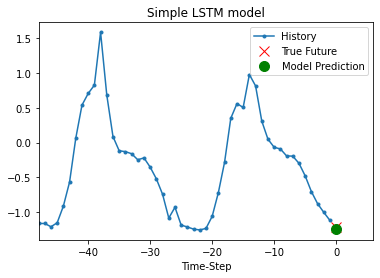

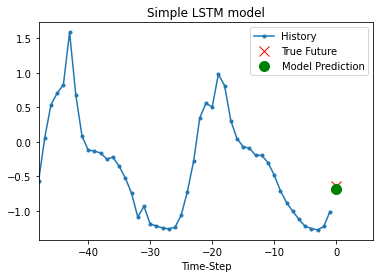

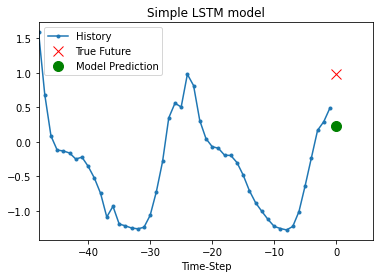

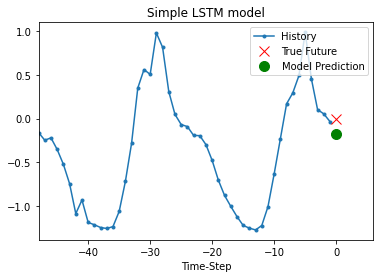

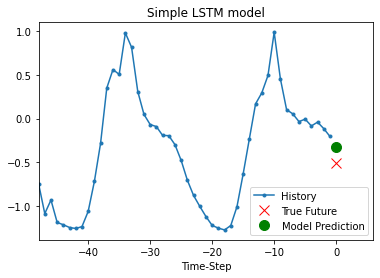

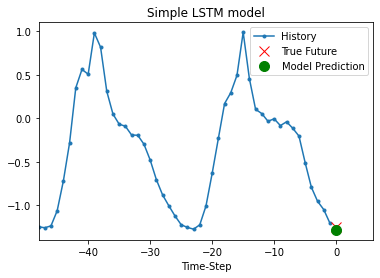

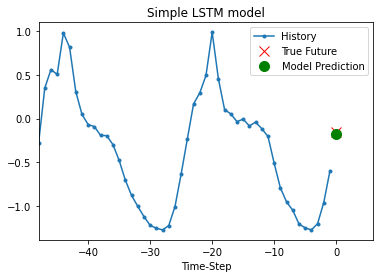

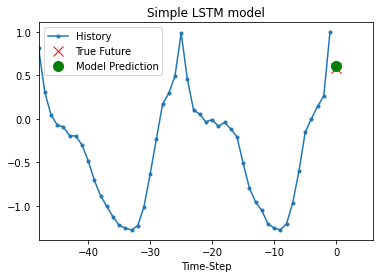

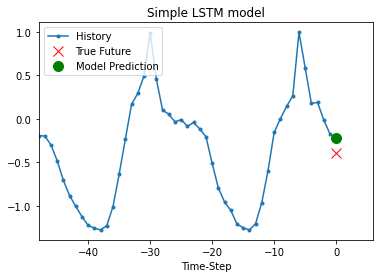

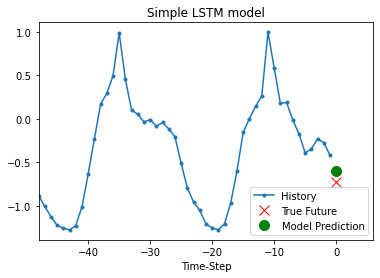

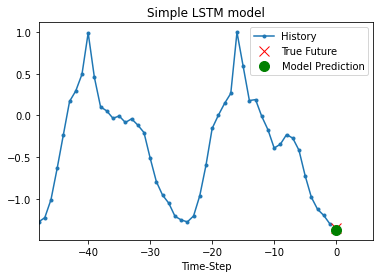

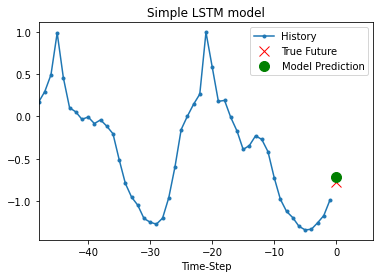

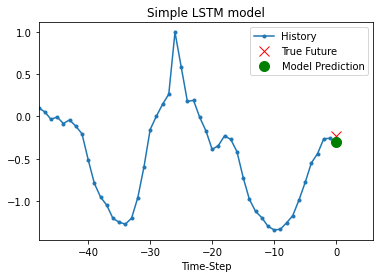

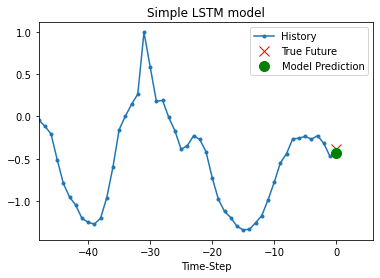

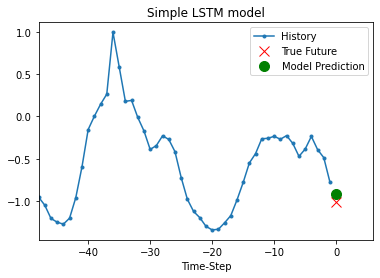

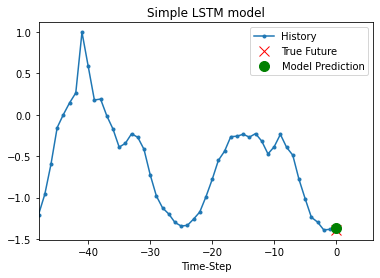

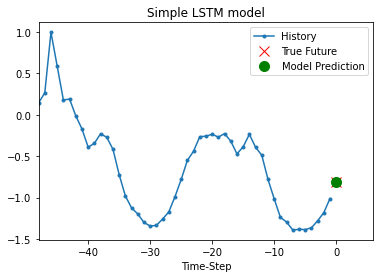

In [150]:
for i in range (0,19):
    plot = show_plot([x_val_uni[i*5], y_val_uni[i*5],
                    simple_lstm_model_acc.predict(x_val_uni)[i*5]], 0, 'Simple LSTM model')
    plot.show()

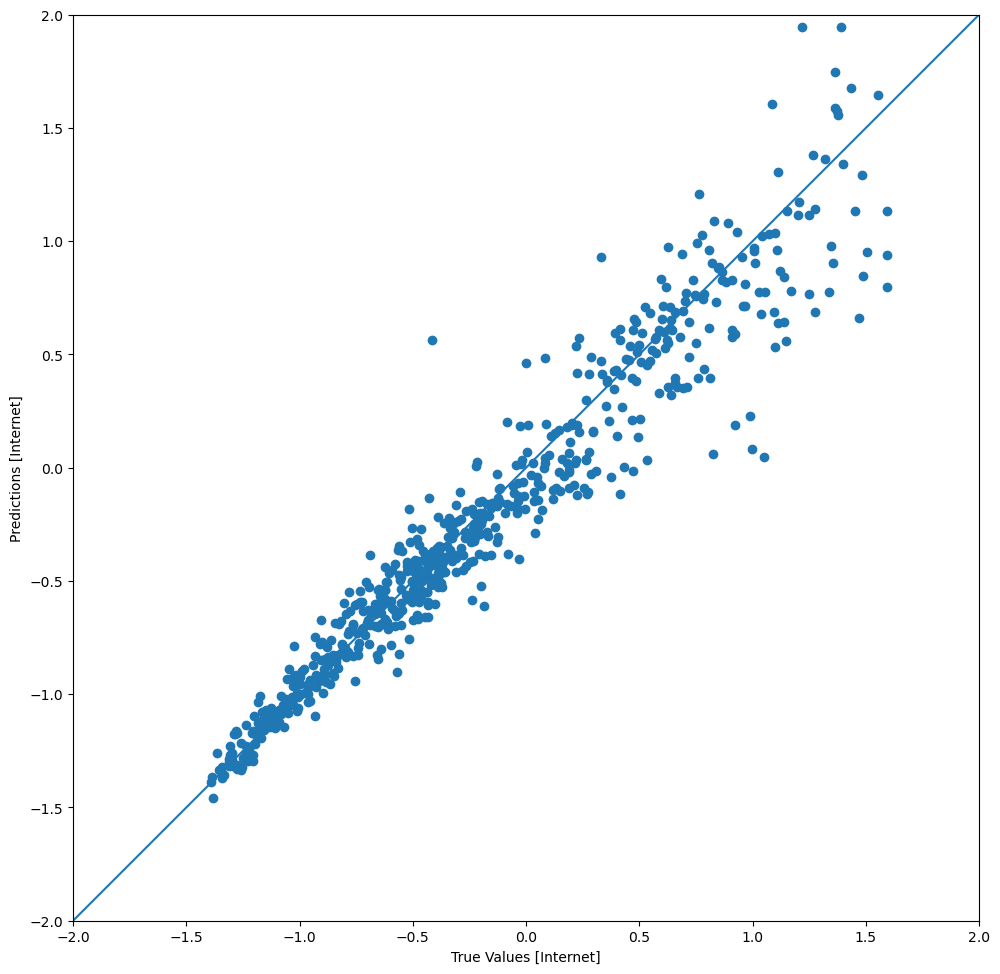

In [151]:
test_predictions_acc = simple_lstm_model_acc.predict(x_val_uni).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni, test_predictions_acc)
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

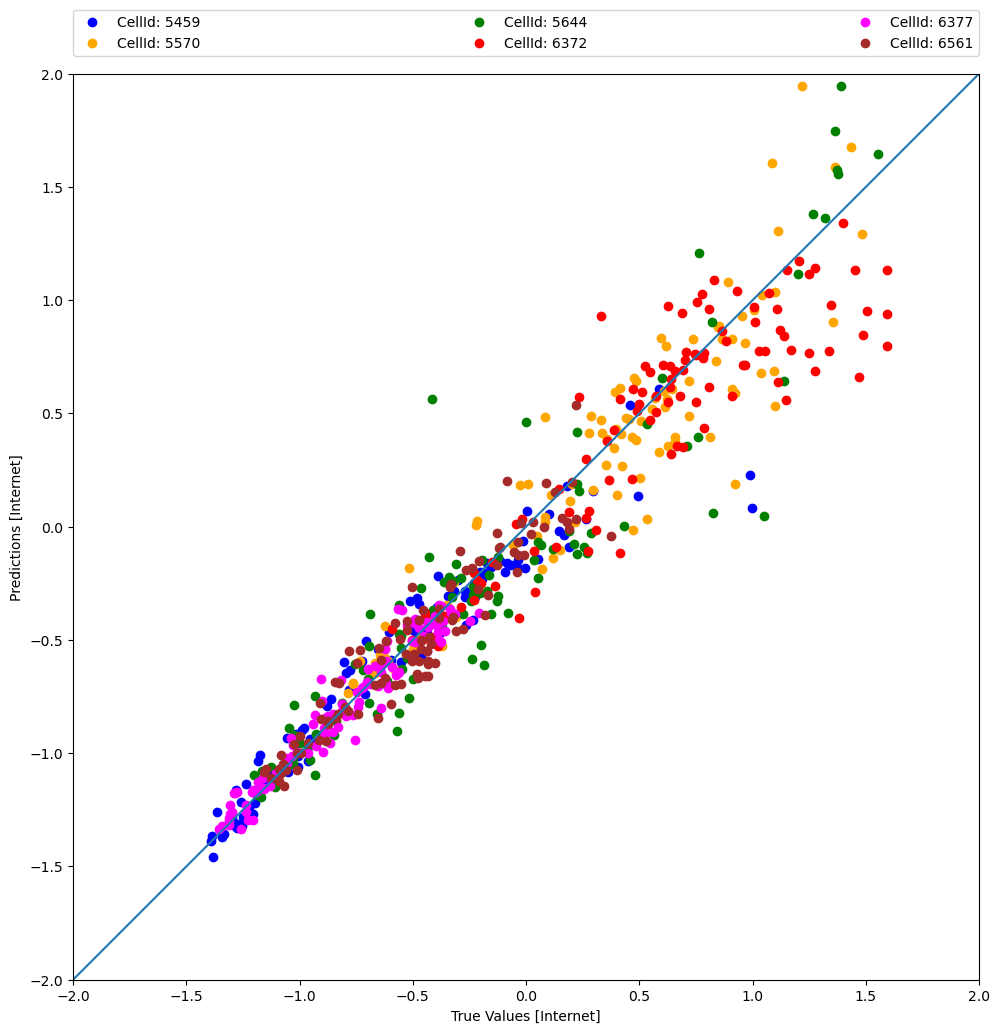

In [152]:
test_predictions_acc_5459 = simple_lstm_model_acc.predict(x_val_uni_cellId[0]).flatten()
test_predictions_acc_5570 = simple_lstm_model_acc.predict(x_val_uni_cellId[1]).flatten()
test_predictions_acc_5644 = simple_lstm_model_acc.predict(x_val_uni_cellId[2]).flatten()
test_predictions_acc_6372 = simple_lstm_model_acc.predict(x_val_uni_cellId[3]).flatten()
test_predictions_acc_6377 = simple_lstm_model_acc.predict(x_val_uni_cellId[4]).flatten()
test_predictions_acc_6561 = simple_lstm_model_acc.predict(x_val_uni_cellId[5]).flatten()

plt.figure(figsize=(16, 12), dpi=100) 
a = plt.axes(aspect='equal')
plt.scatter(y_val_uni_cellId[0], test_predictions_acc_5459, color = 'blue', label = "CellId: 5459")
plt.scatter(y_val_uni_cellId[1], test_predictions_acc_5570, color = 'orange', label = "CellId: 5570")
plt.scatter(y_val_uni_cellId[2], test_predictions_acc_5644, color = 'green', label = "CellId: 5644")
plt.scatter(y_val_uni_cellId[3], test_predictions_acc_6372, color = 'red', label = "CellId: 6372")
plt.scatter(y_val_uni_cellId[4], test_predictions_acc_6377, color = 'magenta', label = "CellId: 6377")
plt.scatter(y_val_uni_cellId[5], test_predictions_acc_6561, color = 'brown', label = "CellId: 6561")
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
xlims = [-2, 2]
ylims = [-2, 2]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)

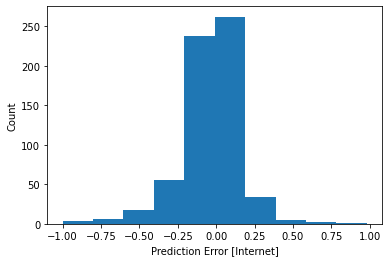

In [153]:
error = test_predictions_acc_5459 - y_val_uni_cellId[0]
error = np.concatenate((error, test_predictions_acc_5570 - y_val_uni_cellId[1]))
error = np.concatenate((error, test_predictions_acc_5644 - y_val_uni_cellId[2]))
error = np.concatenate((error, test_predictions_acc_6372 - y_val_uni_cellId[3]))
error = np.concatenate((error, test_predictions_acc_6377 - y_val_uni_cellId[4]))
error = np.concatenate((error, test_predictions_acc_6561 - y_val_uni_cellId[5]))
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

# Part 2: Forecast a multivariate time series

In [154]:
features_considered = ['CellID', 'weekday', 'hour', 'temperature', 'internet', 'relativeHumidity']

In [155]:
features_considered_teleco = ['callin', 'internet', 'callout', 'smsin', 'smsout']

In [156]:
features = dataMeteoCellId[features_considered]
features.index = dataMeteoCellId['hour'] + dataMeteoCellId['weekday'] * 24 + (dataMeteoCellId['week'] - 48) * 24 * 7
features.head()

CellID  weekday  hour  temperature     internet  relativeHumidity
0    5459        0     0         11.0  1103.538826                79
0    5570        0     0         10.7  1766.063070                81
0    5644        0     0          9.3  1018.186800                88
0    6372        0     0          9.2  2469.557143                90
0    6377        0     0          8.7   686.937374                 0

In [157]:
features

CellID  weekday  hour  temperature     internet  relativeHumidity
0      5459        0     0         11.0  1103.538826                79
0      5570        0     0         10.7  1766.063070                81
0      5644        0     0          9.3  1018.186800                88
0      6372        0     0          9.2  2469.557143                90
0      6377        0     0          8.7   686.937374                 0
..      ...      ...   ...          ...          ...               ...
503    5570        6    23          3.8  2125.875899               100
503    5644        6    23          2.4  1193.756255                95
503    6372        6    23          2.8  2166.180717                93
503    6377        6    23          2.8   825.238721                 0
503    6561        6    23          3.2  1097.646388                98

[3024 rows x 6 columns]

In [158]:
features_tempe = ['temperature', 'internet']
features_time_internet = dataMeteoCellId[features_tempe]
features_time_internet.index = dataMeteoCellId['hour'] + dataMeteoCellId['weekday'] * 24 + (dataMeteoCellId['week'] - 48) * 24 * 7

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

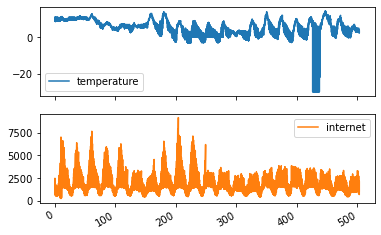

In [159]:
features_time_internet.plot(subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

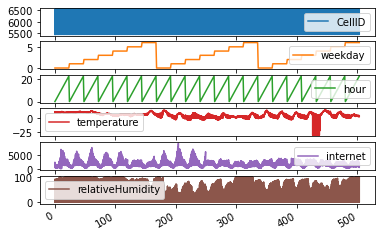

In [160]:
features.plot(subplots=True)

In [161]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [162]:
dataset = (dataset-data_mean)/data_std

In [163]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
              labels.append(target[i+target_size])
        else:
              labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [164]:
past_history = 48
future_target = 6
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [165]:
y_train_single

array([-1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05227358,
       -1.05227358, -1.05227358, -1.05227358, -1.05227358, -1.05

In [166]:
x_train_single

array([[[-1.19818321, -1.05227358, -1.49262033,  1.40650157,
         -0.79357367,  0.01330226],
        [-0.94981371, -1.05227358, -1.49262033,  0.93899585,
         -0.22167702,  0.07005856],
        [-0.78423405, -1.05227358, -1.49262033, -1.24269748,
         -0.86725027,  0.26870561],
        ...,
        [ 0.84471182, -1.05227358, -0.47720992, -1.24269748,
          0.01637375,  0.32546191],
        [ 0.85589963, -1.05227358, -0.47720992, -2.17770891,
         -0.59281141, -2.22857159],
        [ 1.26761123, -1.05227358, -0.47720992, -1.08686224,
         -0.63570025,  0.55248711]],

       [[-0.94981371, -1.05227358, -1.49262033,  0.93899585,
         -0.22167702,  0.07005856],
        [-0.78423405, -1.05227358, -1.49262033, -1.24269748,
         -0.86725027,  0.26870561],
        [ 0.84471182, -1.05227358, -1.49262033, -1.39853272,
          0.38558513,  0.32546191],
        ...,
        [ 0.85589963, -1.05227358, -0.47720992, -2.17770891,
         -0.59281141, -2.22857159],
  

In [167]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (48, 6)


In [168]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [169]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae', metrics=['mae', 'mse'])

In [191]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(16, 1)


In [192]:
single_step_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [171]:
single_step_history = single_step_model.fit(train_data_single, epochs=50,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7329 - mae: 0.7329 - mse: 0.8132 - val_loss: 3.5371 - val_mae: 3.5371 - val_mse: 16.6525
Epoch 2/50
1/1 [==============================] - 0s 405ms/step - loss: 0.5265 - mae: 0.5265 - mse: 0.4602 - val_loss: 3.5051 - val_mae: 3.5051 - val_mse: 16.3717
Epoch 3/50
1/1 [==============================] - 0s 395ms/step - loss: 0.4828 - mae: 0.4828 - mse: 0.4615 - val_loss: 3.4828 - val_mae: 3.4828 - val_mse: 16.2663
Epoch 4/50
1/1 [==============================] - 0s 398ms/step - loss: 0.5079 - mae: 0.5079 - mse: 0.4822 - val_loss: 3.4740 - val_mae: 3.4740 - val_mse: 16.1956
Epoch 5/50
1/1 [==============================] - 0s 401ms/step - loss: 0.6418 - mae: 0.6418 - mse: 0.5278 - val_loss: 3.4203 - val_mae: 3.4203 - val_mse: 15.7219
Epoch 6/50
1/1 [==============================] - 0s 434ms/step - loss: 0.5316 - mae: 0.5316 - mse: 0.4116 - val_loss: 3.3690 - val_mae: 3.3690 - val_mse: 15.2968
Epoch 7/50
1/1 [=========

In [172]:
def plot_train_history_mse(history, title):
    mse = history.history['mse']
    val_mse = history.history['val_mse']

    epochs = range(len(mse))

    plt.figure()

    plt.plot(epochs, mse, 'b', label='Training loss')
    plt.plot(epochs, val_mse, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')

    plt.show()

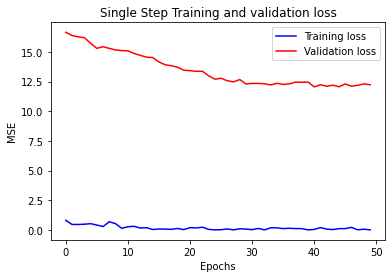

In [173]:
plot_train_history_mse(single_step_history,
                   'Single Step Training and validation loss')

In [174]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()

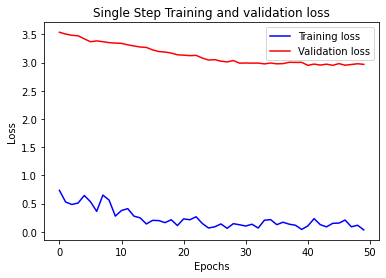

In [175]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

# Predict a single step future

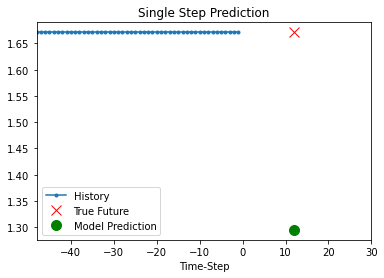

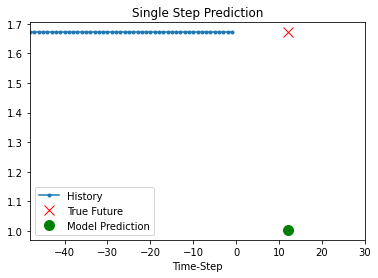

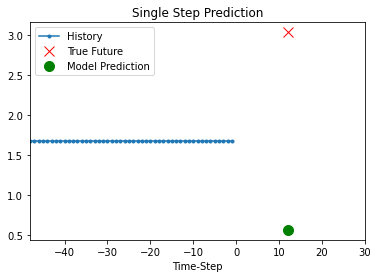

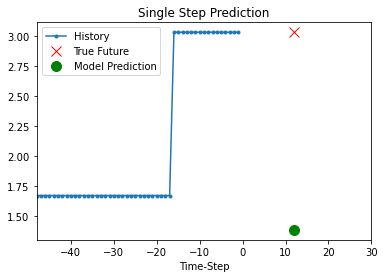

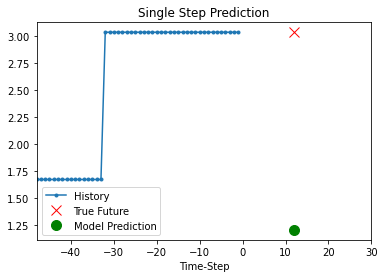

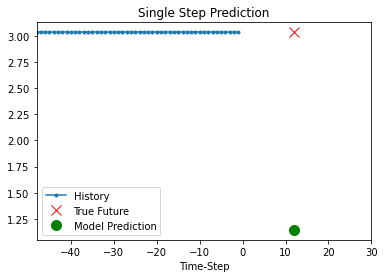

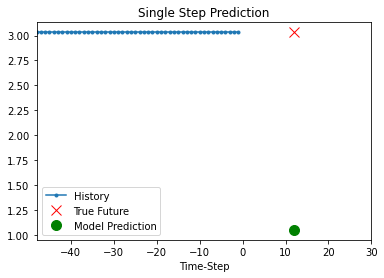

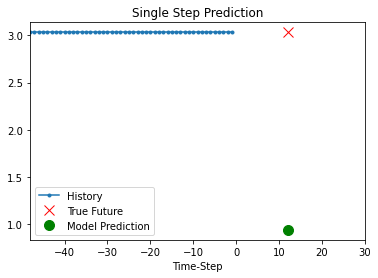

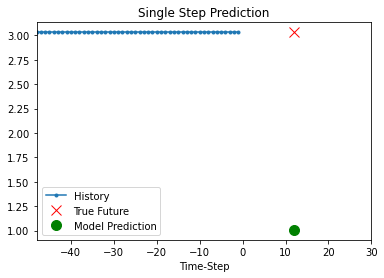

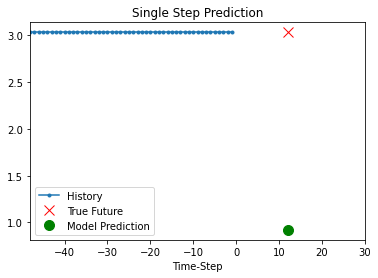

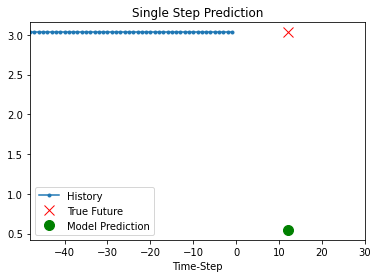

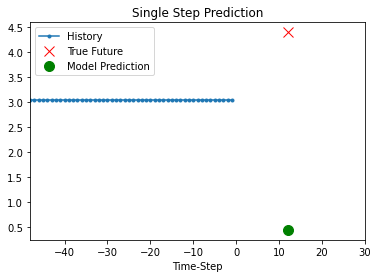

In [176]:
for x, y in val_data_single.take(12):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()

# Multi-Step model

In [177]:
future_target = 6
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [178]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target Internet CDR to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (48, 6)

 Target Internet CDR to predict : (6,)


In [179]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [180]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

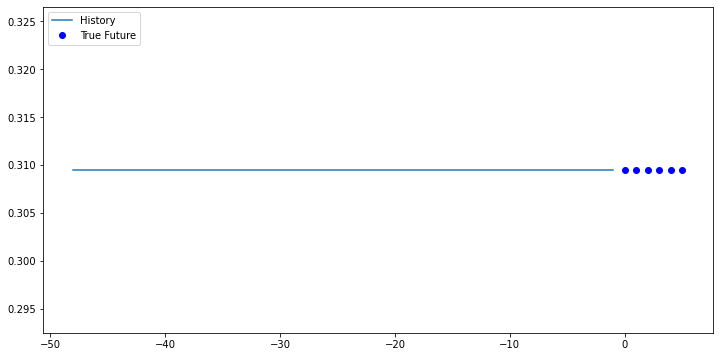

In [181]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [182]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True, input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(6))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae', metrics=['mae', 'mse'])

In [183]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

(16, 6)


In [184]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9678 - mae: 0.9678 - mse: 1.2176 - val_loss: 3.9019 - val_mae: 3.9019 - val_mse: 20.4428
Epoch 2/100
1/1 [==============================] - 1s 760ms/step - loss: 0.7563 - mae: 0.7563 - mse: 0.8528 - val_loss: 3.8985 - val_mae: 3.8985 - val_mse: 20.3841
Epoch 3/100
1/1 [==============================] - 1s 759ms/step - loss: 0.8170 - mae: 0.8170 - mse: 0.9557 - val_loss: 3.8933 - val_mae: 3.8933 - val_mse: 20.3247
Epoch 4/100
1/1 [==============================] - 1s 867ms/step - loss: 0.8690 - mae: 0.8690 - mse: 1.0385 - val_loss: 3.8857 - val_mae: 3.8857 - val_mse: 20.2416
Epoch 5/100
1/1 [==============================] - 1s 747ms/step - loss: 0.8195 - mae: 0.8195 - mse: 1.0308 - val_loss: 3.8800 - val_mae: 3.8800 - val_mse: 20.1605
Epoch 6/100
1/1 [==============================] - 1s 743ms/step - loss: 0.7160 - mae: 0.7160 - mse: 0.7954 - val_loss: 3.8757 - val_mae: 3.8757 - val_mse: 20.1033
Epoch 7/100
1/1 [==

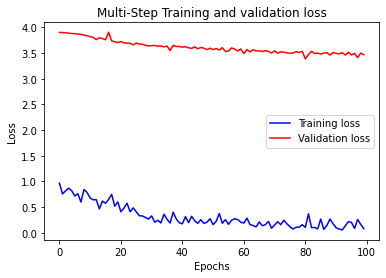

In [185]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

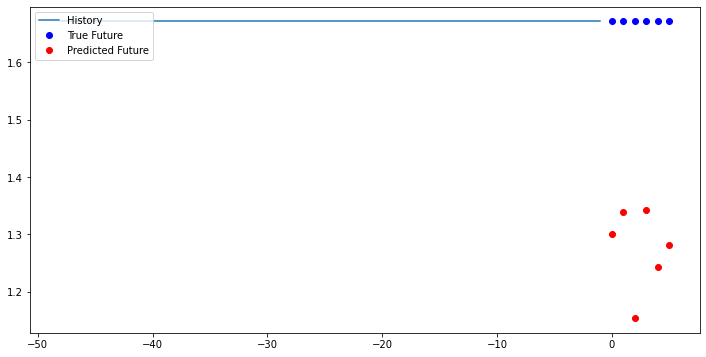

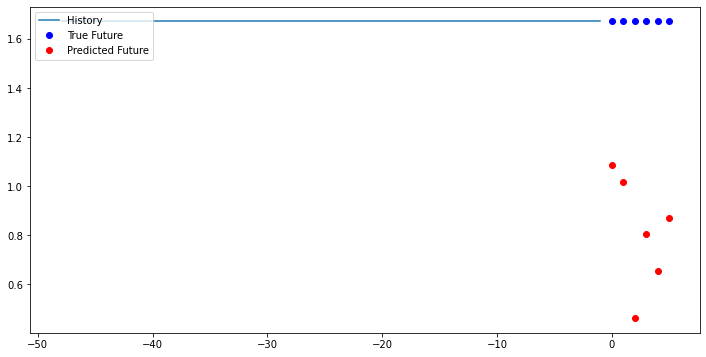

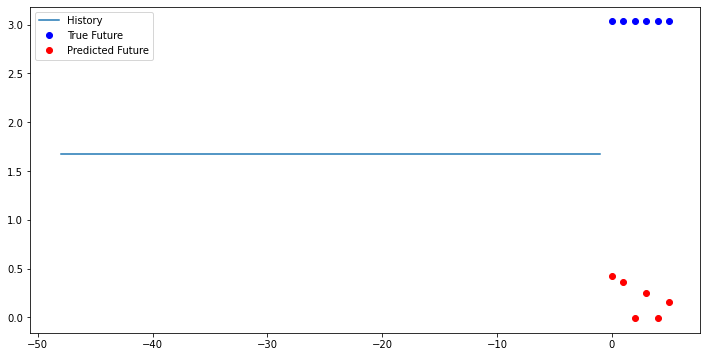

In [186]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [187]:
model = Sequential()
model.add(Dense(64, input_dim = 5, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation='linear'))

In [188]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy','mae', 'mse'])

In [189]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [190]:
history1024 = model.fit(normed_X_train, y_train, epochs=1000, validation_split = 0.2, batch_size=1024, validation_data=(normed_X_test, y_test), verbose = 0, callbacks=[tfdocs.modeling.EpochDots()])

NameError: name 'normed_X_train' is not defined

In [ ]:
hist = pd.DataFrame(history1024.history)
hist['epoch'] = history1024.epoch
hist.tail()

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

In [ ]:
plotter.plot({'Basic': history1024}, metric = "mae")
plt.ylabel('MAE [Internet]')

In [ ]:
plotter.plot({'Basic': history1024}, metric = "mse")
plt.ylabel('MSE [Internet^2]')

In [ ]:
test_predictions = model.predict(normed_X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Internet]')
plt.ylabel('Predictions [Internet]')
lims = [0, 8000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Internet]")
_ = plt.ylabel("Count")

# Codigo para recuperarse de problemas con GPU

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])